# NBaIoT SOM HYPEROPT CLASSIFY

## Device 8

- Training on device 8 (using both Mirai and Gafgyt).
- Testing on device 8 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

# from hyperopt import fmin, tpe, hp, STATUS_OK, rand, atpe, mix, anneal

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

/home/ladin/projects/research/iot-anomaly-detection


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_test_partial, process_train_partial, som_test, load_data_test, process_train_som_hyperopt

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/iot-anomaly-detection/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 8

In [8]:
train_index

8

## Set params (percentage, num_features)

In [9]:
# train_size = 0.5
# test_size = 0.5
# num_features = 29

# 1. Load data and preprocess data

In [10]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [11]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((46585, 115), (46585,)),
 ((303223, 115), (303223,)),
 ((513248, 115), (513248,)))

## Split data

In [12]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [13]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((32609, 115), (13976, 115), (32609,), (13976,))

In [14]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((212256, 115), (90967, 115), (212256,), (90967,))

In [15]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((359273, 115), (153975, 115), (359273,), (153975,))

## Set ratio

In [16]:
benign_size = 10000 # data_benign_train.shape[0], build va train voi 10K
print(benign_size)

10000


In [17]:
ratio_1 = int(1.0*benign_size)

In [18]:
# get train data
data_benign_train, _, target_benign_train, _ = train_test_split(data_benign_train, target_benign_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [19]:
data_benign_train.shape, target_benign_train.shape

((10000, 115), (10000,))

## Get train data of benign and gafgyt by ratio

In [20]:
# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [21]:
print(data_gafgyt_1.shape, target_gafgyt_1.shape)

(10000, 115) (10000,)


In [22]:
# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

In [23]:
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)

(20000, 115) (20000,)


## Get train data of benign and Mirai by ratio

In [24]:
# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [25]:
print(data_mirai_1.shape, target_mirai_1.shape)

(10000, 115) (10000,)


In [26]:
# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

In [27]:
print(X_train_mirai_1.shape, y_train_mirai_1.shape)

(20000, 115) (20000,)


## Get test data

Lay ra kich thuoc cua benign test.

Lay Mirai & Gafgyt cung bang kich thuoc cua benign test

In [28]:
benign_test_size = data_benign_test.shape[0]

In [29]:
benign_test_size

13976

### Gafgyt

In [30]:
data_gafgyt_test.shape

(90967, 115)

In [31]:
# split first
data_gafgyt_test, _, target_gafgyt_test, _ = train_test_split(data_gafgyt_test, target_gafgyt_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [32]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(27952, 115) (27952,)


In [33]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((13976, 115), (13976, 115), (13976,), (13976,))

## Mirai

In [34]:
# split first
data_mirai_test, _, target_mirai_test, _ = train_test_split(data_mirai_test, target_mirai_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [35]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(27952, 115) (27952,)


In [36]:
# X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [37]:
print(X_test_mirai.shape, y_test_mirai.shape)

(27952, 115) (27952,)



# 4. Normal SOM train and test


## 4.1.4. Ratio 1.0

### 1) Set 15

### Train

In [38]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.93947076e-03  4.24583311e-01  0.00000000e+00 ...  1.77037474e-16
   6.80921655e-33  5.79818262e-18]
 [ 2.29493484e-01  1.32475656e-01  3.30832360e-02 ...  1.02941033e-05
   2.14755130e-06  2.96523918e-02]
 [ 3.58427129e-03  1.26053589e-01  7.61542585e-06 ...  1.36792206e-17
  -1.35591581e-33 -1.46555291e-17]
 ...
 [ 6.93935035e-03  4.24583311e-01  0.00000000e+00 ...  0.00000000e+00
  -2.58587223e-33  0.00000000e+00]
 [ 3.64091784e-03  1.26088377e-01  1.80238720e-14 ...  1.07181698e-17
   2.02275965e-33  2.67143261e-17]
 [ 3.74132208e-03  9.39027538e-02  9.78232080e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 3.016178846359253


### Test on the same device

#### Test on gafgyt

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.20285508 0.11792059 0.06340027 ... 0.92977531 1.14159588 0.93473913]
Visualize quantization error


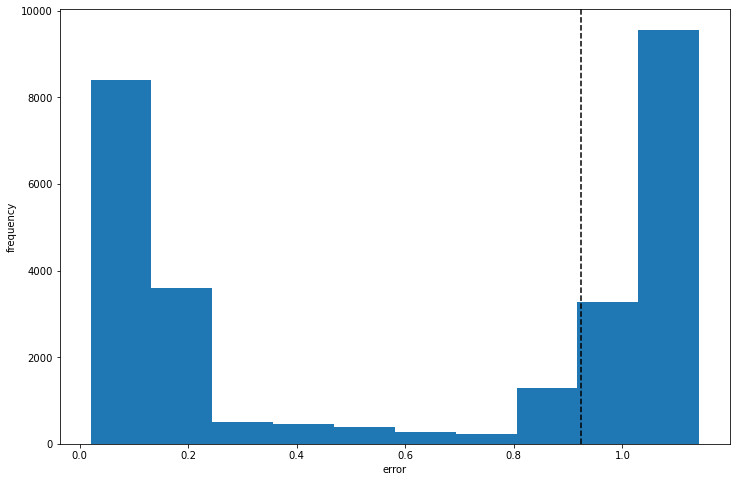

Outliers visualization


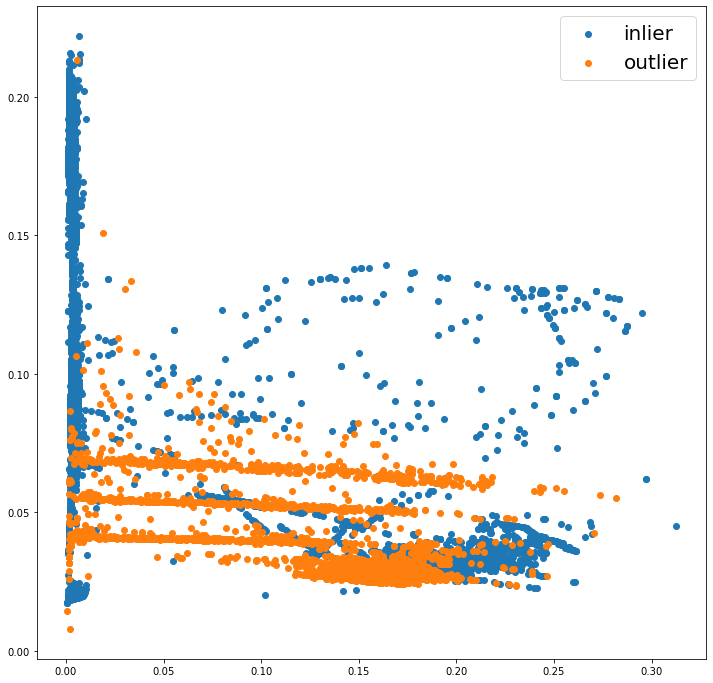

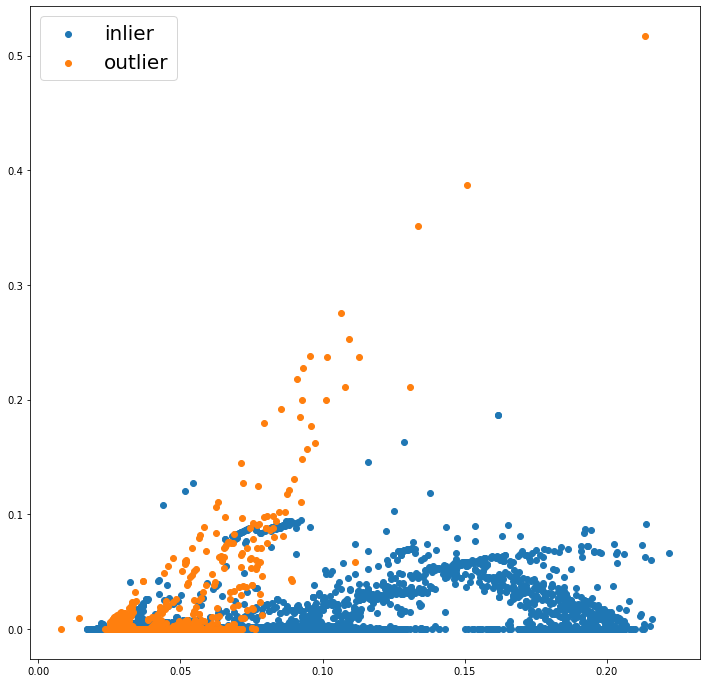

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.967     0.982     13976
           2      0.968     0.998     0.983     13976

    accuracy                          0.983     27952
   macro avg      0.983     0.983     0.983     27952
weighted avg      0.983     0.983     0.983     27952



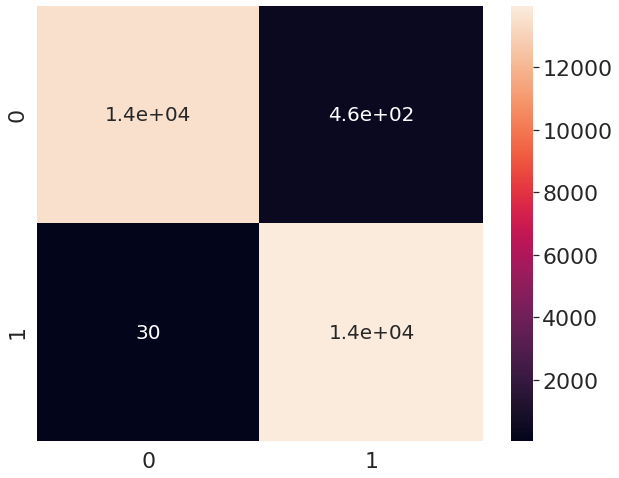

AUC score:  0.9826488265598168


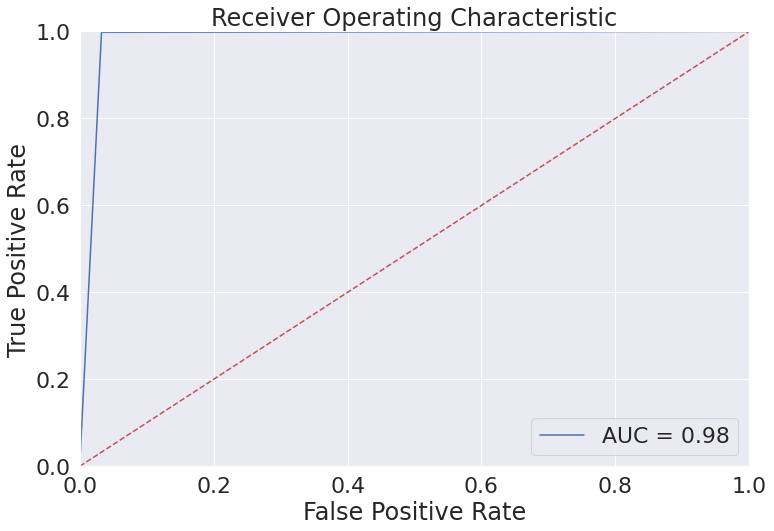

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [39]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.20285508 0.11792059 0.06340027 ... 0.57180175 0.60974556 0.90482398]
Visualize quantization error


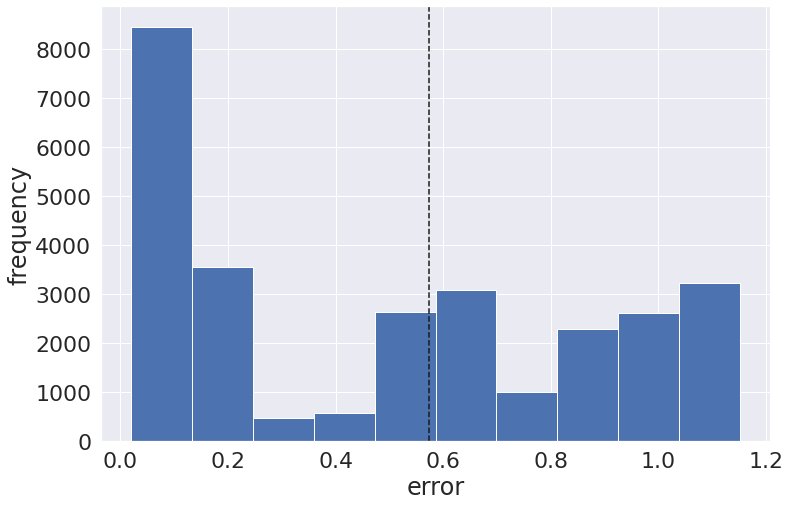

Outliers visualization


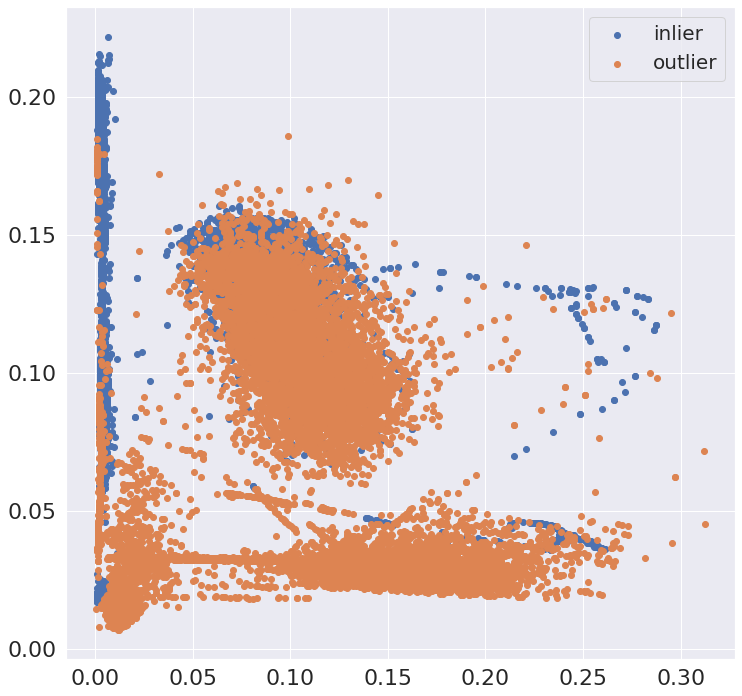

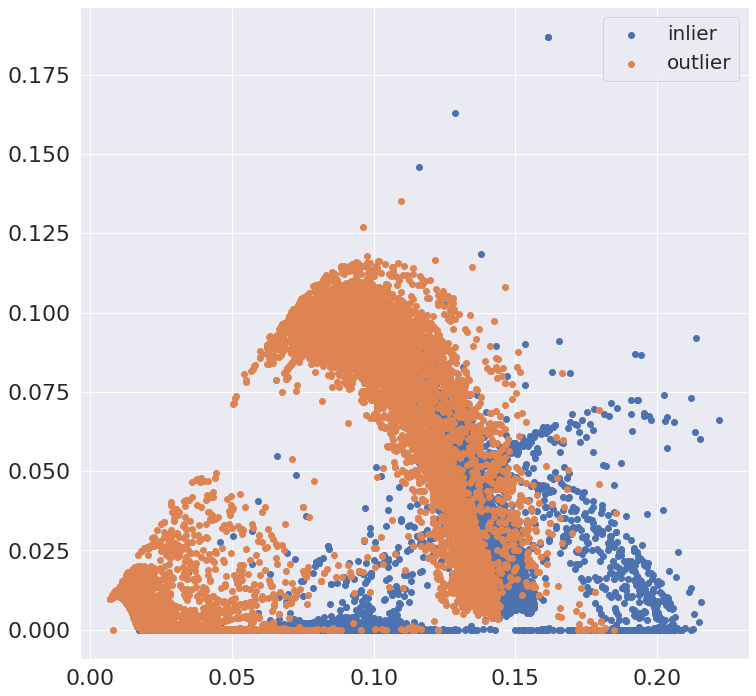

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.661     0.967     0.786     13976
           2      0.939     0.505     0.657     13976

    accuracy                          0.736     27952
   macro avg      0.800     0.736     0.721     27952
weighted avg      0.800     0.736     0.721     27952



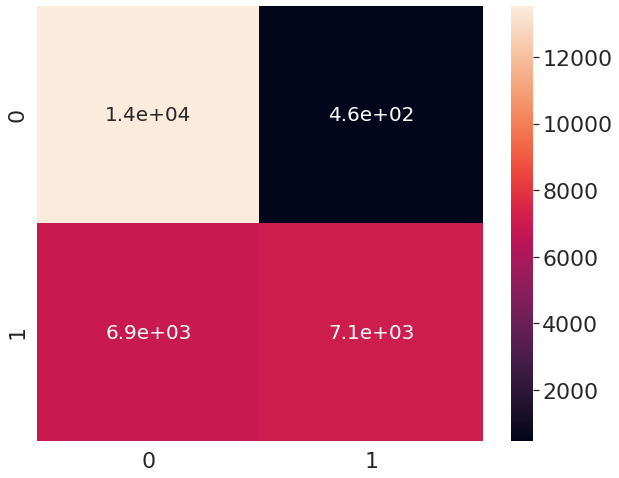

AUC score:  0.7360475100171722


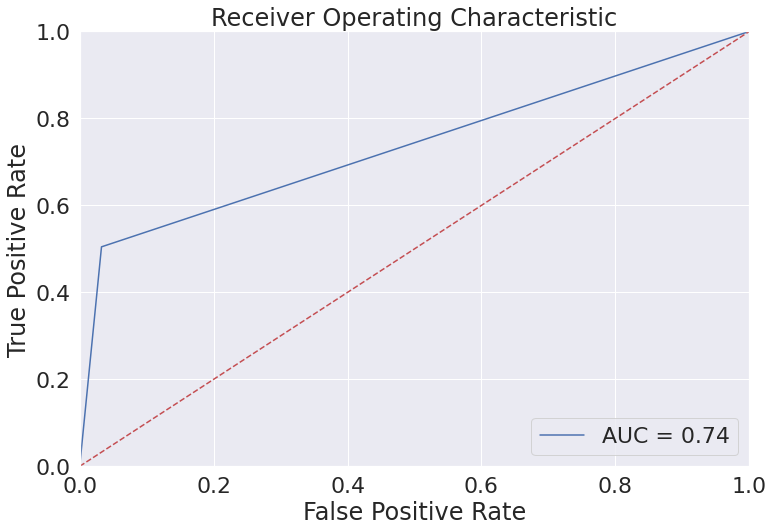

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [40]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [41]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.93947076e-03  4.24583311e-01  0.00000000e+00 ...  1.77037474e-16
   6.80921655e-33  5.79818262e-18]
 [ 2.29493484e-01  1.32475656e-01  3.30832360e-02 ...  1.02941033e-05
   2.14755130e-06  2.96523918e-02]
 [ 3.58427129e-03  1.26053589e-01  7.61542585e-06 ...  1.36792206e-17
  -1.35591581e-33 -1.46555291e-17]
 ...
 [ 6.93935035e-03  4.24583311e-01  0.00000000e+00 ...  0.00000000e+00
  -2.58587223e-33  0.00000000e+00]
 [ 3.64091784e-03  1.26088377e-01  1.80238720e-14 ...  1.07181698e-17
   2.02275965e-33  2.67143261e-17]
 [ 3.74132208e-03  9.39027538e-02  9.78232080e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 4.7707343101501465


### Test on the same device

#### Test on gafgyt

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.21071185 0.09104868 0.01081291 ... 0.86241443 0.93500824 0.86886597]
Visualize quantization error


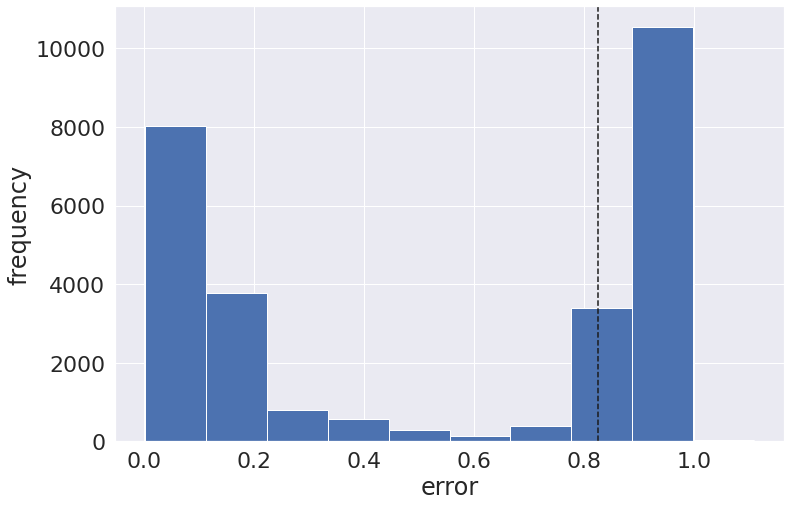

Outliers visualization


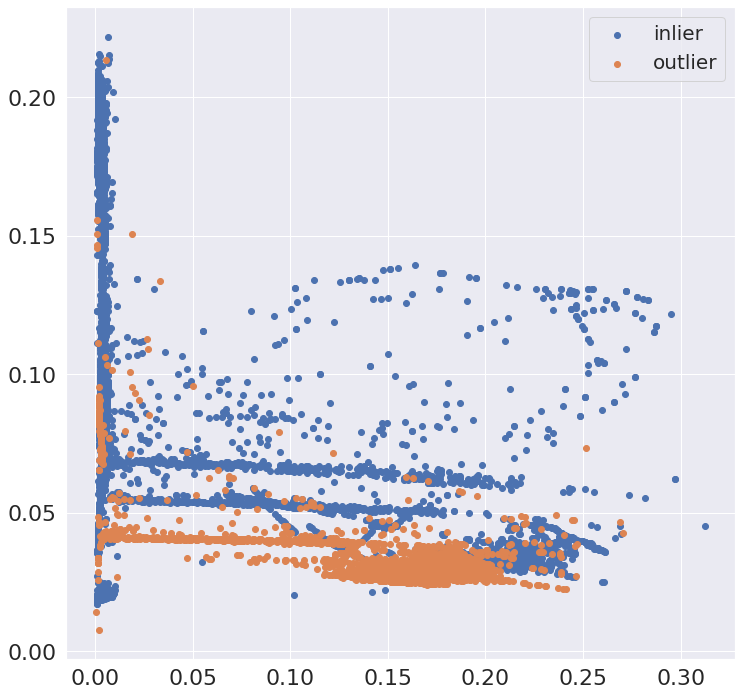

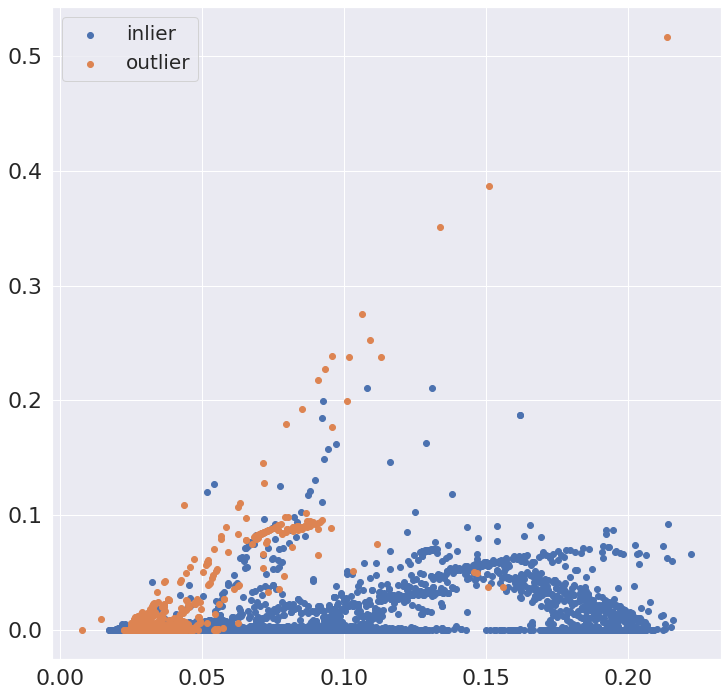

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.972     0.984     0.978     13976
           2      0.984     0.972     0.978     13976

    accuracy                          0.978     27952
   macro avg      0.978     0.978     0.978     27952
weighted avg      0.978     0.978     0.978     27952



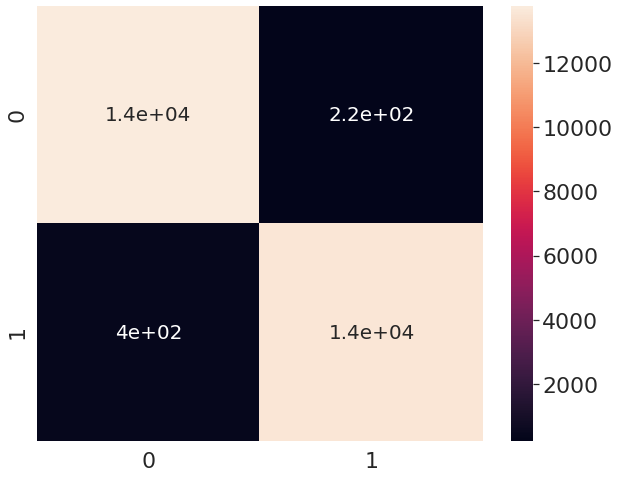

AUC score:  0.9778548941041786


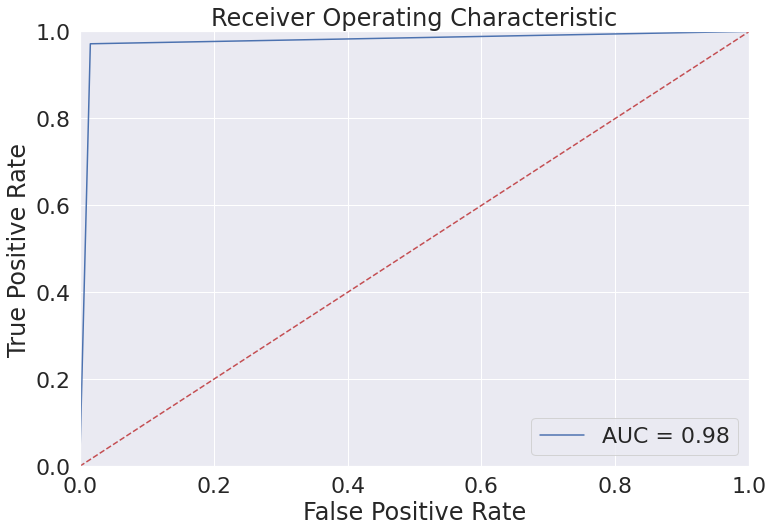

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.21071185 0.09104868 0.01081291 ... 0.63183561 0.66311996 0.84286795]
Visualize quantization error


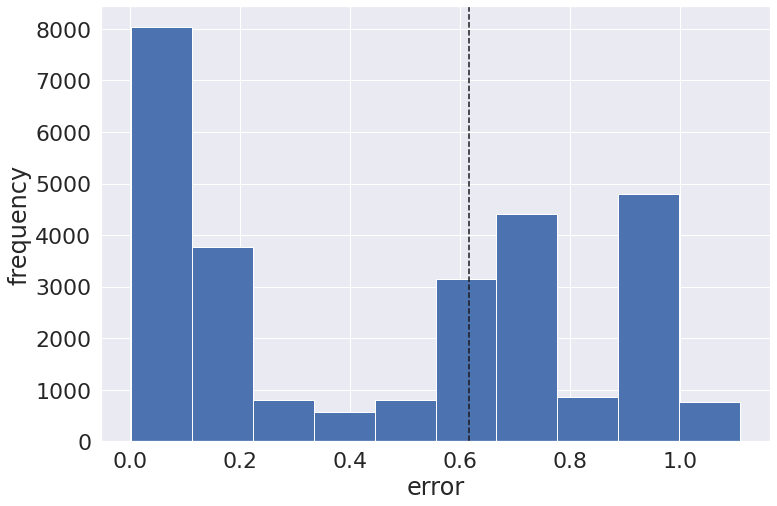

Outliers visualization


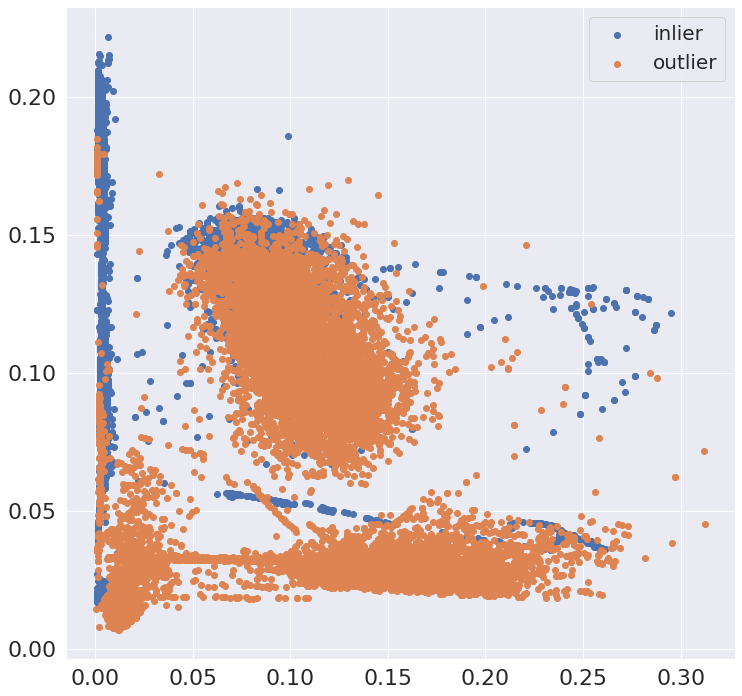

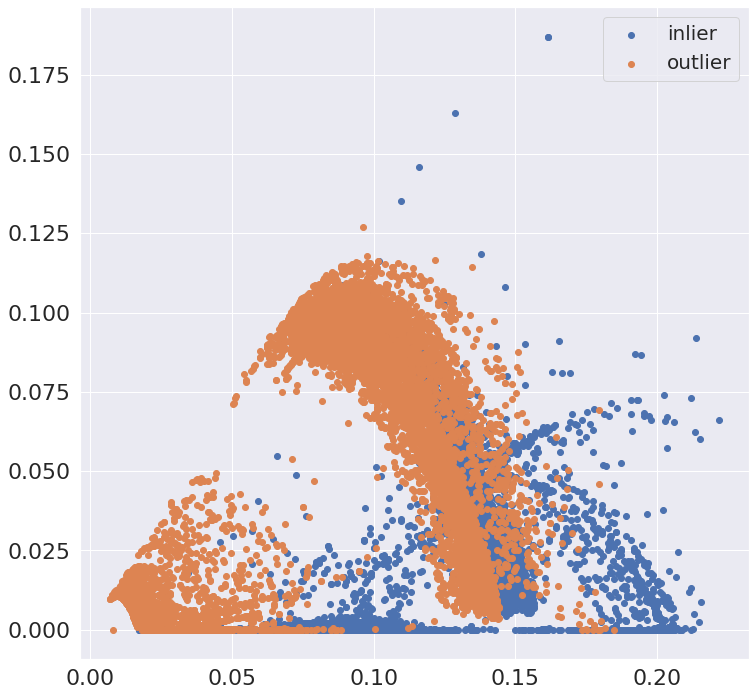

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.595     0.984     0.742     13976
           2      0.954     0.330     0.491     13976

    accuracy                          0.657     27952
   macro avg      0.775     0.657     0.616     27952
weighted avg      0.775     0.657     0.616     27952



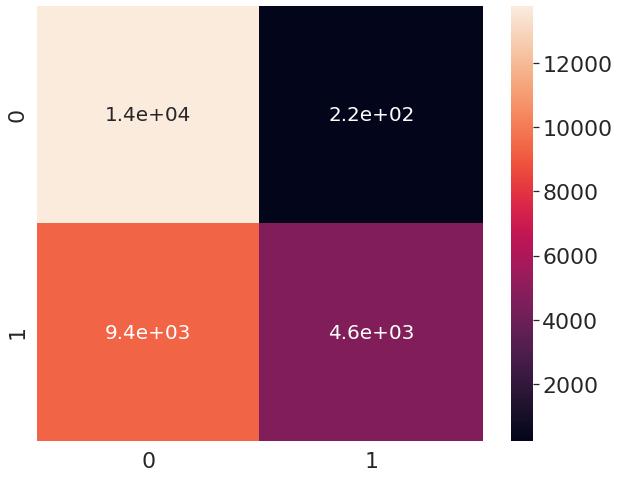

AUC score:  0.6571265025758443


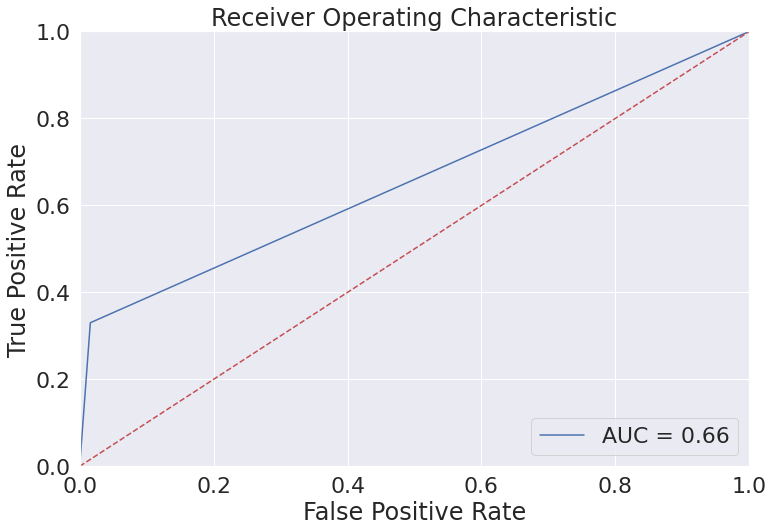

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Set 30

### Train

In [44]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.93947076e-03  4.24583311e-01  0.00000000e+00 ...  1.77037474e-16
   6.80921655e-33  5.79818262e-18]
 [ 2.29493484e-01  1.32475656e-01  3.30832360e-02 ...  1.02941033e-05
   2.14755130e-06  2.96523918e-02]
 [ 3.58427129e-03  1.26053589e-01  7.61542585e-06 ...  1.36792206e-17
  -1.35591581e-33 -1.46555291e-17]
 ...
 [ 6.93935035e-03  4.24583311e-01  0.00000000e+00 ...  0.00000000e+00
  -2.58587223e-33  0.00000000e+00]
 [ 3.64091784e-03  1.26088377e-01  1.80238720e-14 ...  1.07181698e-17
   2.02275965e-33  2.67143261e-17]
 [ 3.74132208e-03  9.39027538e-02  9.78232080e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 8.087117910385132


### Test on the same device

#### Test on gafgyt

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.19662428 0.06384174 0.01857363 ... 0.87716254 0.39963692 0.88195112]
Visualize quantization error


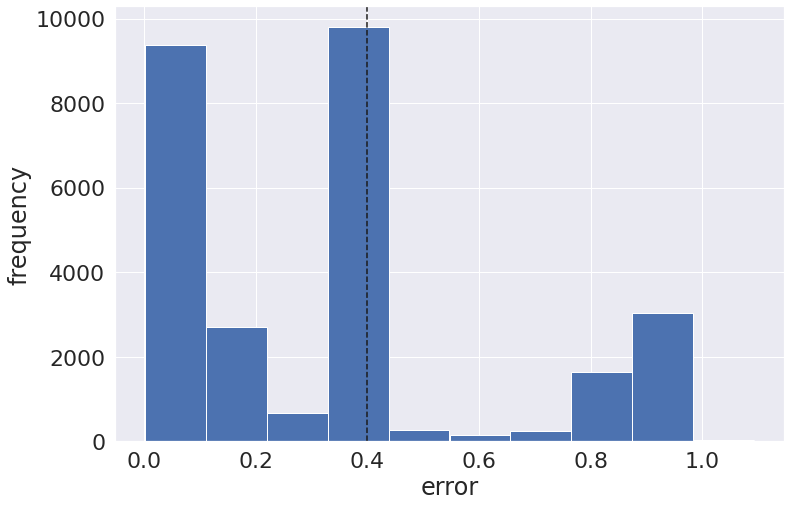

Outliers visualization


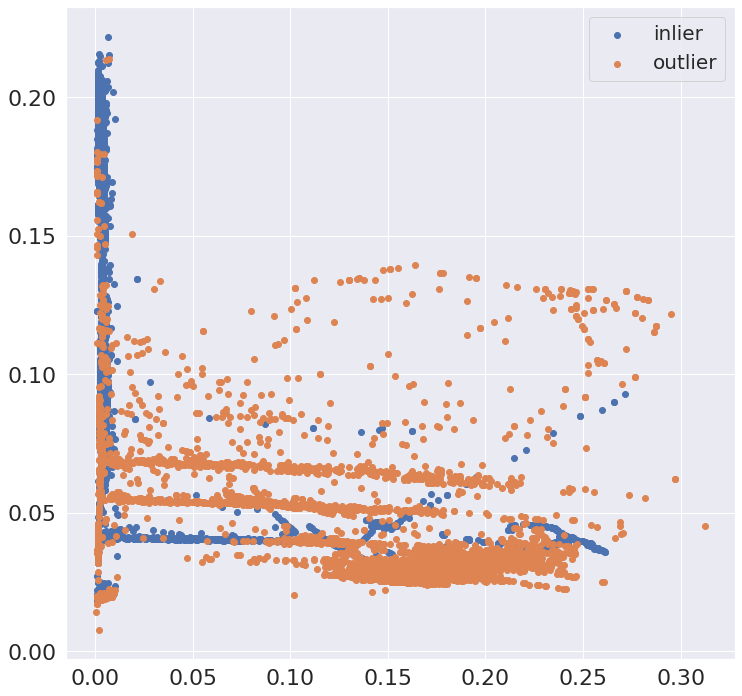

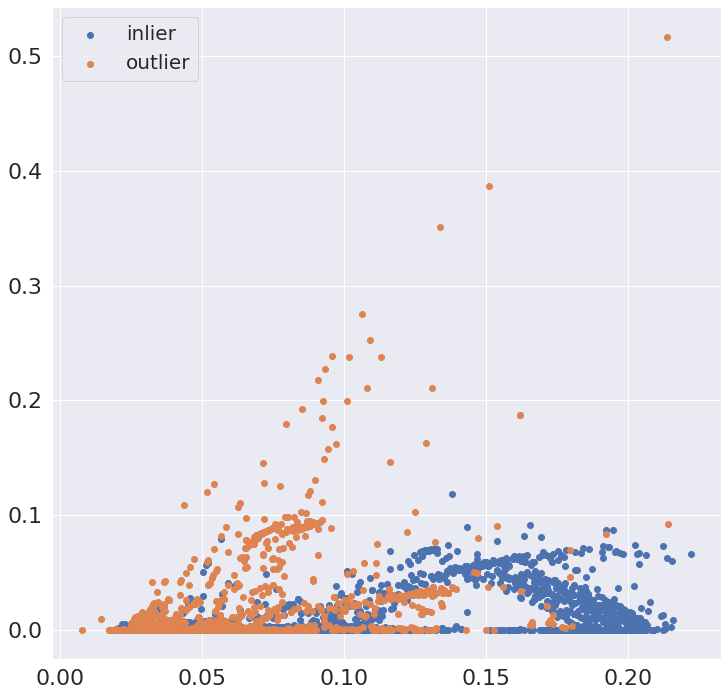

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.990     0.993     13976
           2      0.990     0.997     0.994     13976

    accuracy                          0.993     27952
   macro avg      0.994     0.993     0.993     27952
weighted avg      0.994     0.993     0.993     27952



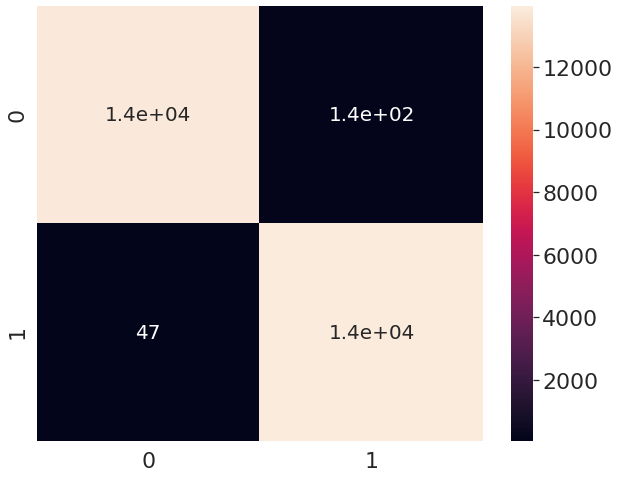

AUC score:  0.9934888380080137


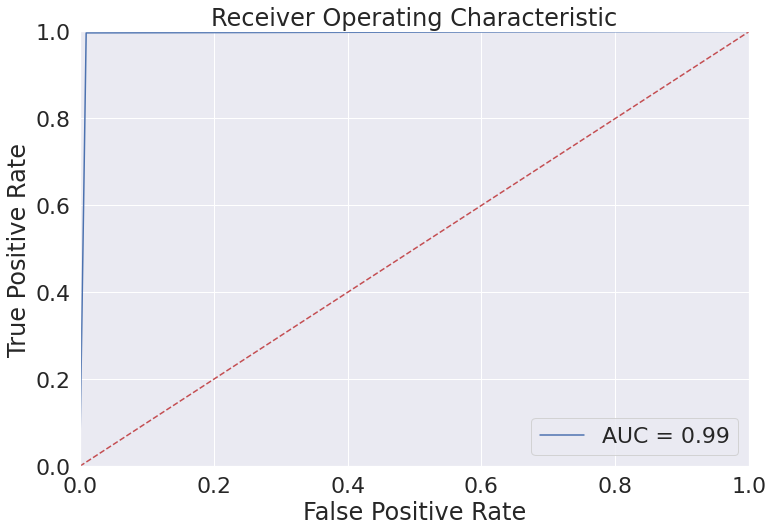

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [45]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.19662428 0.06384174 0.01857363 ... 0.61060765 0.64701291 0.85776201]
Visualize quantization error


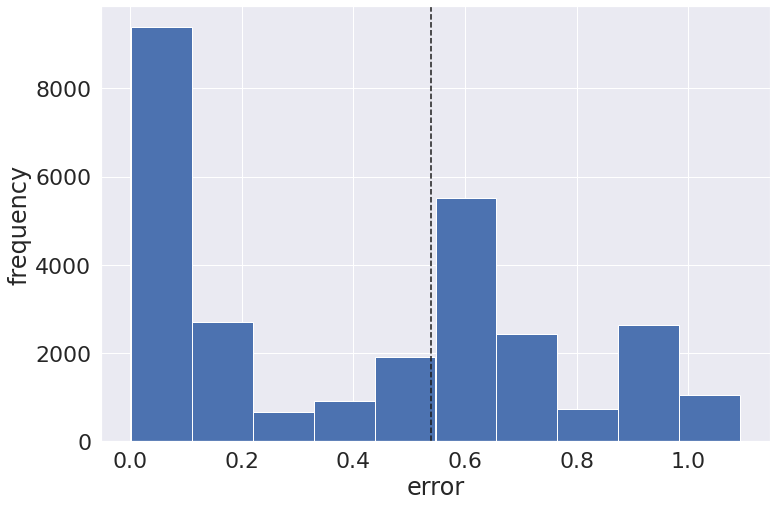

Outliers visualization


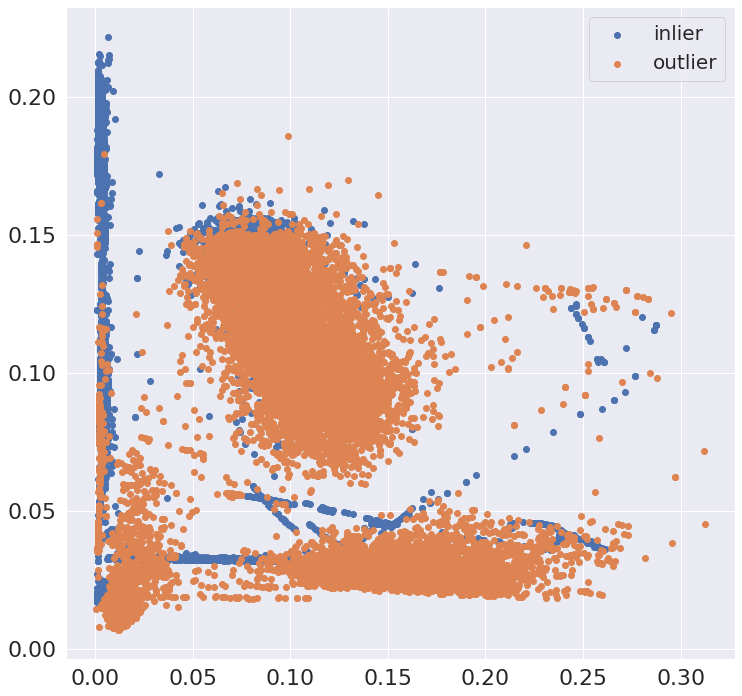

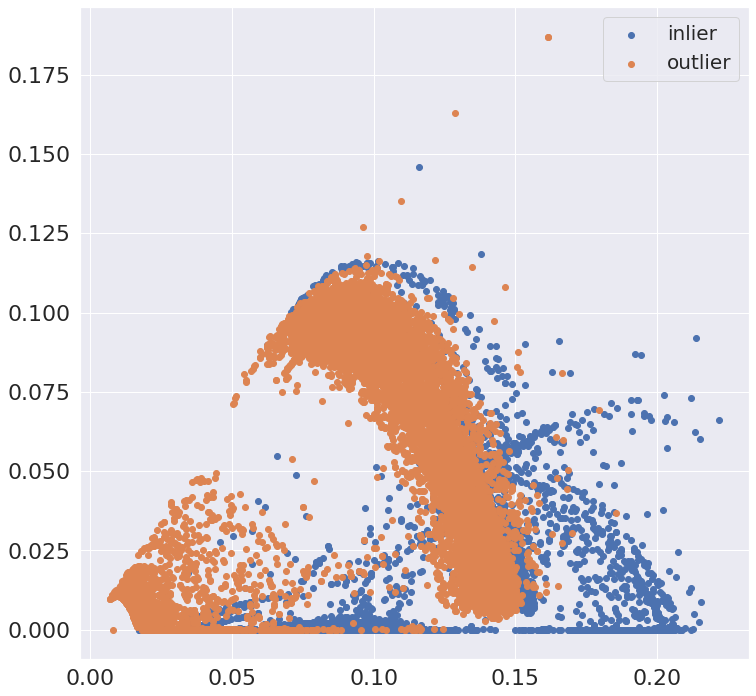

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.649     0.990     0.784     13976
           2      0.980     0.465     0.630     13976

    accuracy                          0.727     27952
   macro avg      0.814     0.727     0.707     27952
weighted avg      0.814     0.727     0.707     27952



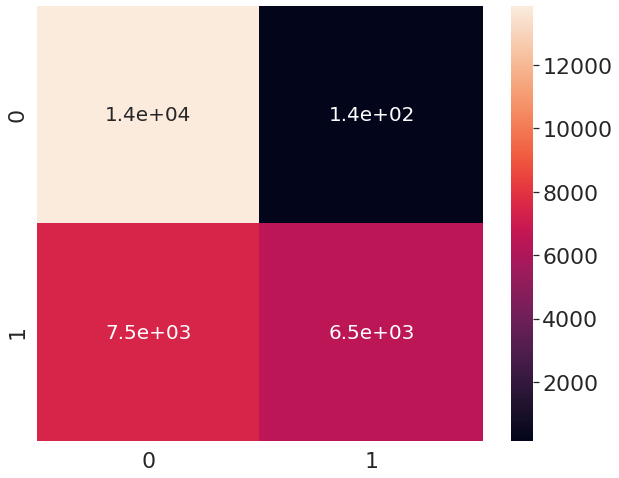

AUC score:  0.7274255867200916


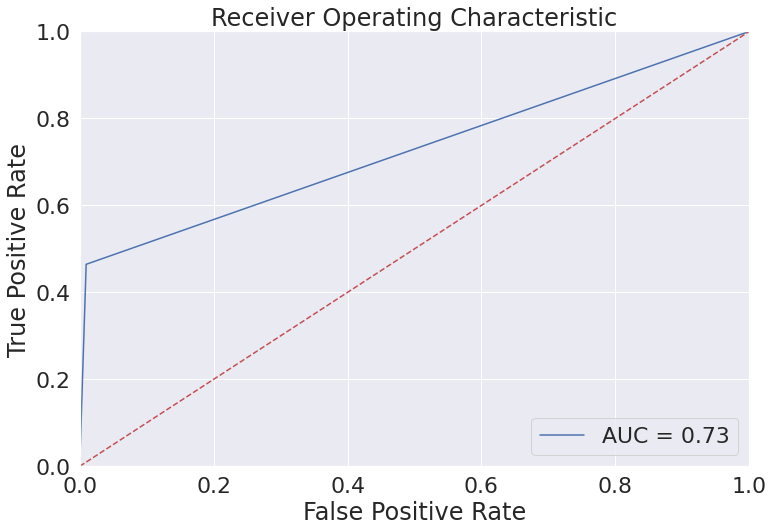

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Set 45

### Train

In [47]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.93947076e-03  4.24583311e-01  0.00000000e+00 ...  1.77037474e-16
   6.80921655e-33  5.79818262e-18]
 [ 2.29493484e-01  1.32475656e-01  3.30832360e-02 ...  1.02941033e-05
   2.14755130e-06  2.96523918e-02]
 [ 3.58427129e-03  1.26053589e-01  7.61542585e-06 ...  1.36792206e-17
  -1.35591581e-33 -1.46555291e-17]
 ...
 [ 6.93935035e-03  4.24583311e-01  0.00000000e+00 ...  0.00000000e+00
  -2.58587223e-33  0.00000000e+00]
 [ 3.64091784e-03  1.26088377e-01  1.80238720e-14 ...  1.07181698e-17
   2.02275965e-33  2.67143261e-17]
 [ 3.74132208e-03  9.39027538e-02  9.78232080e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 16.914031267166138


### Test on the same device

#### Test on gafgyt

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.15436436 0.08437247 0.00672361 ... 0.90482984 1.07754371 0.90973249]
Visualize quantization error


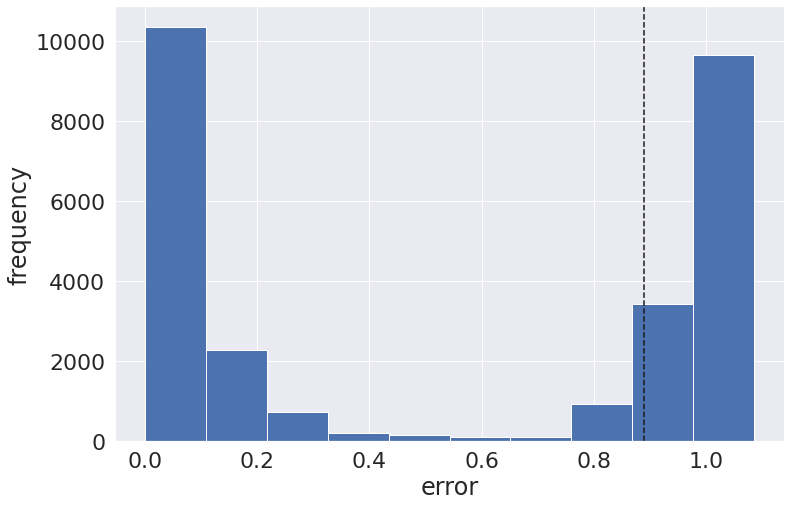

Outliers visualization


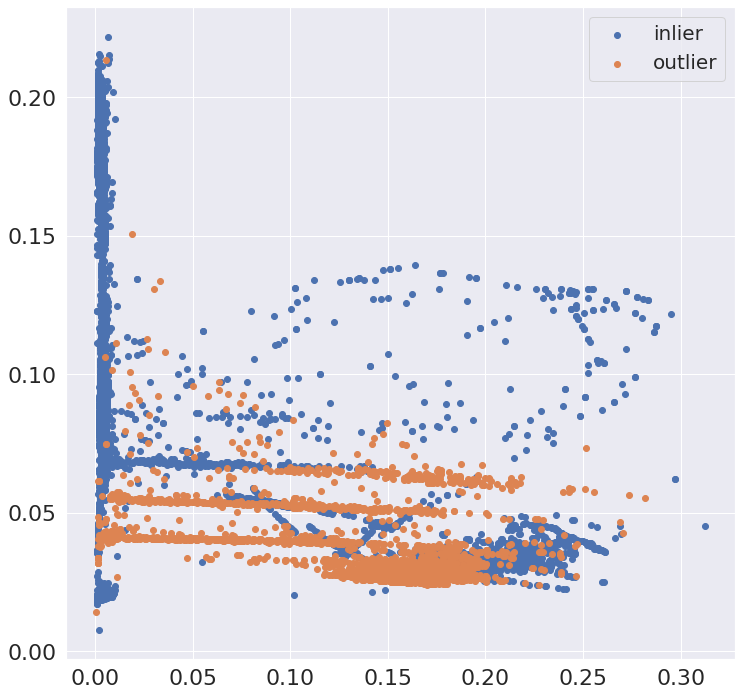

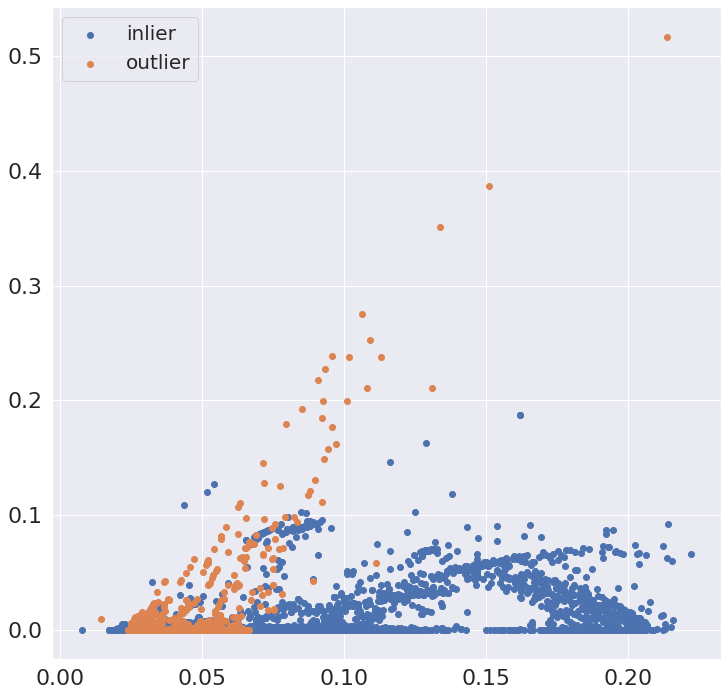

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.986     0.989     0.988     13976
           2      0.989     0.986     0.988     13976

    accuracy                          0.988     27952
   macro avg      0.988     0.988     0.988     27952
weighted avg      0.988     0.988     0.988     27952



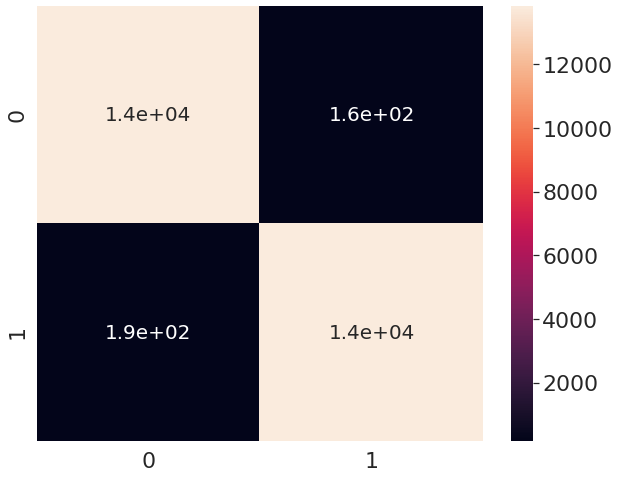

AUC score:  0.9875143102461362


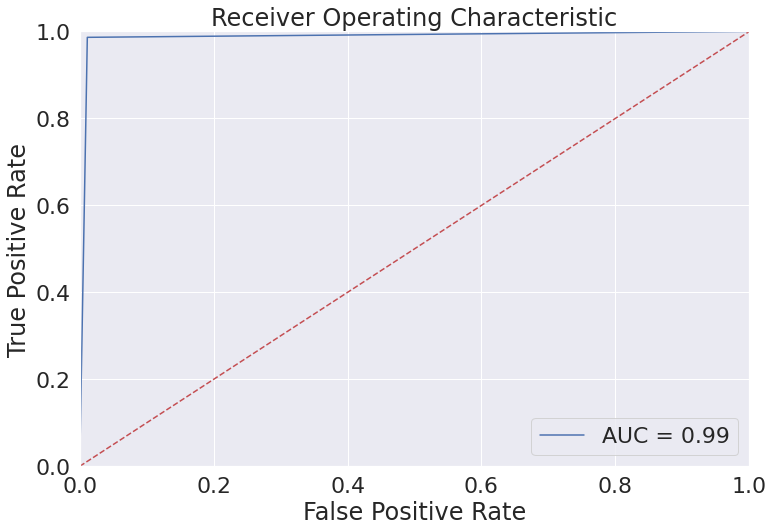

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.15436436 0.08437247 0.00672361 ... 0.62118391 0.65608507 0.88872604]
Visualize quantization error


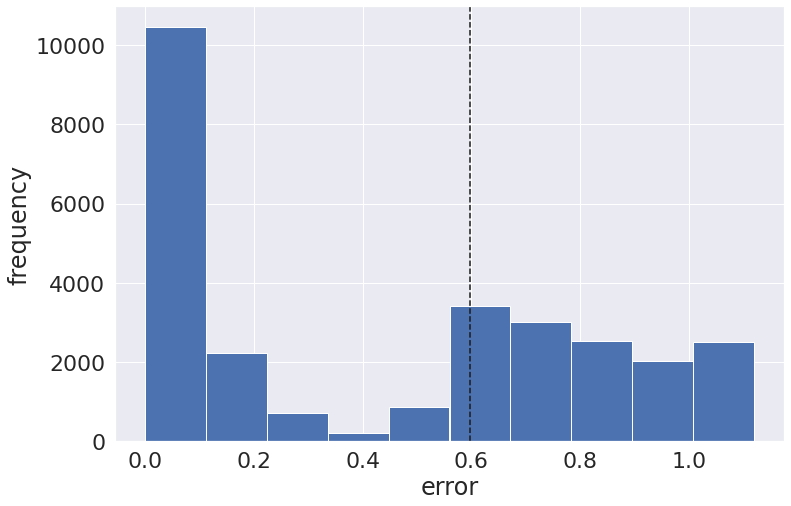

Outliers visualization


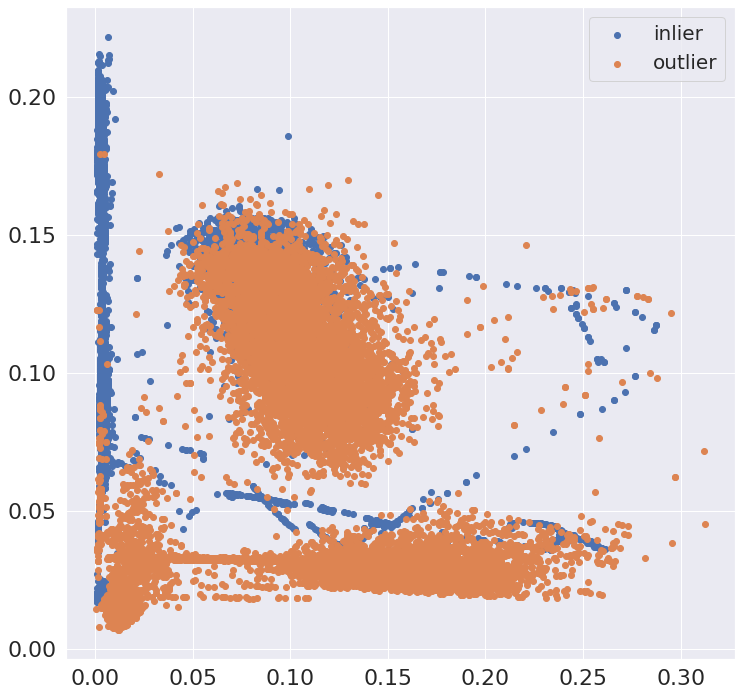

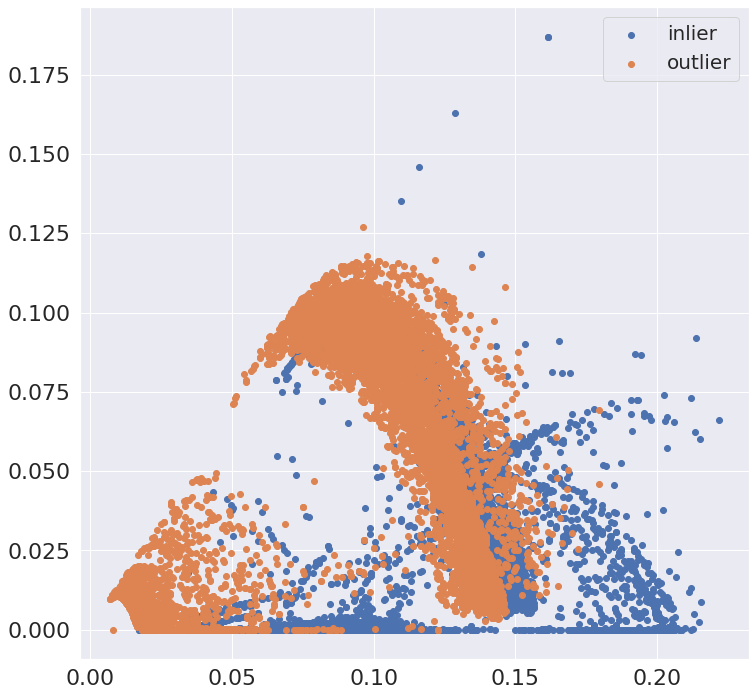

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.599     0.989     0.746     13976
           2      0.967     0.337     0.500     13976

    accuracy                          0.663     27952
   macro avg      0.783     0.663     0.623     27952
weighted avg      0.783     0.663     0.623     27952



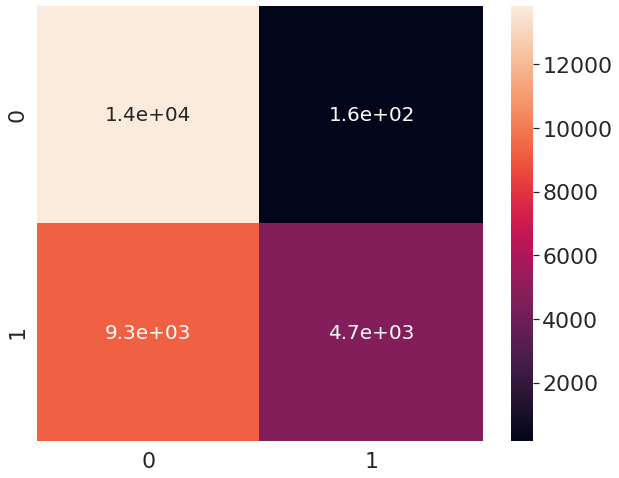

AUC score:  0.6627790497996565


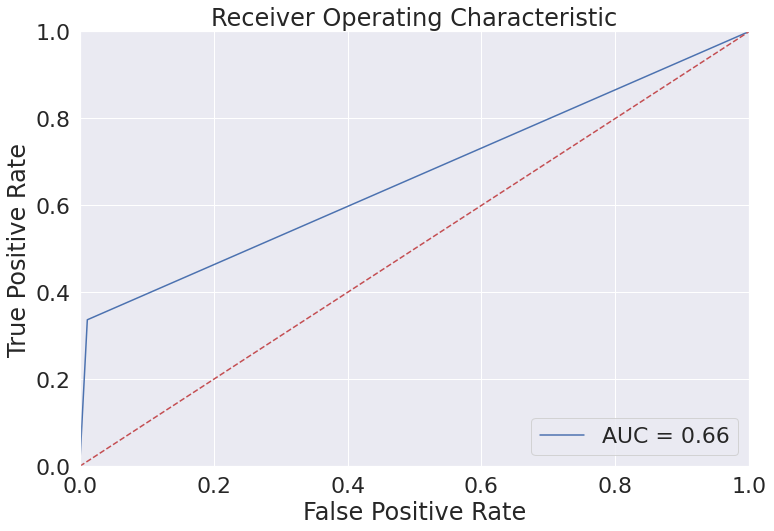

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)


### 1) Algo tpe

### Train

In [50]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.93947076e-03  4.24583311e-01  0.00000000e+00 ...  1.77037474e-16
   6.80921655e-33  5.79818262e-18]
 [ 2.29493484e-01  1.32475656e-01  3.30832360e-02 ...  1.02941033e-05
   2.14755130e-06  2.96523918e-02]
 [ 3.58427129e-03  1.26053589e-01  7.61542585e-06 ...  1.36792206e-17
  -1.35591581e-33 -1.46555291e-17]
 ...
 [ 6.93935035e-03  4.24583311e-01  0.00000000e+00 ...  0.00000000e+00
  -2.58587223e-33  0.00000000e+00]
 [ 3.64091784e-03  1.26088377e-01  1.80238720e-14 ...  1.07181698e-17
   2.02275965e-33  2.67143261e-17]
 [ 3.74132208e-03  9.39027538e-02  9.78232080e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 81.2470862865448


### Test on the same device

#### Test on gafgyt

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.22566244 0.10485233 0.08346534 ... 0.8639967  1.14117616 0.86977771]
Visualize quantization error


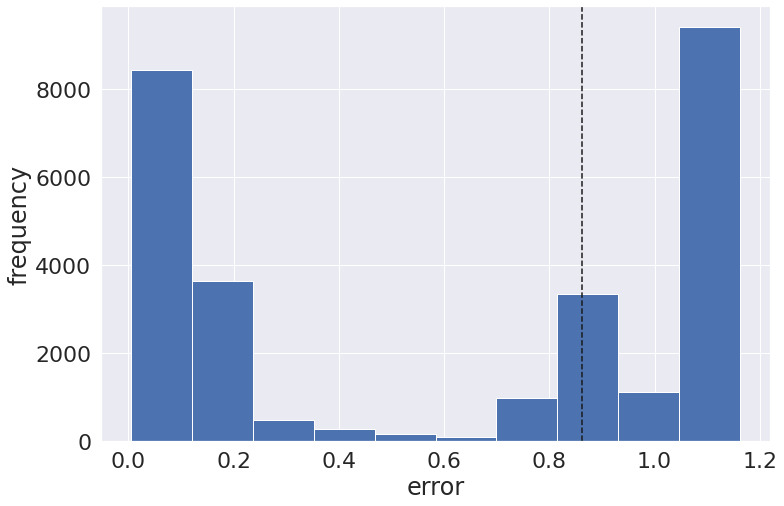

Outliers visualization


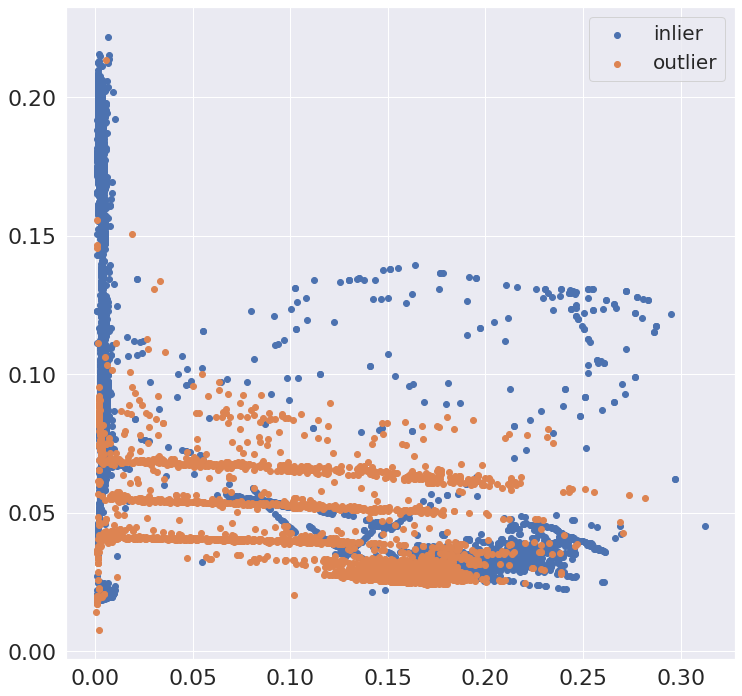

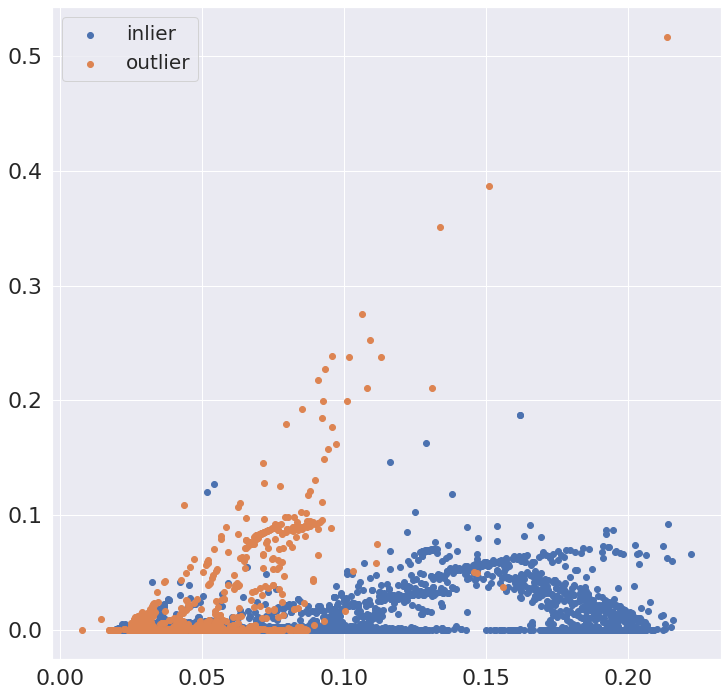

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.995     0.991     0.993     13976
           2      0.991     0.995     0.993     13976

    accuracy                          0.993     27952
   macro avg      0.993     0.993     0.993     27952
weighted avg      0.993     0.993     0.993     27952



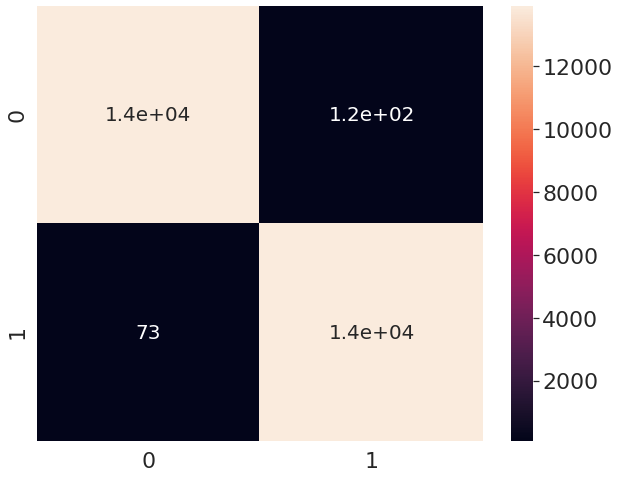

AUC score:  0.9930953062392672


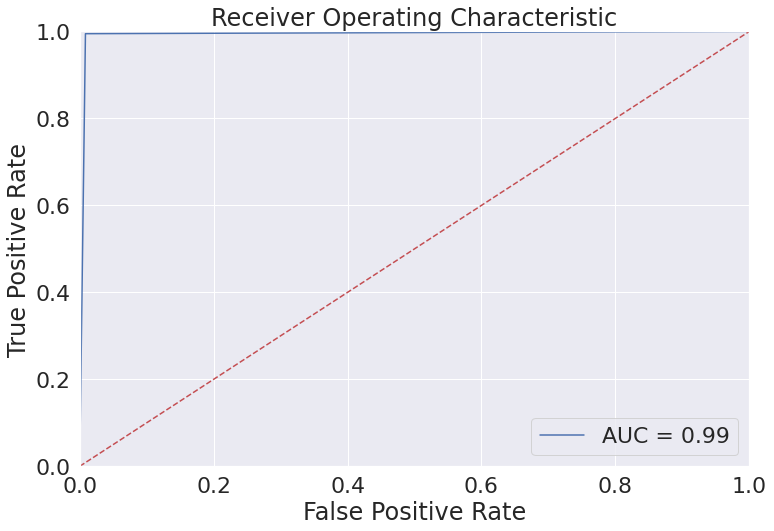

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [51]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.22566244 0.10485233 0.08346534 ... 0.53202401 0.57478563 0.84364929]
Visualize quantization error


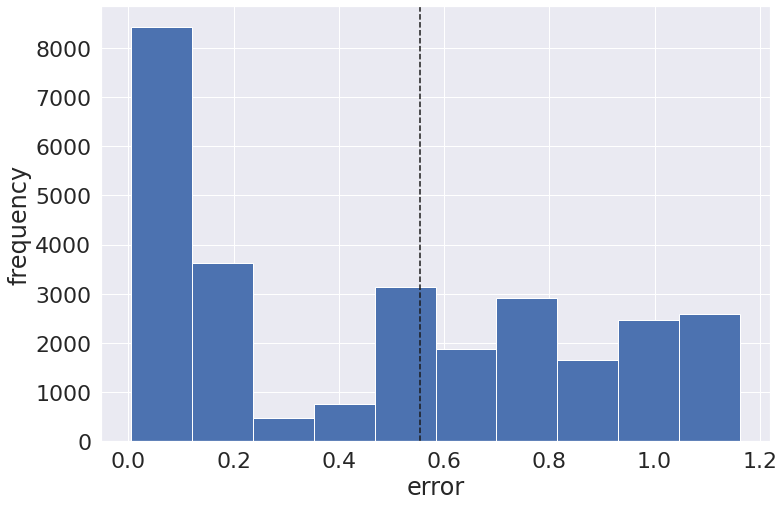

Outliers visualization


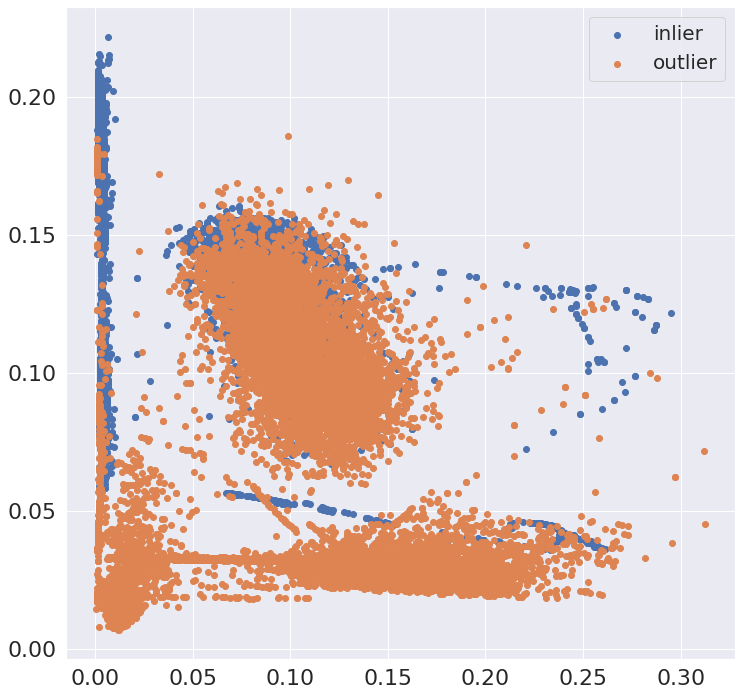

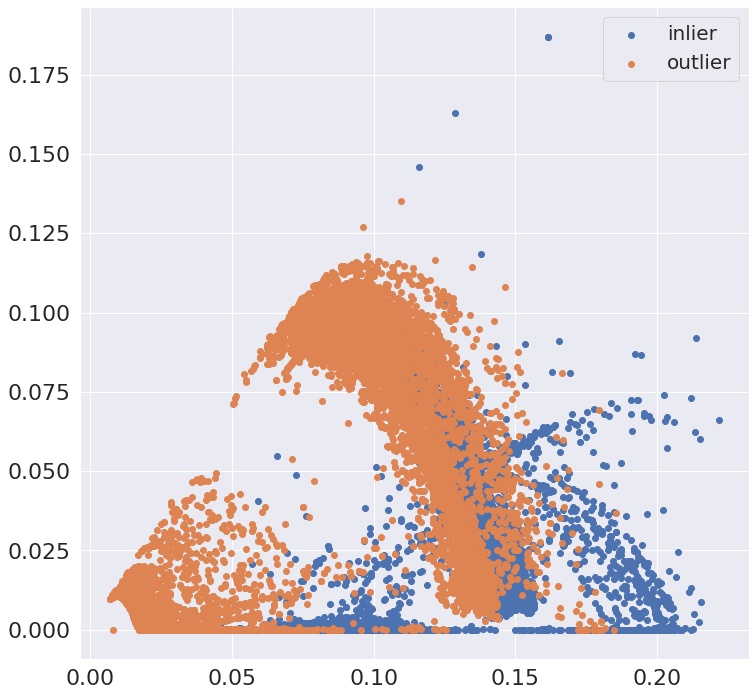

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.695     0.991     0.817     13976
           2      0.985     0.565     0.718     13976

    accuracy                          0.778     27952
   macro avg      0.840     0.778     0.767     27952
weighted avg      0.840     0.778     0.767     27952



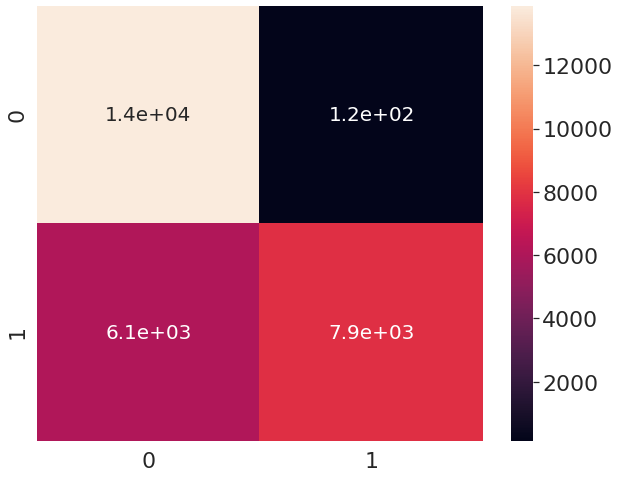

AUC score:  0.7780123068116772


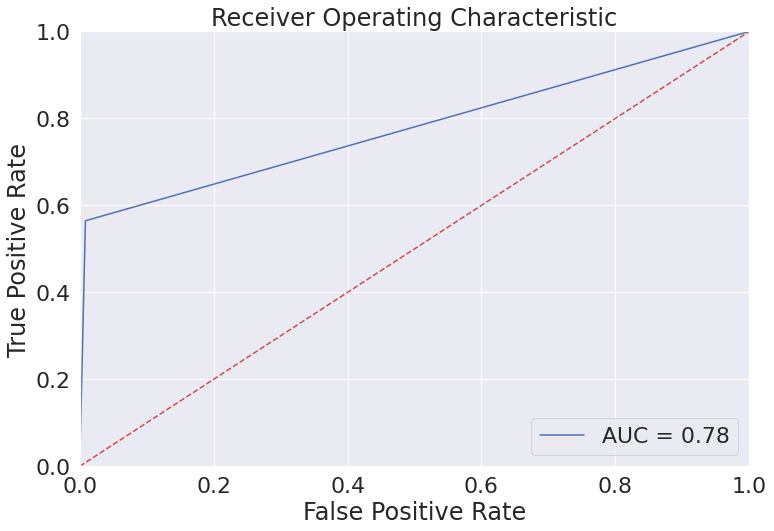

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [52]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Algo rand

### Train

In [53]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.93947076e-03  4.24583311e-01  0.00000000e+00 ...  1.77037474e-16
   6.80921655e-33  5.79818262e-18]
 [ 2.29493484e-01  1.32475656e-01  3.30832360e-02 ...  1.02941033e-05
   2.14755130e-06  2.96523918e-02]
 [ 3.58427129e-03  1.26053589e-01  7.61542585e-06 ...  1.36792206e-17
  -1.35591581e-33 -1.46555291e-17]
 ...
 [ 6.93935035e-03  4.24583311e-01  0.00000000e+00 ...  0.00000000e+00
  -2.58587223e-33  0.00000000e+00]
 [ 3.64091784e-03  1.26088377e-01  1.80238720e-14 ...  1.07181698e-17
   2.02275965e-33  2.67143261e-17]
 [ 3.74132208e-03  9.39027538e-02  9.78232080e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 82.76961278915405


### Test Gafgyt

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14894944 0.05689326 0.01014841 ... 0.8835627  0.34095111 0.88915031]
Visualize quantization error


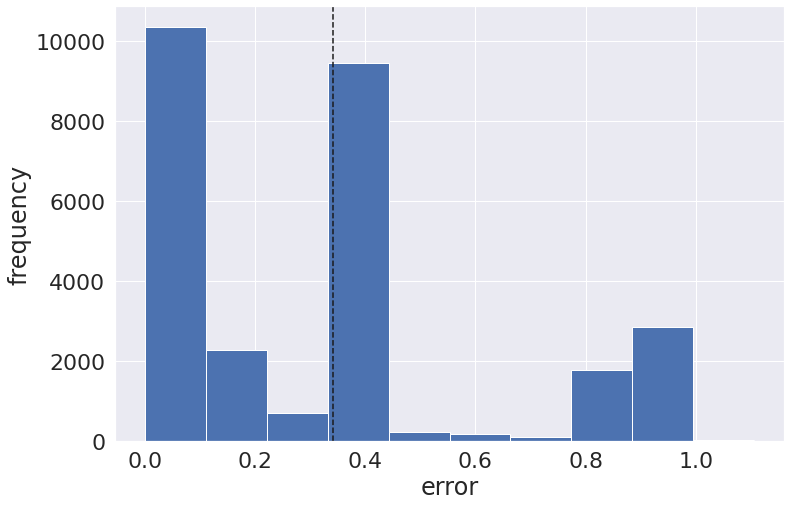

Outliers visualization


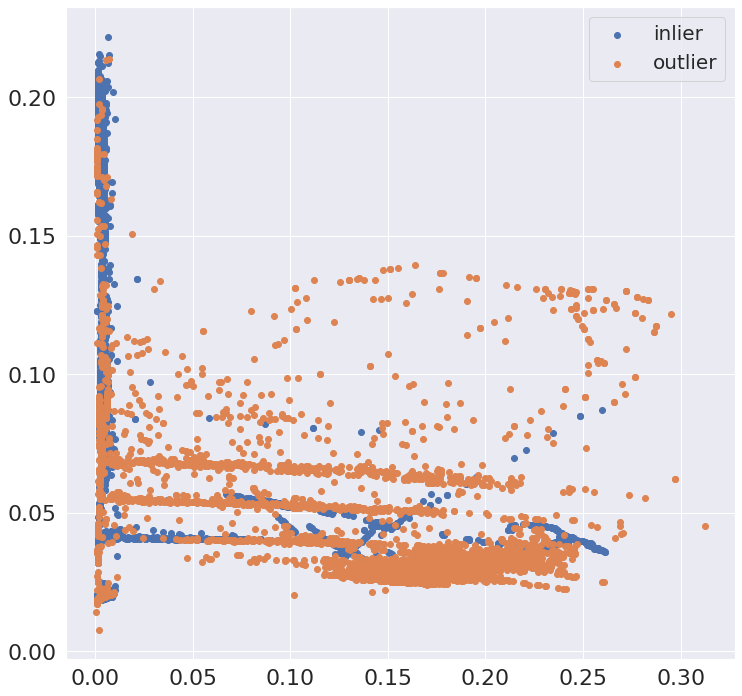

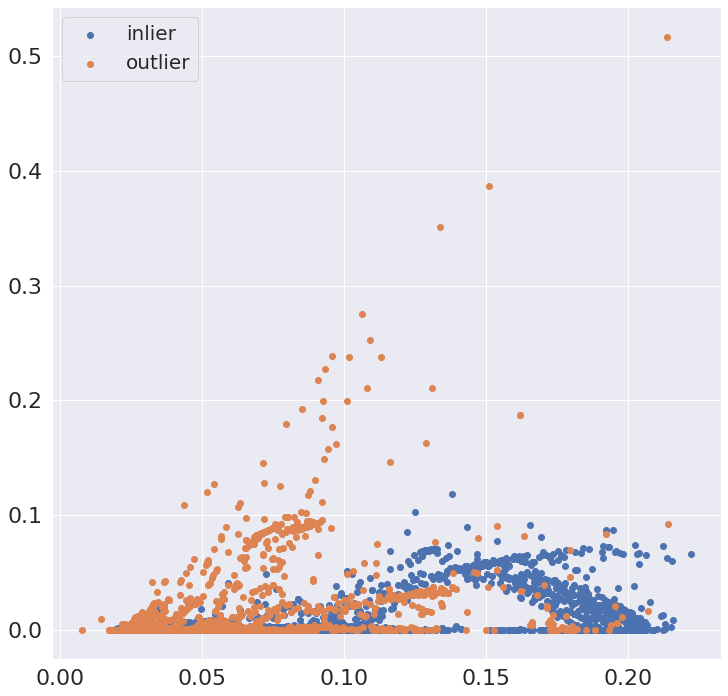

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.995     0.996     13976
           2      0.995     0.996     0.996     13976

    accuracy                          0.996     27952
   macro avg      0.996     0.996     0.996     27952
weighted avg      0.996     0.996     0.996     27952



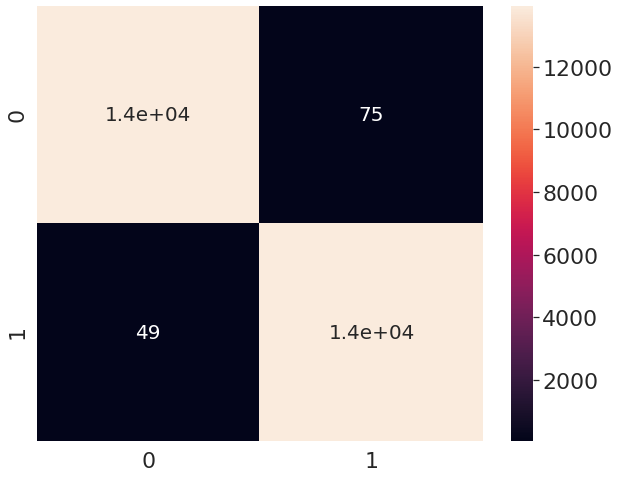

AUC score:  0.9955638236977676


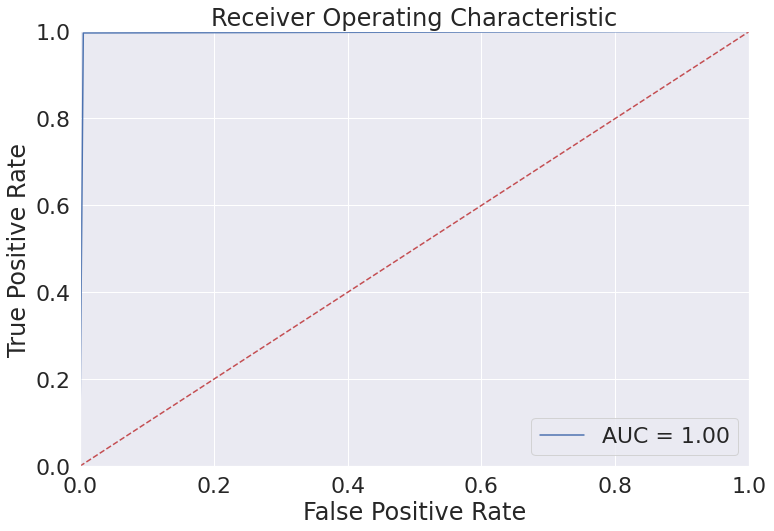

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [54]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### Test Mirai

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14894944 0.05689326 0.01014841 ... 0.54609969 0.58663224 0.85992183]
Visualize quantization error


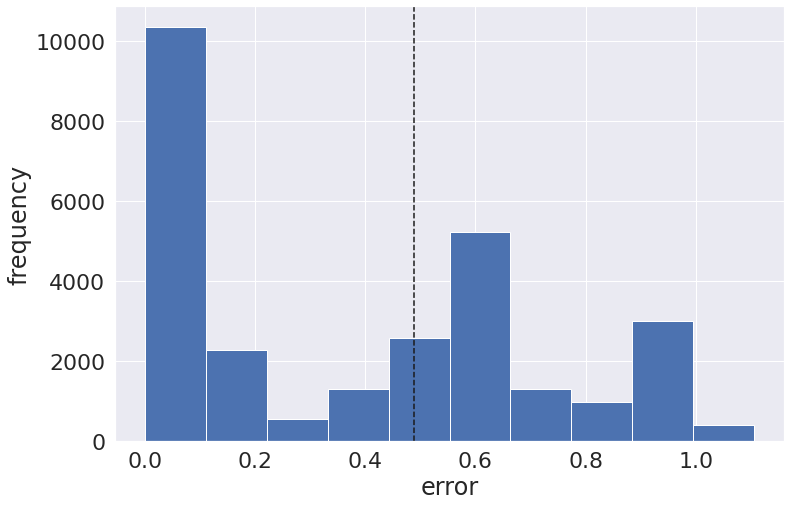

Outliers visualization


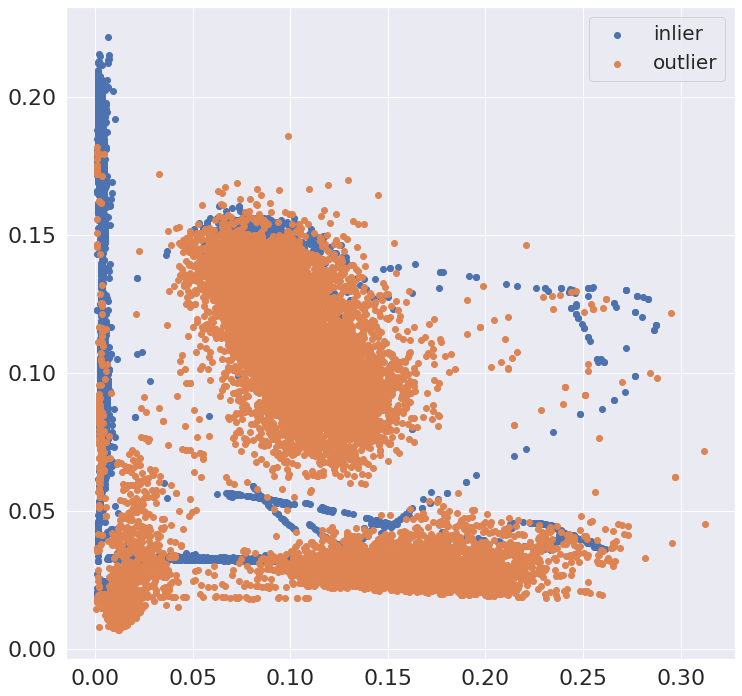

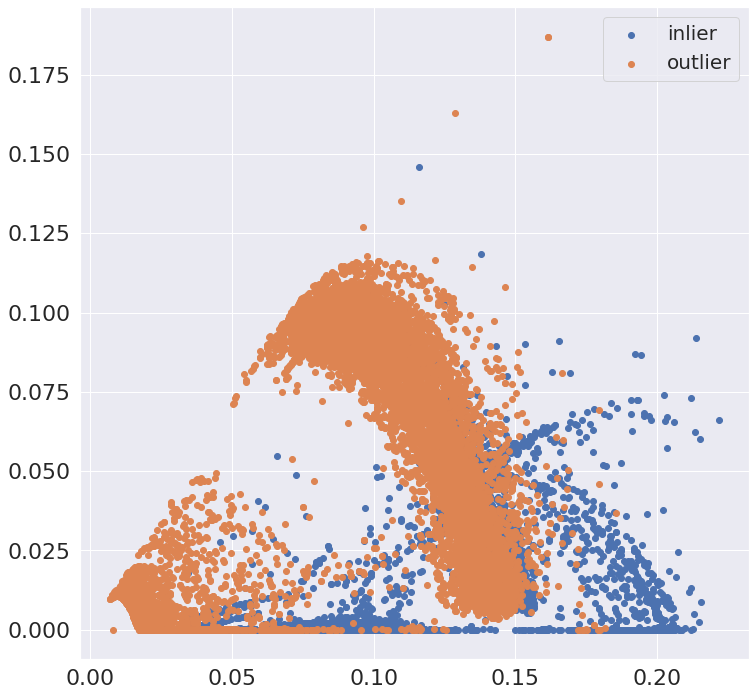

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.607     0.995     0.754     13976
           2      0.985     0.356     0.523     13976

    accuracy                          0.675     27952
   macro avg      0.796     0.675     0.638     27952
weighted avg      0.796     0.675     0.638     27952



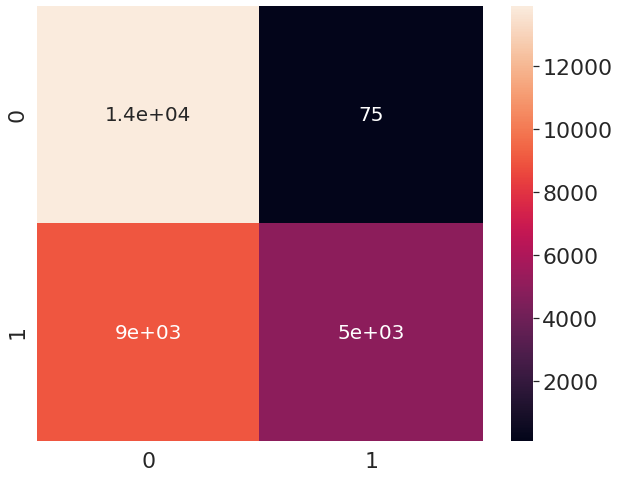

AUC score:  0.6751574127074986


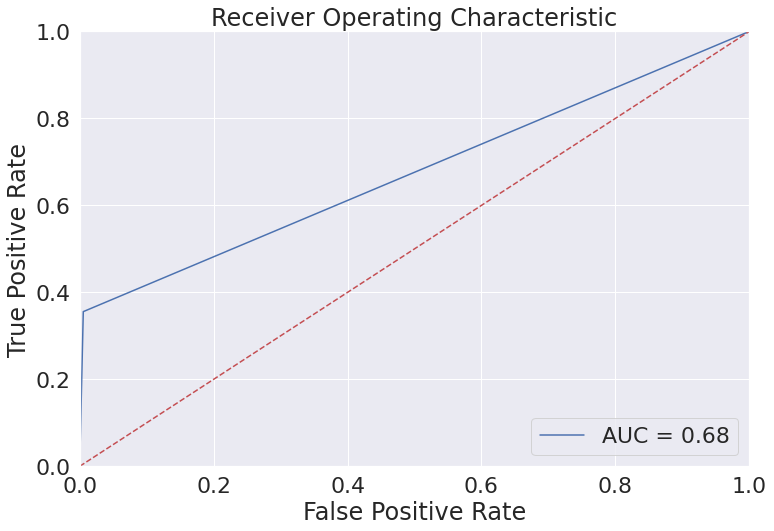

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [55]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Algo atpe

In [56]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.93947076e-03  4.24583311e-01  0.00000000e+00 ...  1.77037474e-16
   6.80921655e-33  5.79818262e-18]
 [ 2.29493484e-01  1.32475656e-01  3.30832360e-02 ...  1.02941033e-05
   2.14755130e-06  2.96523918e-02]
 [ 3.58427129e-03  1.26053589e-01  7.61542585e-06 ...  1.36792206e-17
  -1.35591581e-33 -1.46555291e-17]
 ...
 [ 6.93935035e-03  4.24583311e-01  0.00000000e+00 ...  0.00000000e+00
  -2.58587223e-33  0.00000000e+00]
 [ 3.64091784e-03  1.26088377e-01  1.80238720e-14 ...  1.07181698e-17
   2.02275965e-33  2.67143261e-17]
 [ 3.74132208e-03  9.39027538e-02  9.78232080e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14085622 0.04370709 0.00996141 ... 0.87955869 0.90895449 0.88474077]
Visualize quantization error


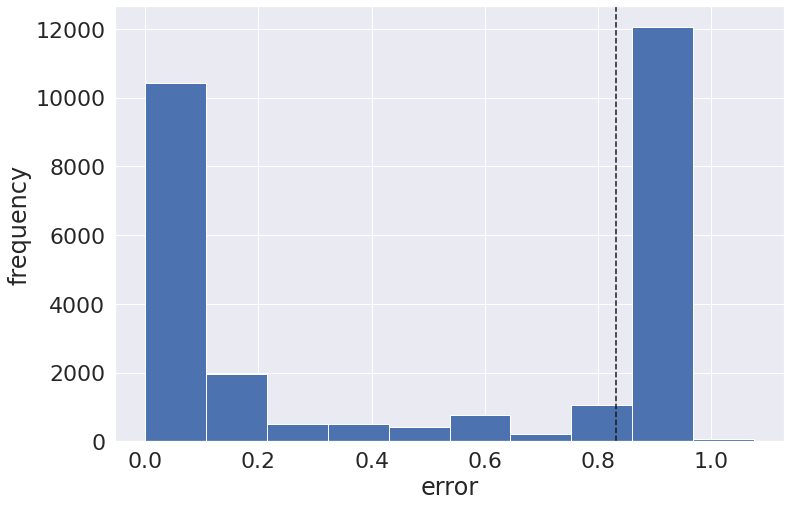

Outliers visualization


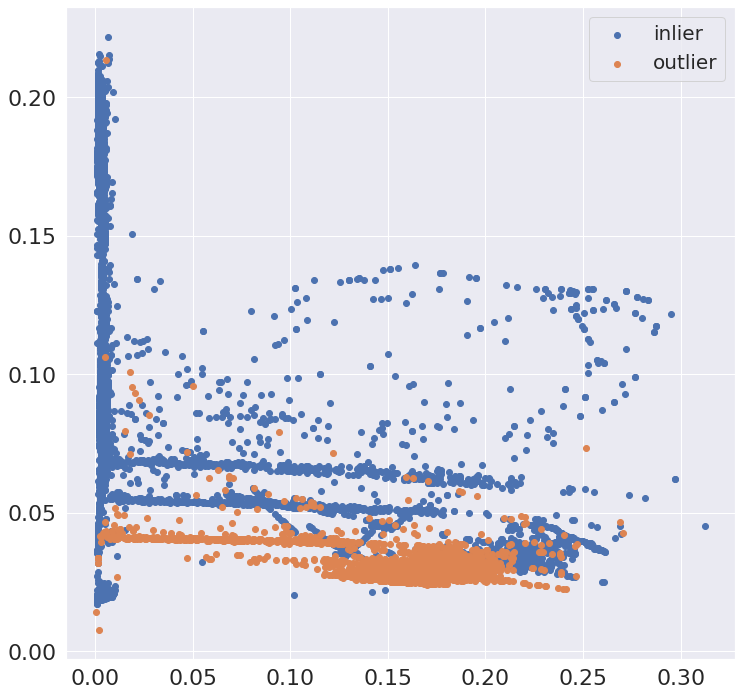

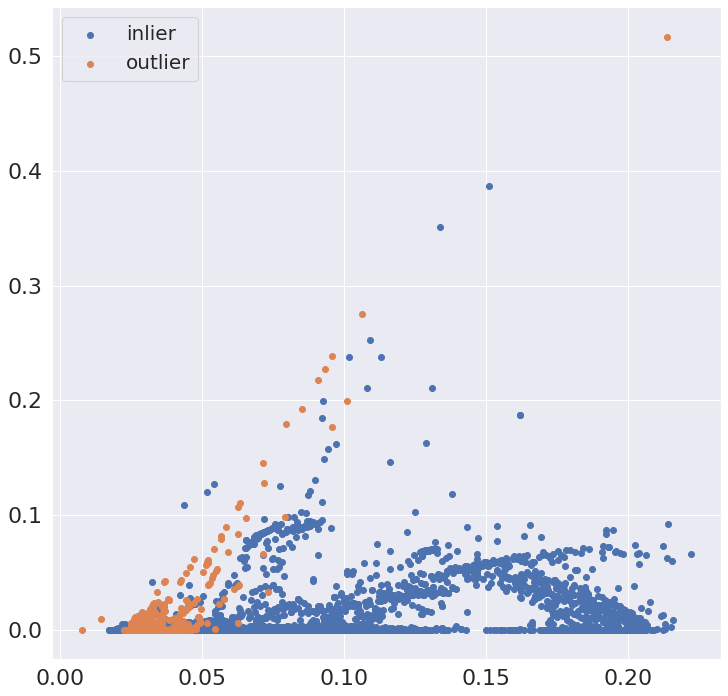

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.995     0.996     0.996     13976
           2      0.996     0.995     0.996     13976

    accuracy                          0.996     27952
   macro avg      0.996     0.996     0.996     27952
weighted avg      0.996     0.996     0.996     27952



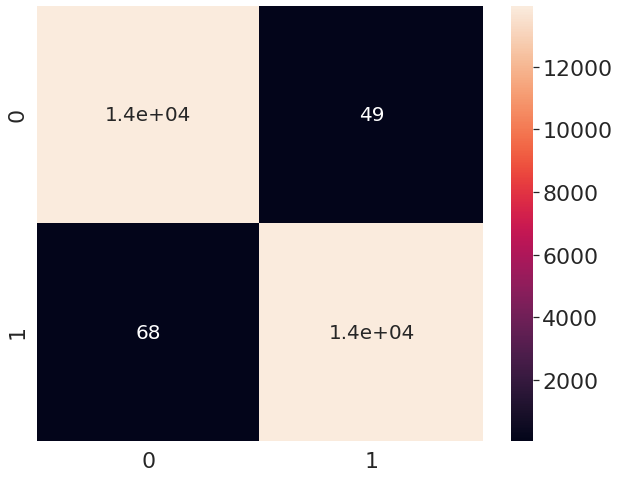

AUC score:  0.9958142530051516


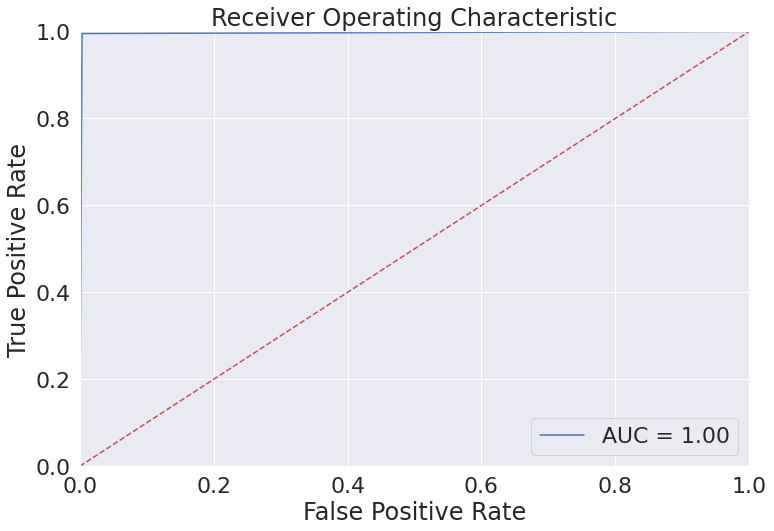

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [57]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14085622 0.04370709 0.00996141 ... 0.57262498 0.6112762  0.85819347]
Visualize quantization error


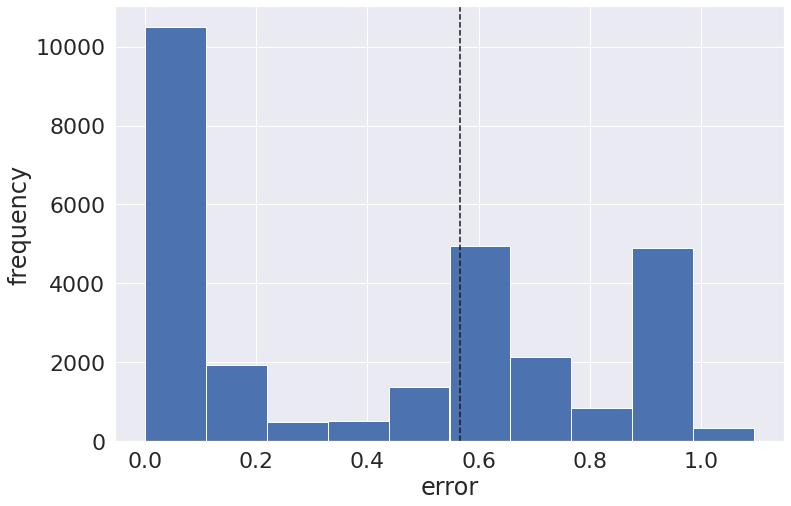

Outliers visualization


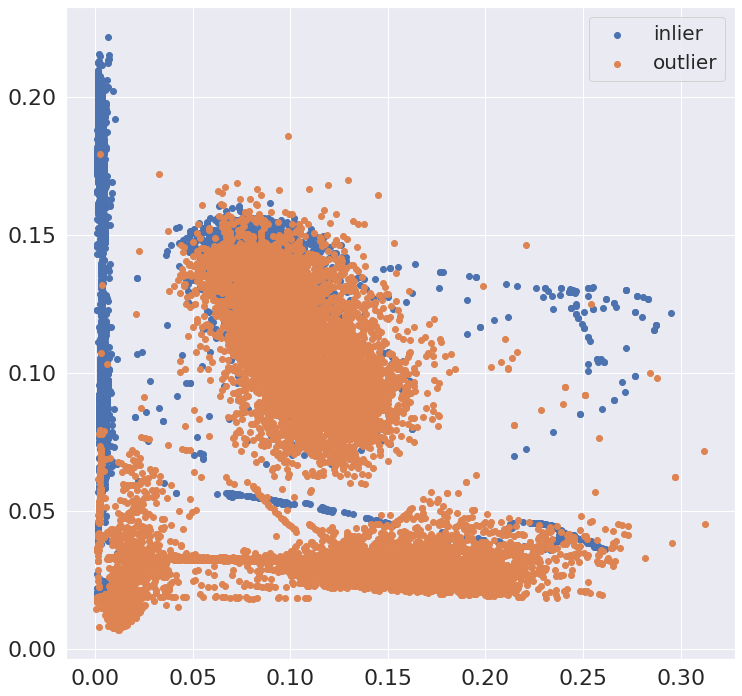

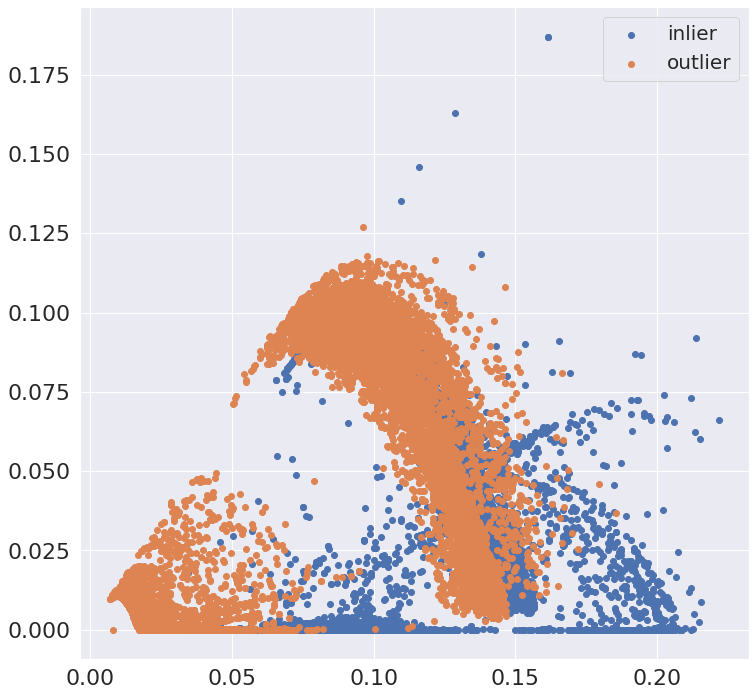

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.603     0.996     0.751     13976
           2      0.990     0.343     0.509     13976

    accuracy                          0.670     27952
   macro avg      0.796     0.670     0.630     27952
weighted avg      0.796     0.670     0.630     27952



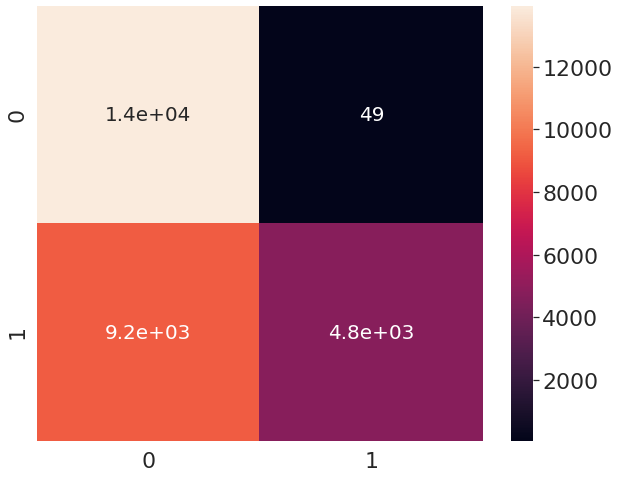

AUC score:  0.6696121923297079


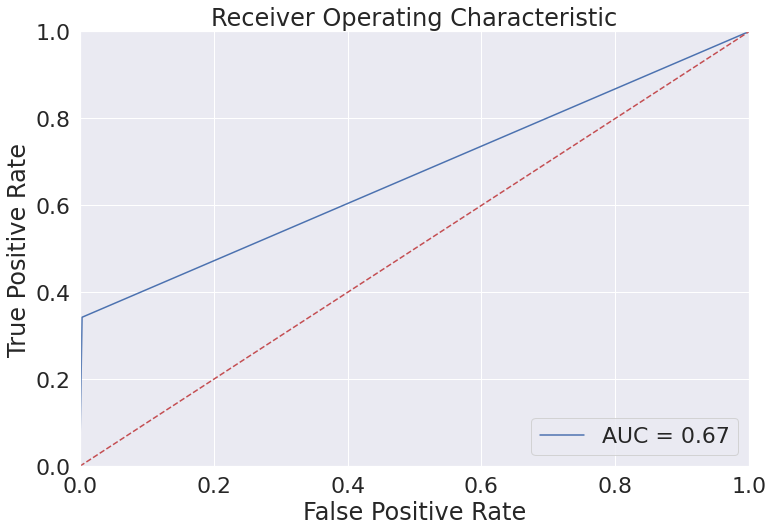

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [58]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Algo anneal

In [59]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 6.93947076e-03  4.24583311e-01  0.00000000e+00 ...  1.77037474e-16
   6.80921655e-33  5.79818262e-18]
 [ 2.29493484e-01  1.32475656e-01  3.30832360e-02 ...  1.02941033e-05
   2.14755130e-06  2.96523918e-02]
 [ 3.58427129e-03  1.26053589e-01  7.61542585e-06 ...  1.36792206e-17
  -1.35591581e-33 -1.46555291e-17]
 ...
 [ 6.93935035e-03  4.24583311e-01  0.00000000e+00 ...  0.00000000e+00
  -2.58587223e-33  0.00000000e+00]
 [ 3.64091784e-03  1.26088377e-01  1.80238720e-14 ...  1.07181698e-17
   2.02275965e-33  2.67143261e-17]
 [ 3.74132208e-03  9.39027538e-02  9.78232080e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.19784383 0.081839   0.02078889 ... 0.87369268 0.3316775  0.87959475]
Visualize quantization error


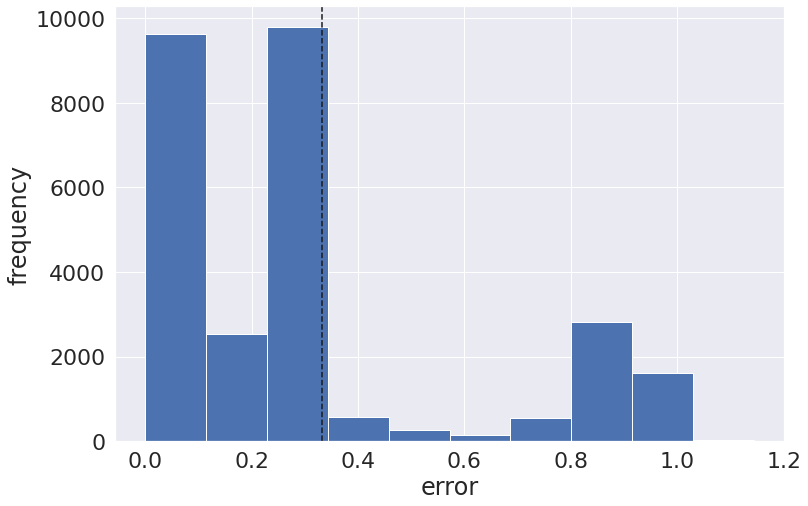

Outliers visualization


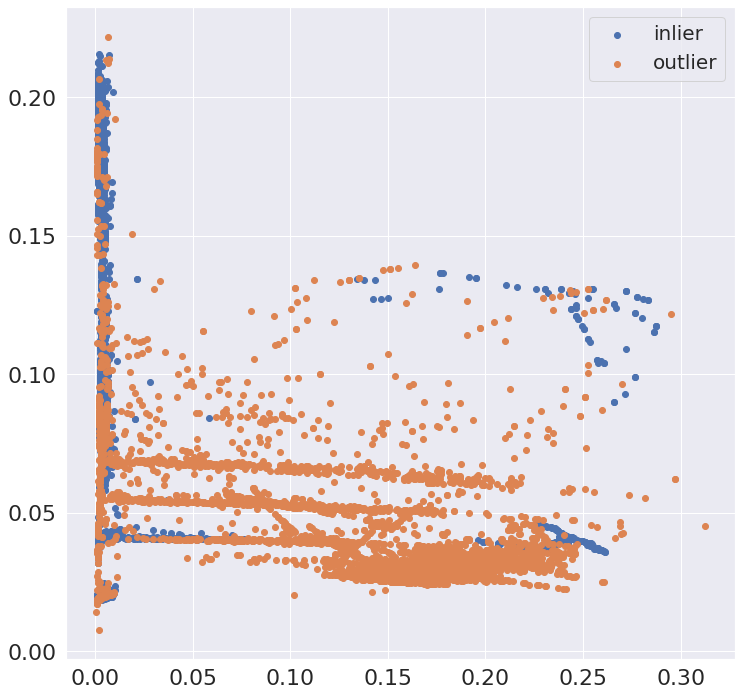

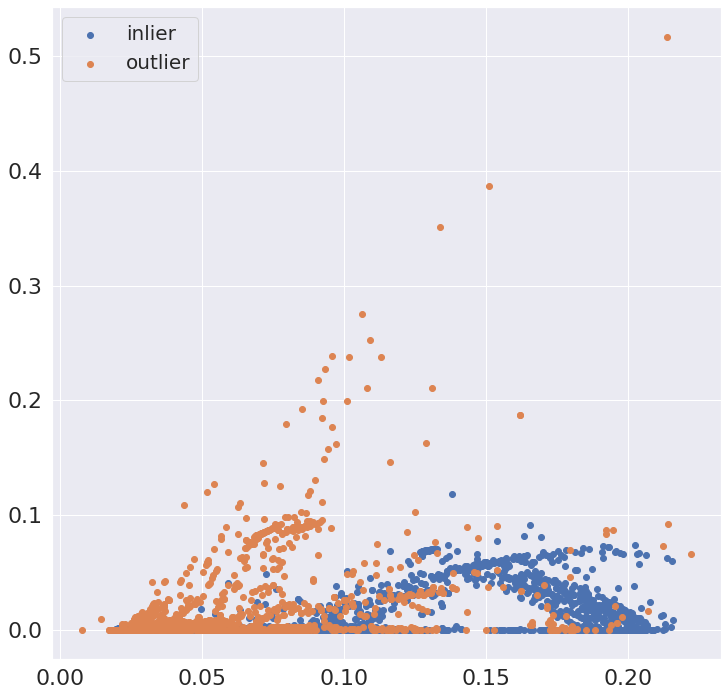

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.992     0.995     13976
           2      0.992     0.997     0.995     13976

    accuracy                          0.995     27952
   macro avg      0.995     0.995     0.995     27952
weighted avg      0.995     0.995     0.995     27952



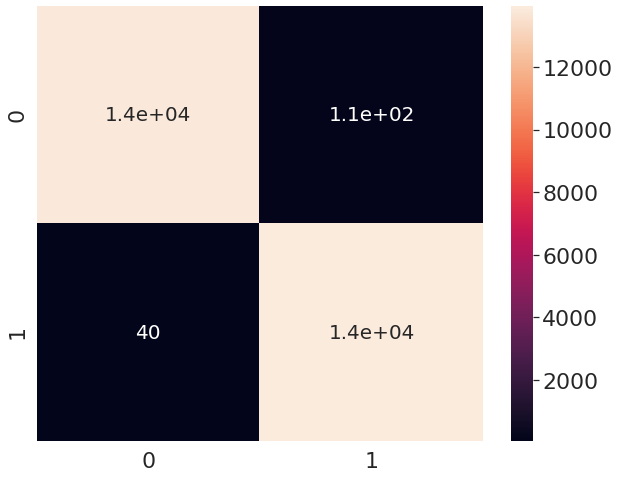

AUC score:  0.9947767601602747


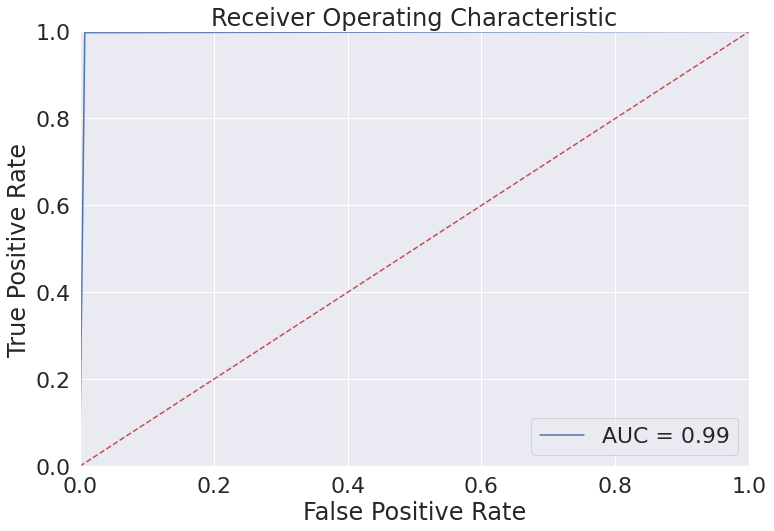

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [60]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.19784383 0.081839   0.02078889 ... 0.51588707 0.57007611 0.84646748]
Visualize quantization error


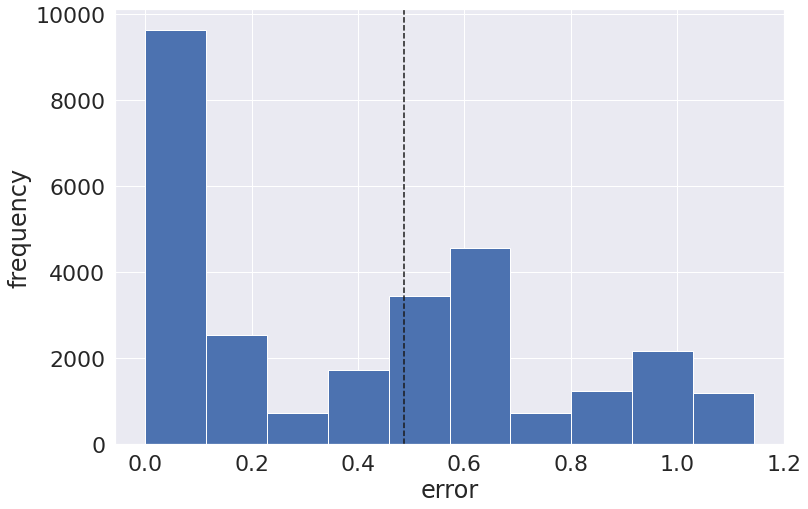

Outliers visualization


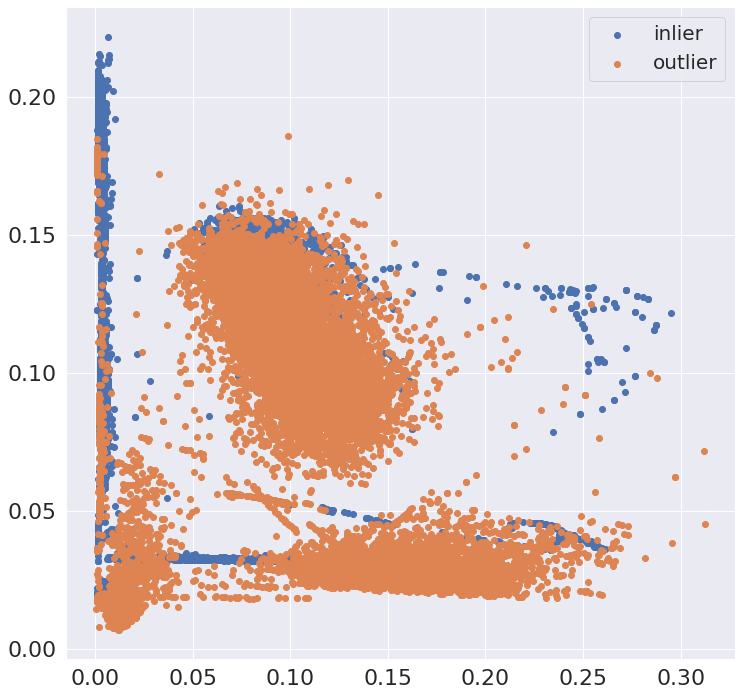

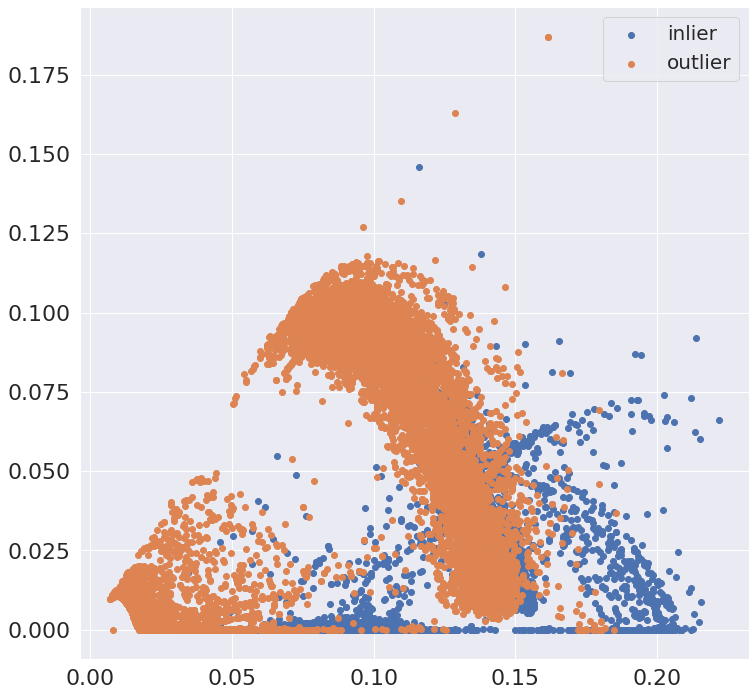

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.585     0.992     0.736     13976
           2      0.975     0.297     0.455     13976

    accuracy                          0.645     27952
   macro avg      0.780     0.645     0.596     27952
weighted avg      0.780     0.645     0.596     27952



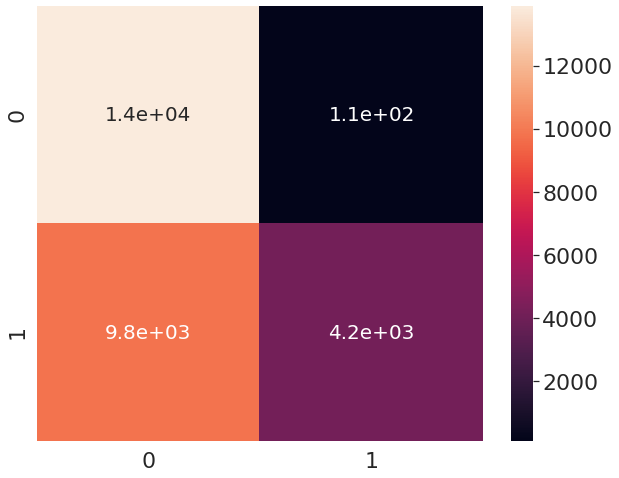

AUC score:  0.6447481396680023


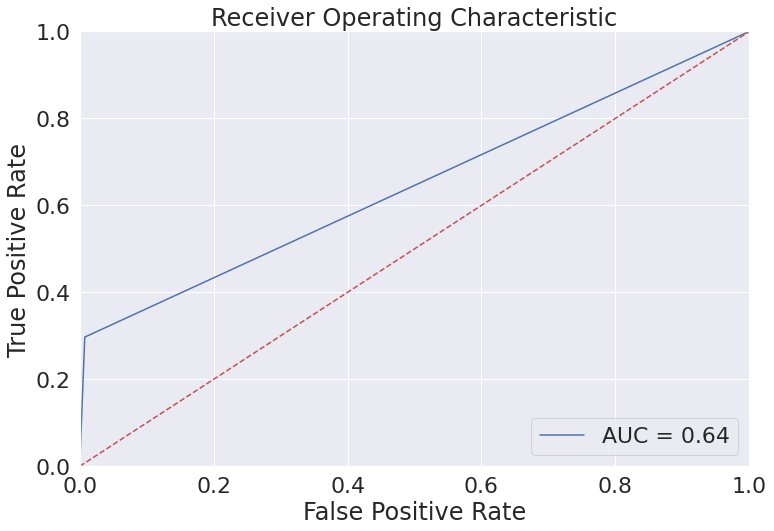

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [61]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

## 4.2. Train Mirai


## 4.2.4. Ratio 1.0

### 1) Set 15

### Train

In [62]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.68284797e-03  5.87496218e-01  0.00000000e+00 ...  1.77037474e-16
   7.49819992e-33  5.79818262e-18]
 [ 1.54865282e-01  1.83306656e-01  6.96827378e-02 ...  1.02941033e-05
   2.36484901e-06  2.96523918e-02]
 [ 2.41871435e-03  1.74420438e-01  1.60402605e-05 ...  1.36792206e-17
  -1.49311272e-33 -1.46555291e-17]
 ...
 [ 4.68276671e-03  5.87496218e-01  0.00000000e+00 ...  0.00000000e+00
  -2.84752097e-33  0.00000000e+00]
 [ 2.45694021e-03  1.74468574e-01  3.79634190e-14 ...  1.07181698e-17
   2.22743044e-33  2.67143261e-17]
 [ 2.52469433e-03  1.29933305e-01  2.06043598e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.37485994 0.15039767 0.12700608 ... 0.94351107 1.11463263 0.94651573]
Visualize quantization error


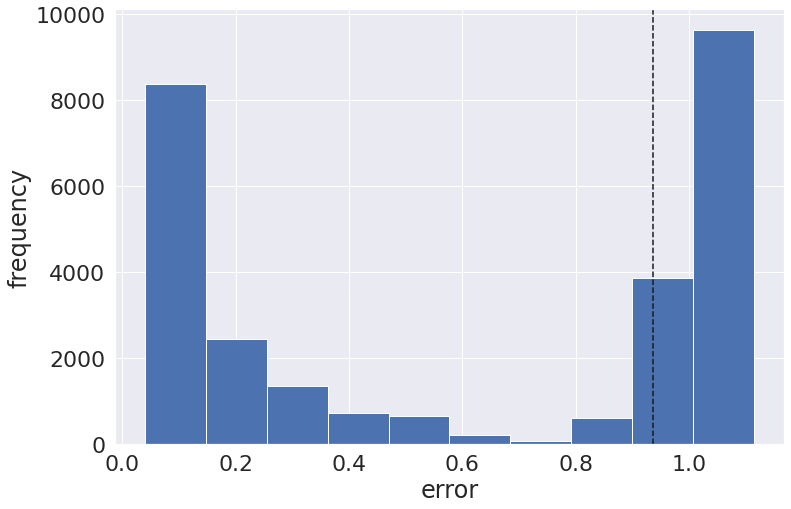

Outliers visualization


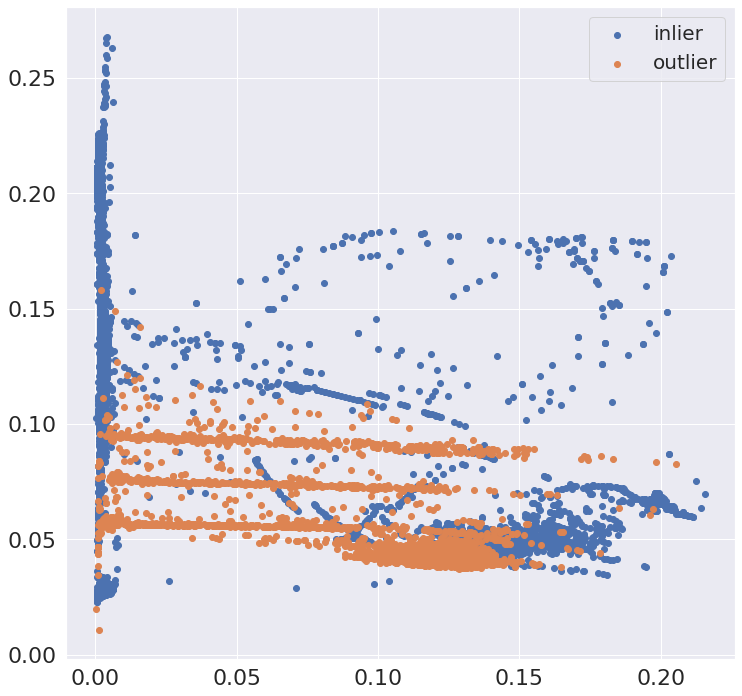

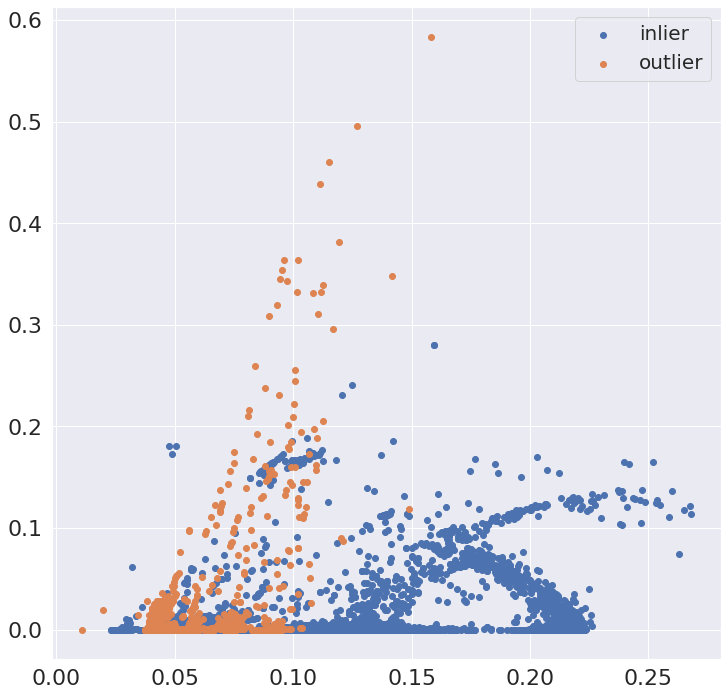

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.955     0.988     0.971     13976
           2      0.987     0.954     0.970     13976

    accuracy                          0.971     27952
   macro avg      0.971     0.971     0.971     27952
weighted avg      0.971     0.971     0.971     27952



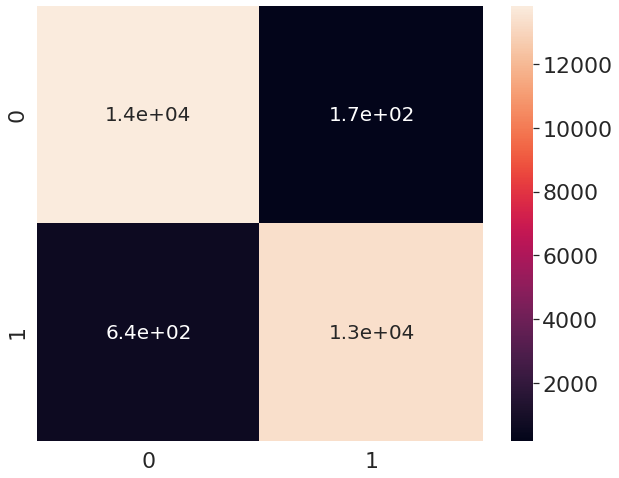

AUC score:  0.970699771036062


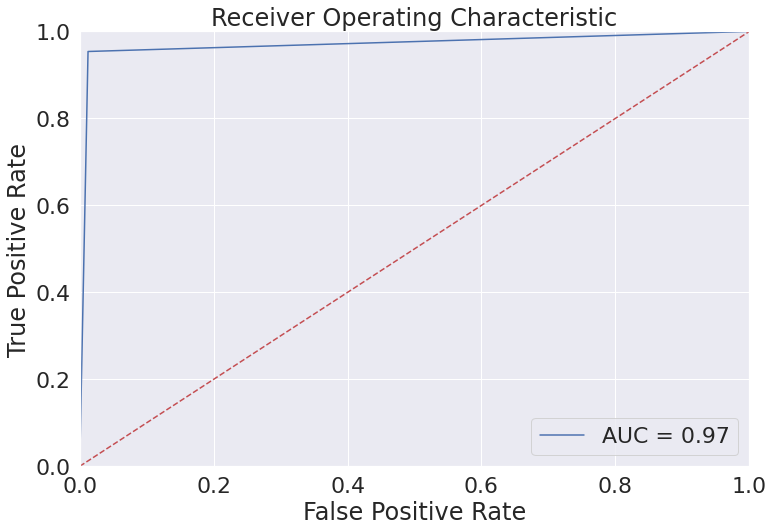

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [63]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.37485994 0.15039767 0.12700608 ... 0.53587672 0.54197877 0.91871884]
Visualize quantization error


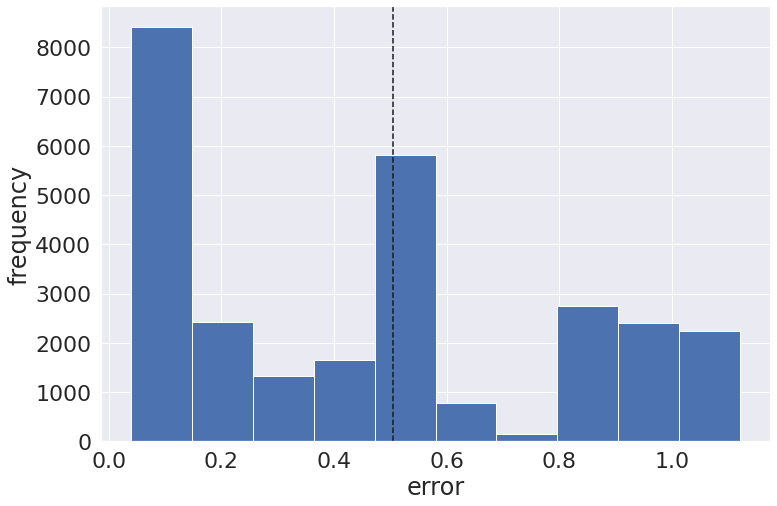

Outliers visualization


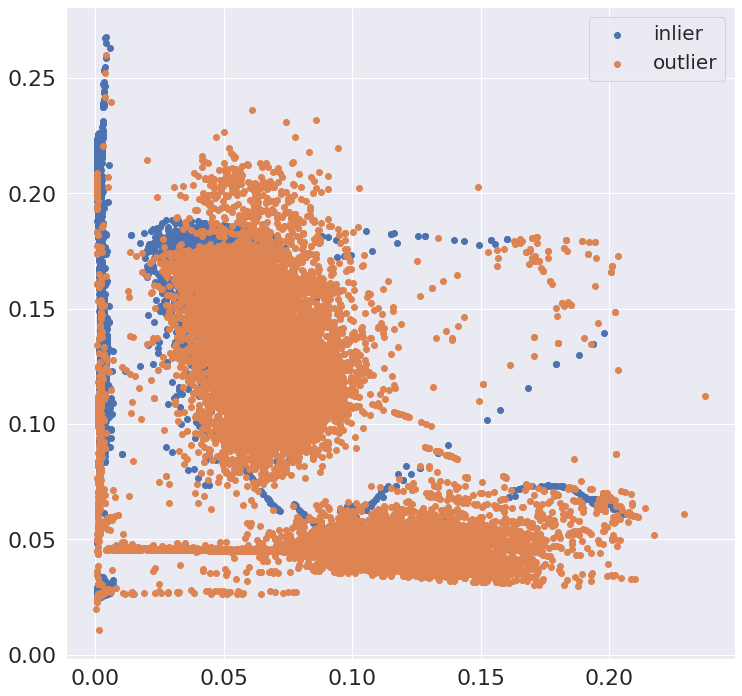

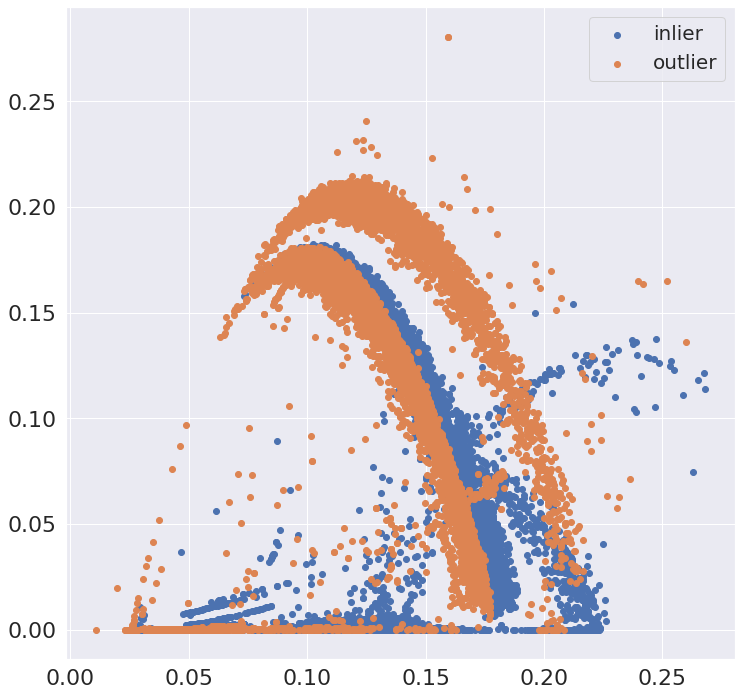

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.988     0.992     13976
           2      0.988     0.997     0.992     13976

    accuracy                          0.992     27952
   macro avg      0.992     0.992     0.992     27952
weighted avg      0.992     0.992     0.992     27952



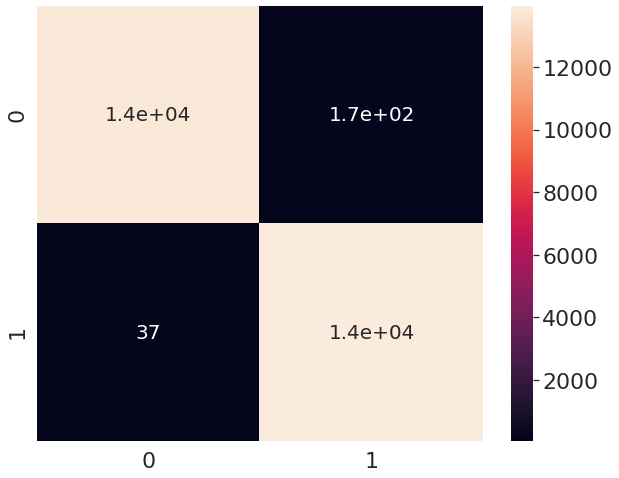

AUC score:  0.9924513451631368


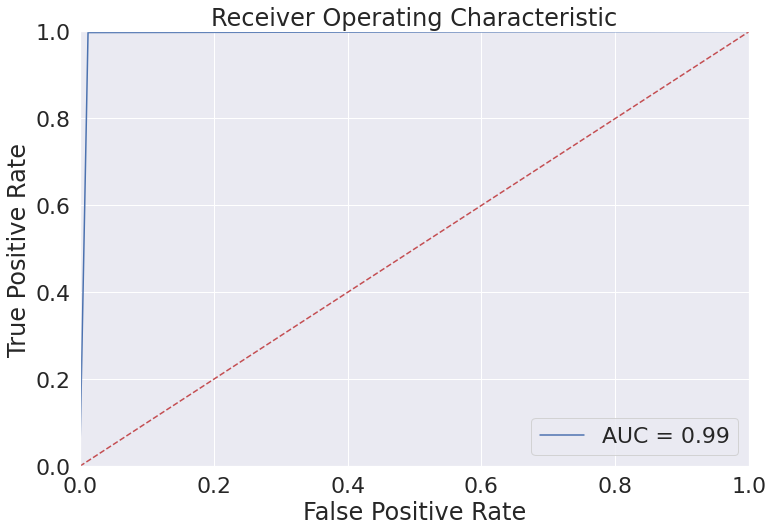

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [64]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [65]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.68284797e-03  5.87496218e-01  0.00000000e+00 ...  1.77037474e-16
   7.49819992e-33  5.79818262e-18]
 [ 1.54865282e-01  1.83306656e-01  6.96827378e-02 ...  1.02941033e-05
   2.36484901e-06  2.96523918e-02]
 [ 2.41871435e-03  1.74420438e-01  1.60402605e-05 ...  1.36792206e-17
  -1.49311272e-33 -1.46555291e-17]
 ...
 [ 4.68276671e-03  5.87496218e-01  0.00000000e+00 ...  0.00000000e+00
  -2.84752097e-33  0.00000000e+00]
 [ 2.45694021e-03  1.74468574e-01  3.79634190e-14 ...  1.07181698e-17
   2.22743044e-33  2.67143261e-17]
 [ 2.52469433e-03  1.29933305e-01  2.06043598e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.17311137 0.12470848 0.05183656 ... 0.80489696 0.88545278 0.81224564]
Visualize quantization error


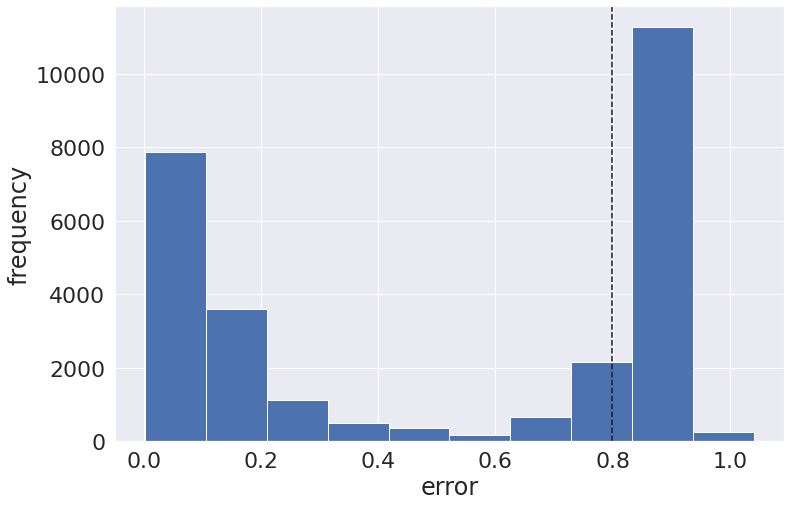

Outliers visualization


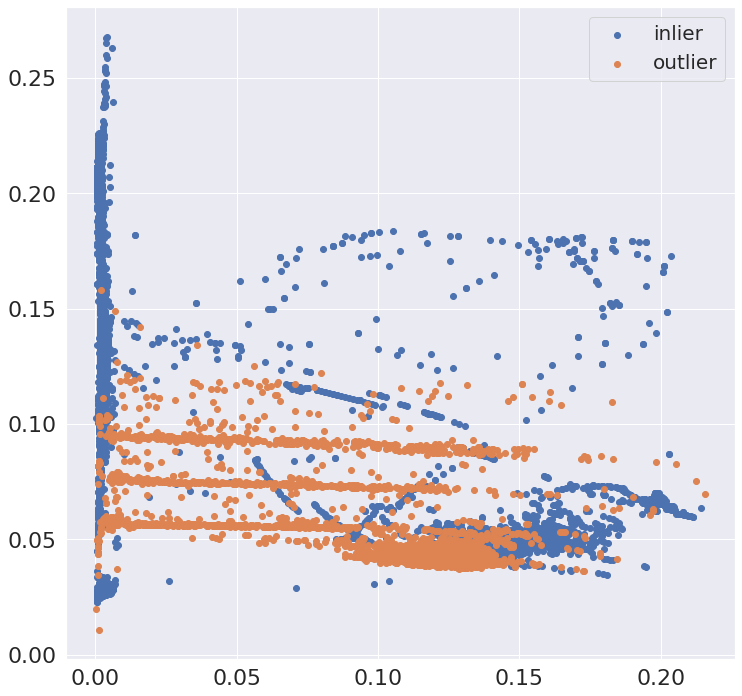

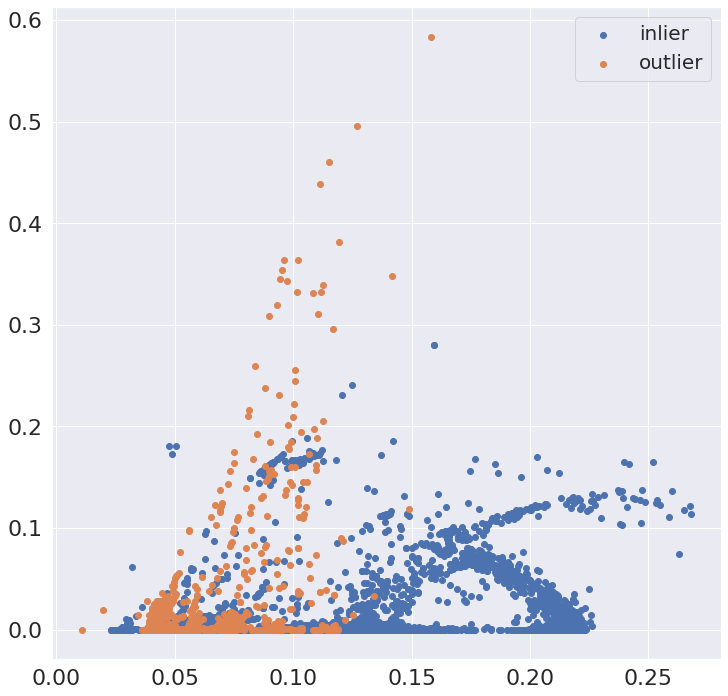

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.960     0.989     0.974     13976
           2      0.989     0.958     0.973     13976

    accuracy                          0.974     27952
   macro avg      0.974     0.974     0.974     27952
weighted avg      0.974     0.974     0.974     27952



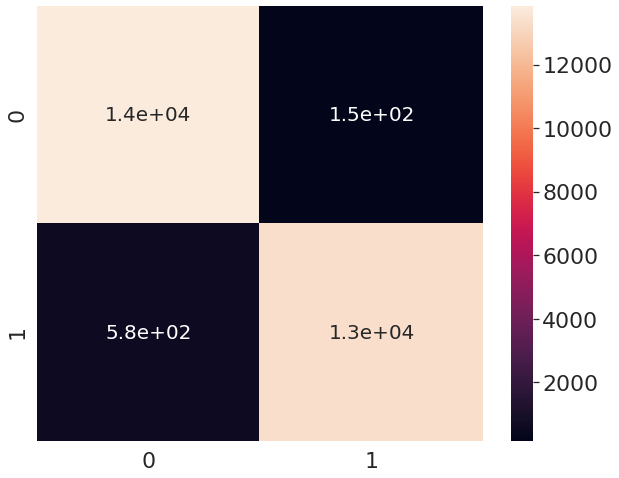

AUC score:  0.9738838008013737


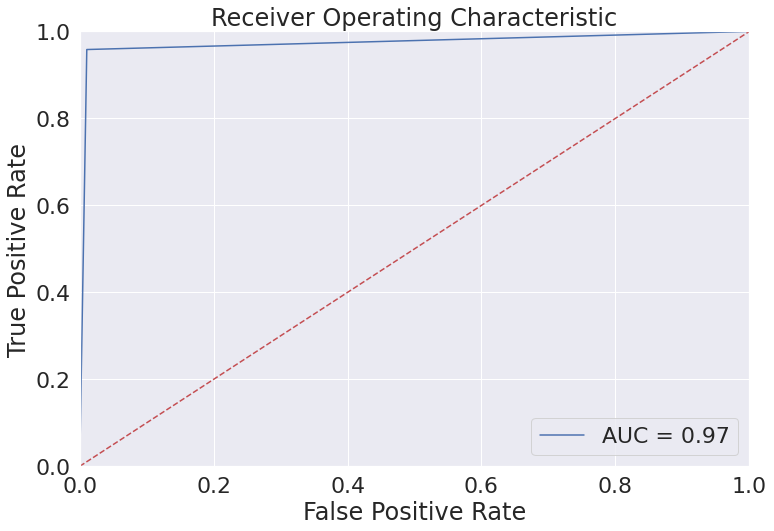

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [66]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.17311137 0.12470848 0.05183656 ... 0.53200332 0.52797288 0.76943875]
Visualize quantization error


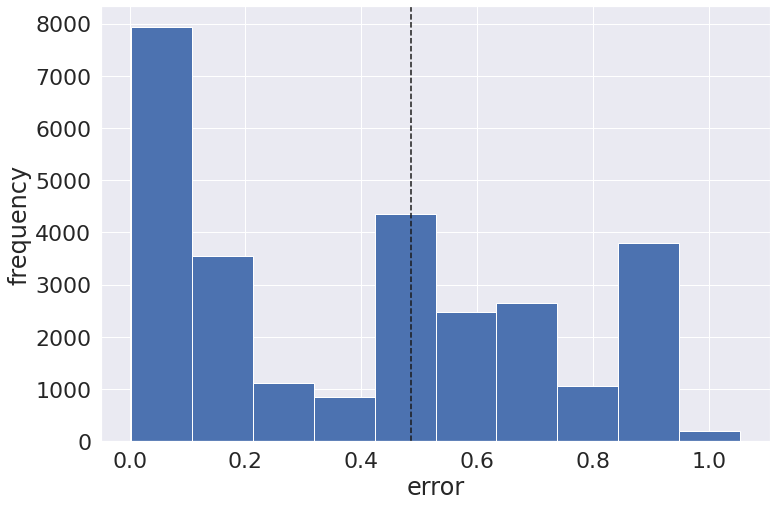

Outliers visualization


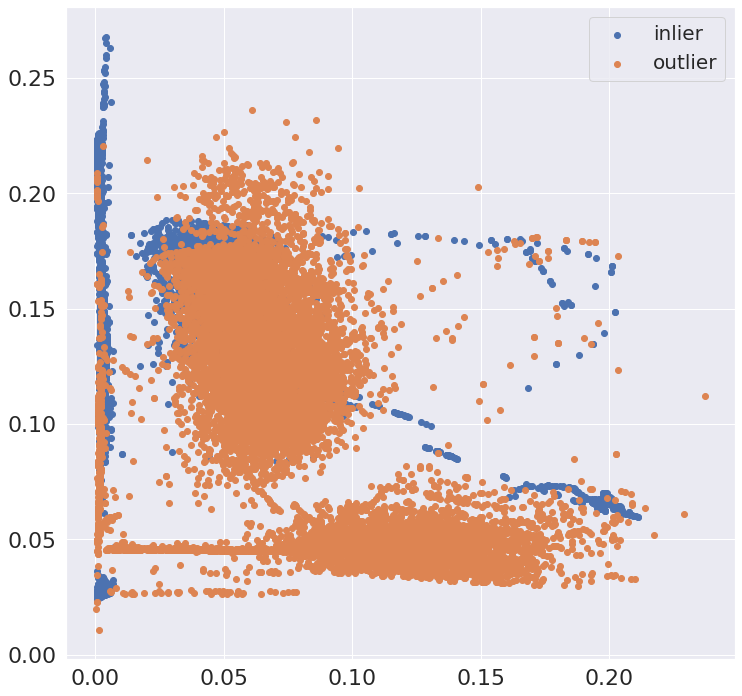

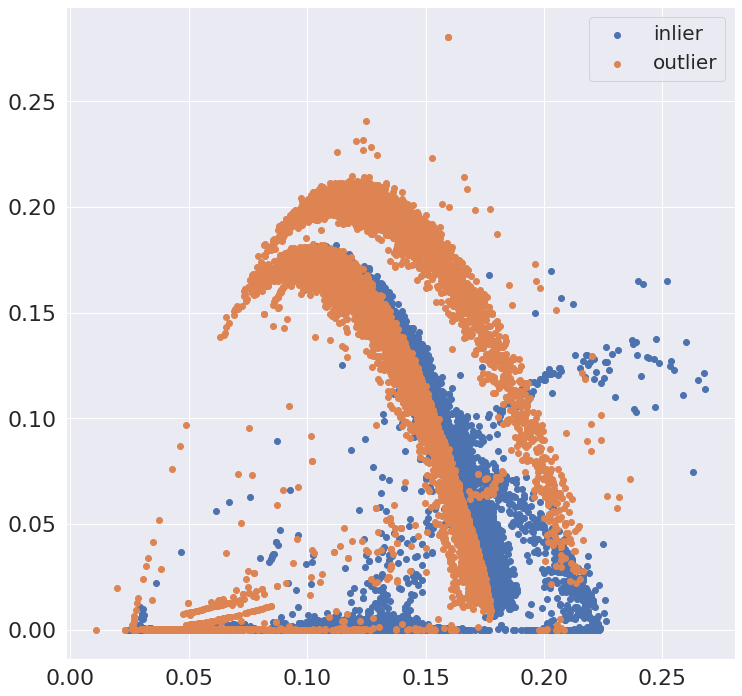

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.989     0.993     13976
           2      0.989     0.997     0.993     13976

    accuracy                          0.993     27952
   macro avg      0.993     0.993     0.993     27952
weighted avg      0.993     0.993     0.993     27952



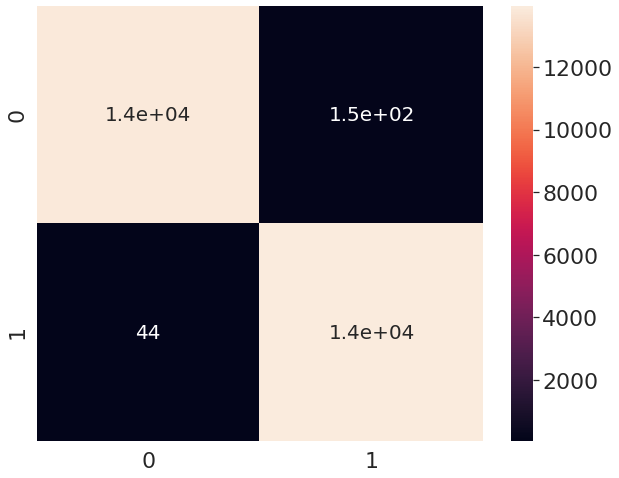

AUC score:  0.993131081854608


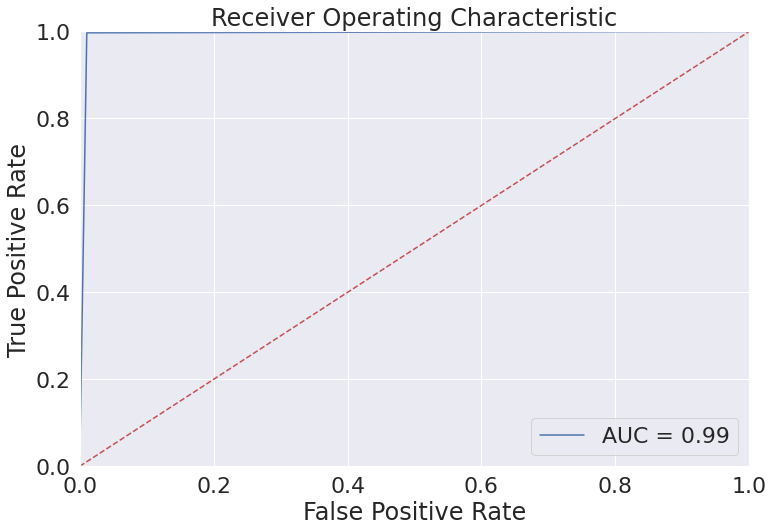

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Set 30

### Train

In [68]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.68284797e-03  5.87496218e-01  0.00000000e+00 ...  1.77037474e-16
   7.49819992e-33  5.79818262e-18]
 [ 1.54865282e-01  1.83306656e-01  6.96827378e-02 ...  1.02941033e-05
   2.36484901e-06  2.96523918e-02]
 [ 2.41871435e-03  1.74420438e-01  1.60402605e-05 ...  1.36792206e-17
  -1.49311272e-33 -1.46555291e-17]
 ...
 [ 4.68276671e-03  5.87496218e-01  0.00000000e+00 ...  0.00000000e+00
  -2.84752097e-33  0.00000000e+00]
 [ 2.45694021e-03  1.74468574e-01  3.79634190e-14 ...  1.07181698e-17
   2.22743044e-33  2.67143261e-17]
 [ 2.52469433e-03  1.29933305e-01  2.06043598e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.16674545 0.10013011 0.01389694 ... 0.79702896 1.12568779 0.80467937]
Visualize quantization error


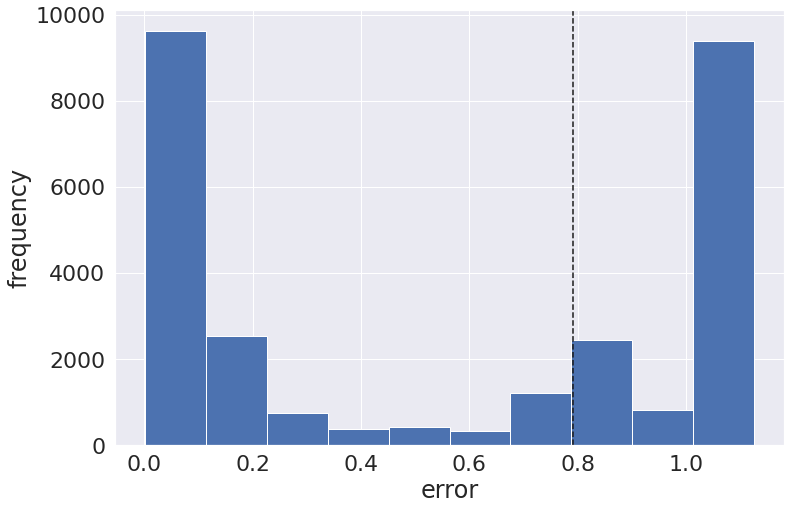

Outliers visualization


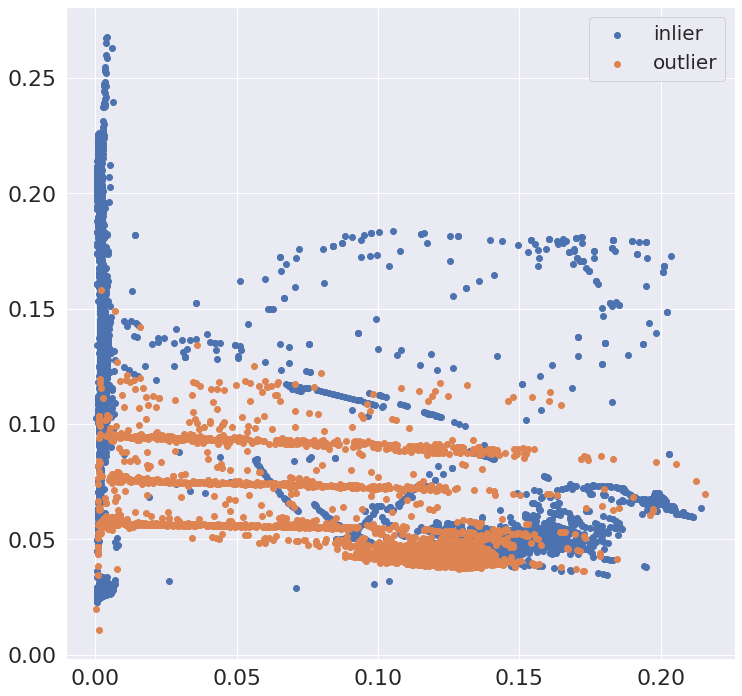

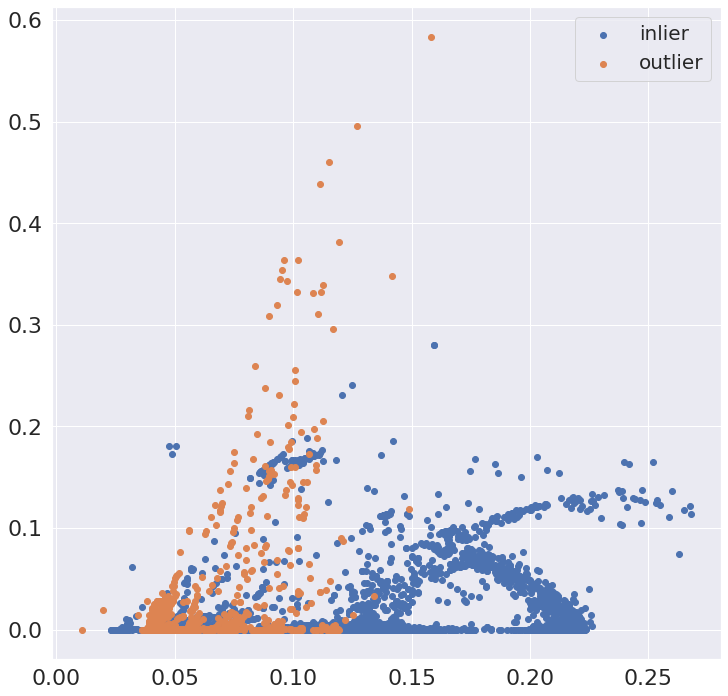

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.595     0.995     0.744     13976
           2      0.984     0.322     0.485     13976

    accuracy                          0.658     27952
   macro avg      0.789     0.658     0.614     27952
weighted avg      0.789     0.658     0.614     27952



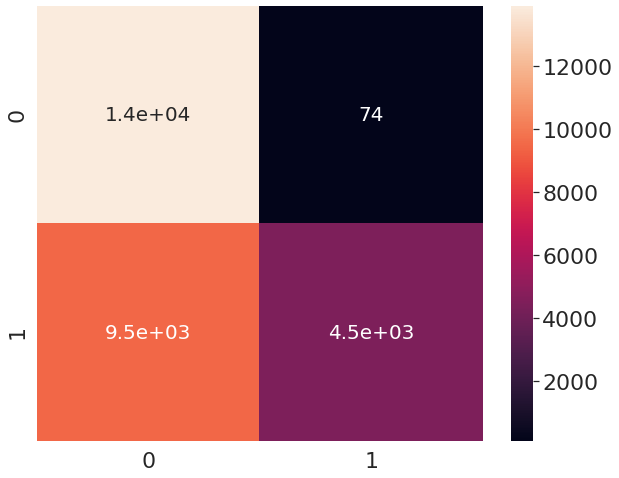

AUC score:  0.6581282198053806


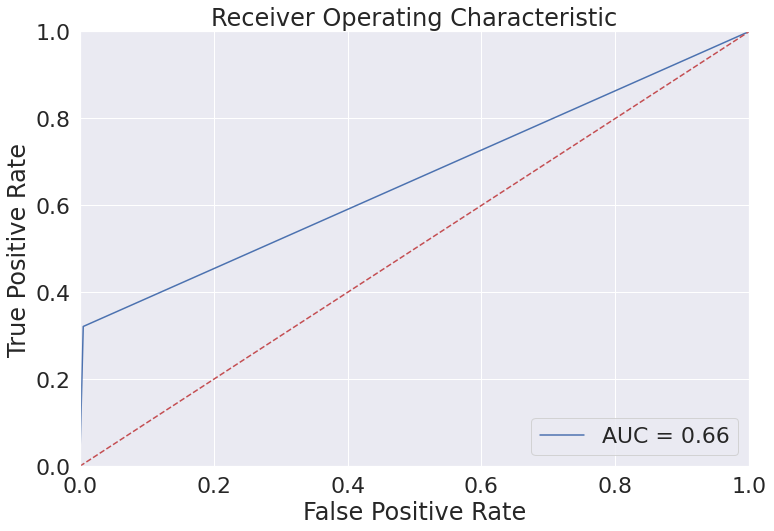

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.16674545 0.10013011 0.01389694 ... 0.48582531 0.4875402  0.76172243]
Visualize quantization error


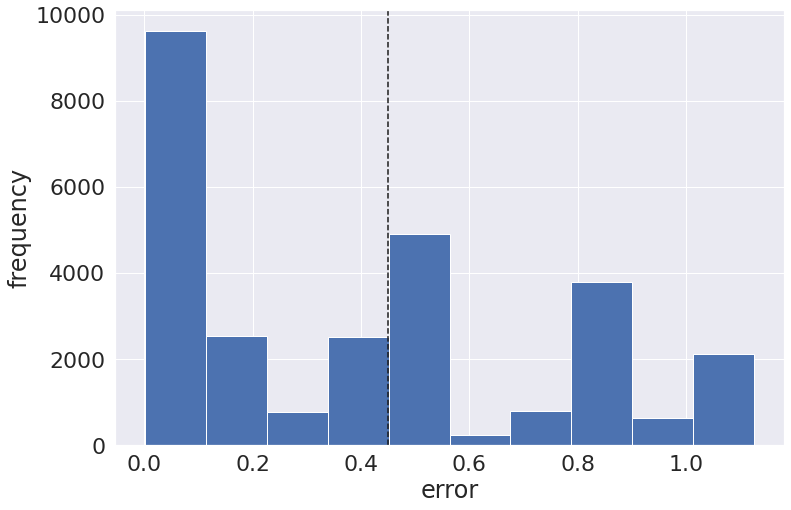

Outliers visualization


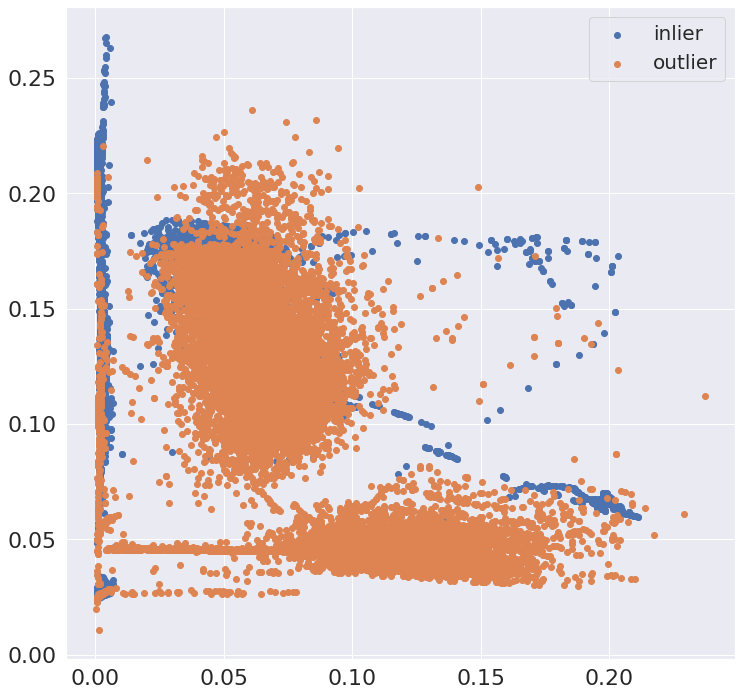

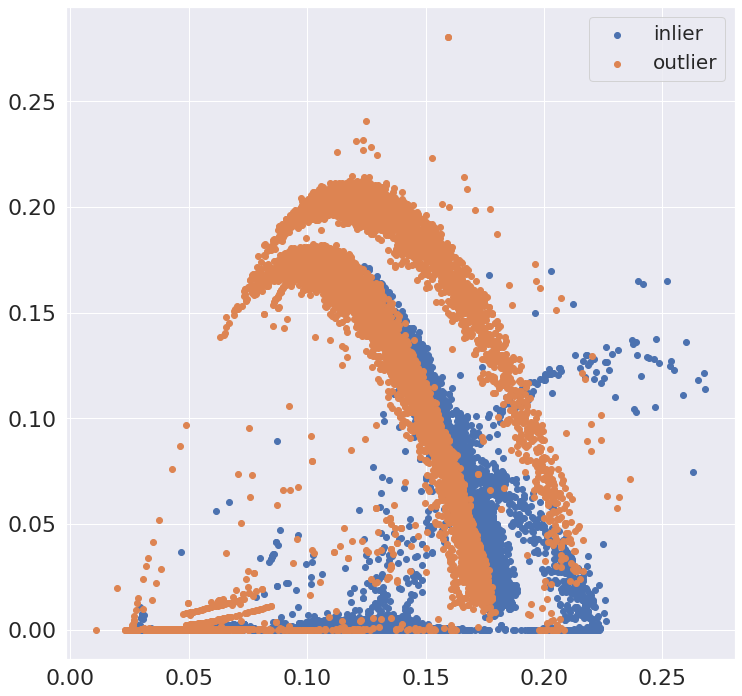

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.995     0.995     0.995     13976
           2      0.995     0.995     0.995     13976

    accuracy                          0.995     27952
   macro avg      0.995     0.995     0.995     27952
weighted avg      0.995     0.995     0.995     27952



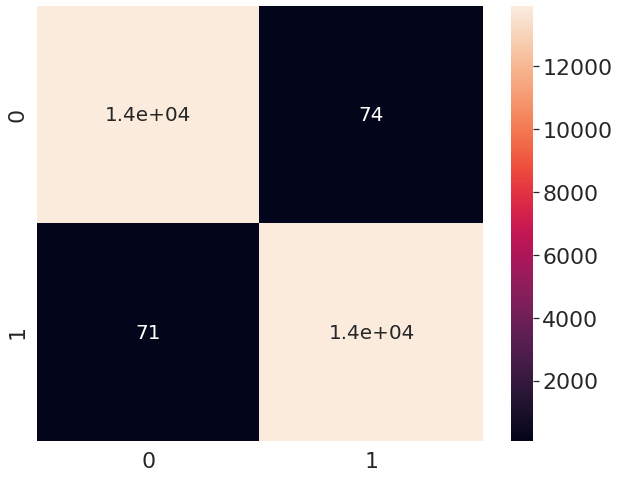

AUC score:  0.9948125357756153


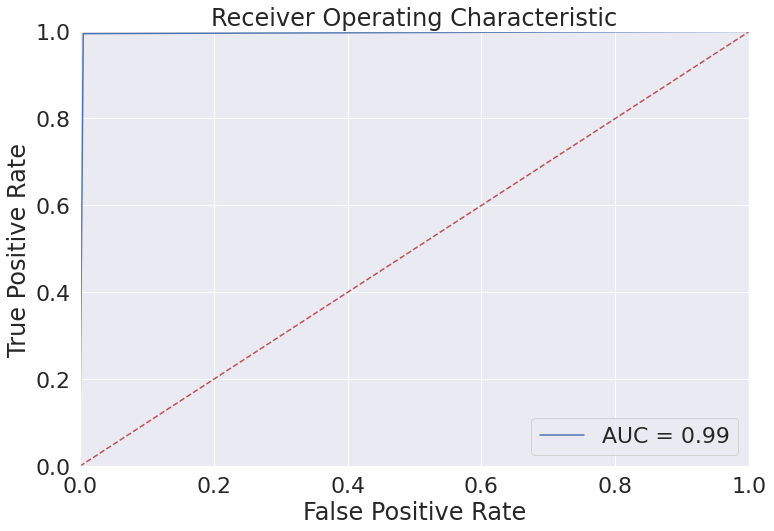

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Set 45

### Train

In [71]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.68284797e-03  5.87496218e-01  0.00000000e+00 ...  1.77037474e-16
   7.49819992e-33  5.79818262e-18]
 [ 1.54865282e-01  1.83306656e-01  6.96827378e-02 ...  1.02941033e-05
   2.36484901e-06  2.96523918e-02]
 [ 2.41871435e-03  1.74420438e-01  1.60402605e-05 ...  1.36792206e-17
  -1.49311272e-33 -1.46555291e-17]
 ...
 [ 4.68276671e-03  5.87496218e-01  0.00000000e+00 ...  0.00000000e+00
  -2.84752097e-33  0.00000000e+00]
 [ 2.45694021e-03  1.74468574e-01  3.79634190e-14 ...  1.07181698e-17
   2.22743044e-33  2.67143261e-17]
 [ 2.52469433e-03  1.29933305e-01  2.06043598e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14172344 0.0714687  0.00707695 ... 0.8430396  0.92644711 0.84738585]
Visualize quantization error


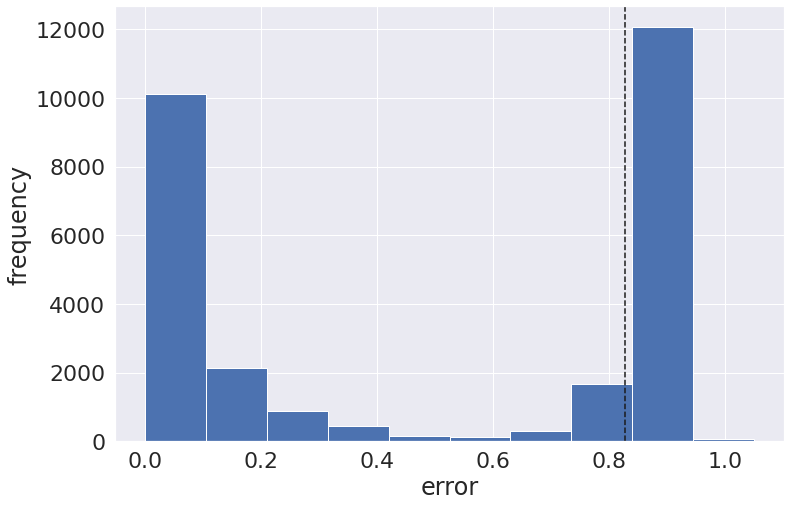

Outliers visualization


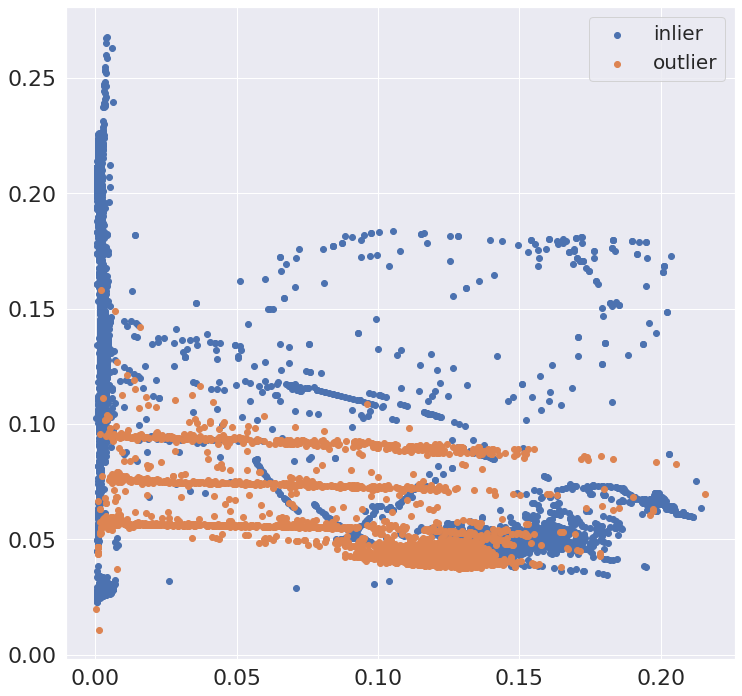

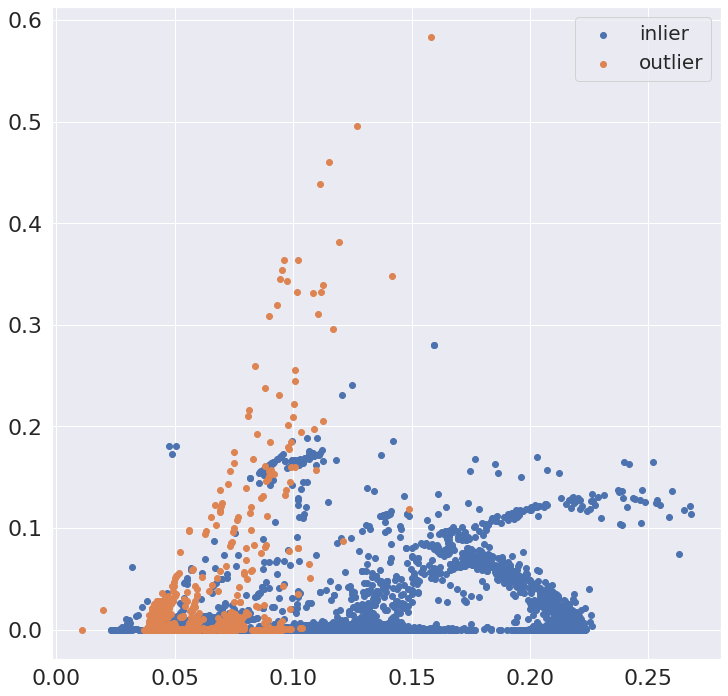

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.940     0.979     0.959     13976
           2      0.978     0.937     0.957     13976

    accuracy                          0.958     27952
   macro avg      0.959     0.958     0.958     27952
weighted avg      0.959     0.958     0.958     27952



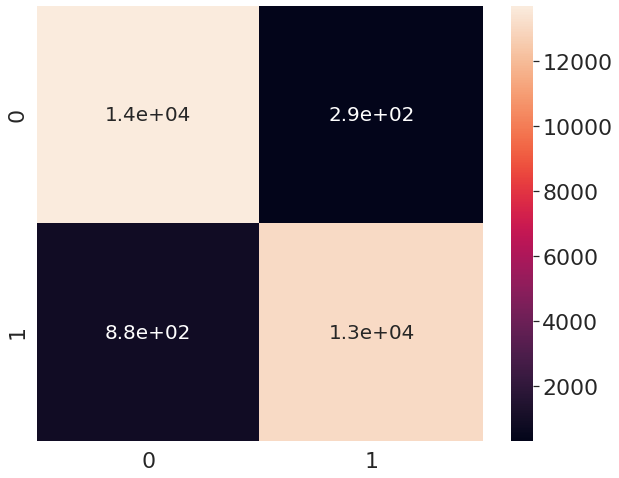

AUC score:  0.9581783056668576


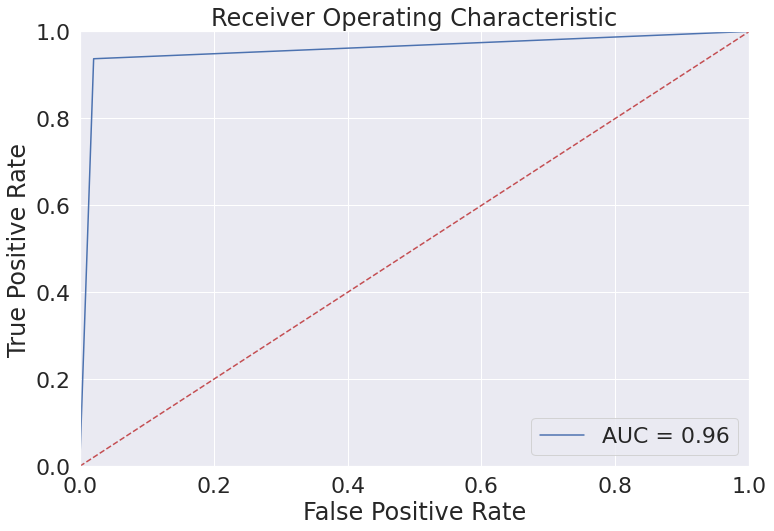

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [72]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14172344 0.0714687  0.00707695 ... 0.50832745 0.50522869 0.80244262]
Visualize quantization error


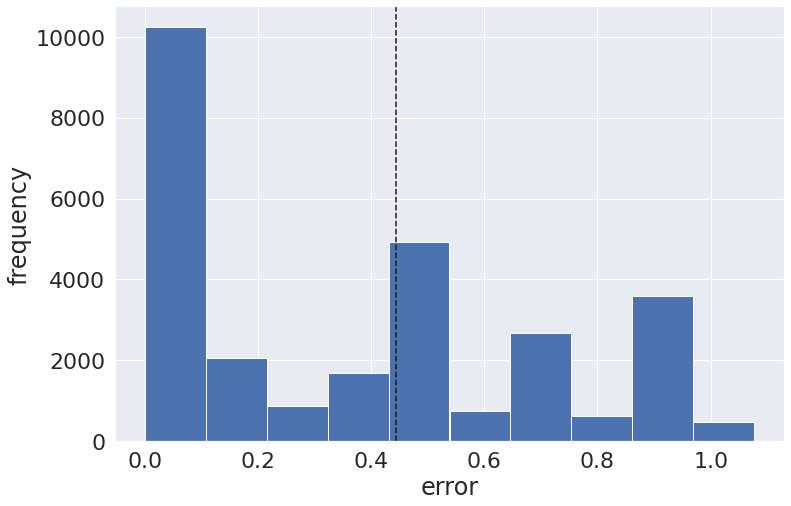

Outliers visualization


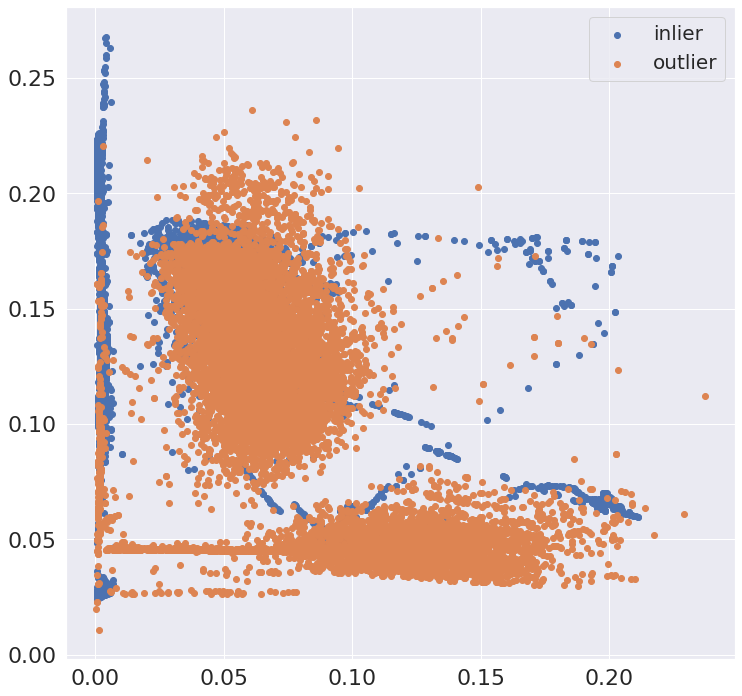

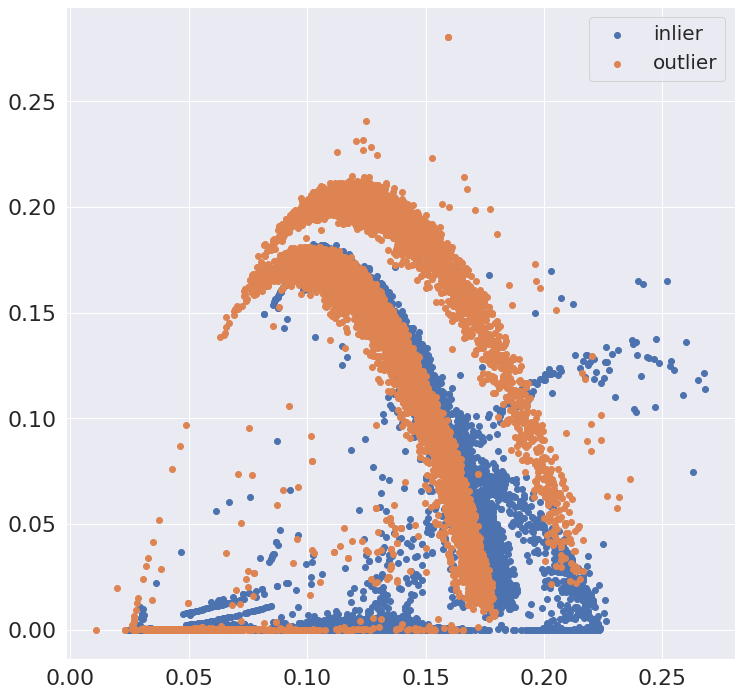

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.995     0.979     0.987     13976
           2      0.980     0.995     0.987     13976

    accuracy                          0.987     27952
   macro avg      0.987     0.987     0.987     27952
weighted avg      0.987     0.987     0.987     27952



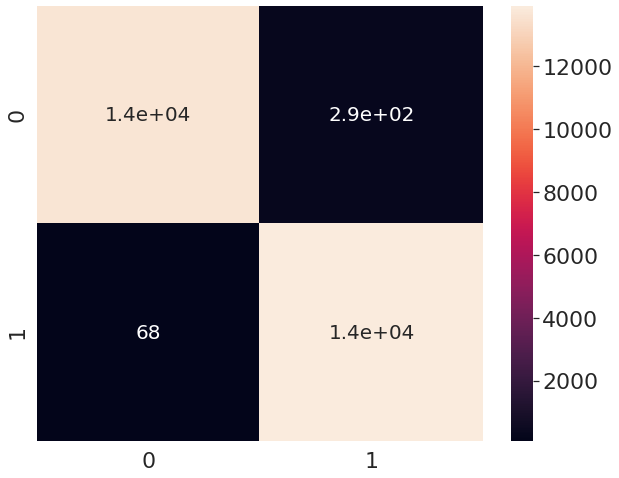

AUC score:  0.9871565540927304


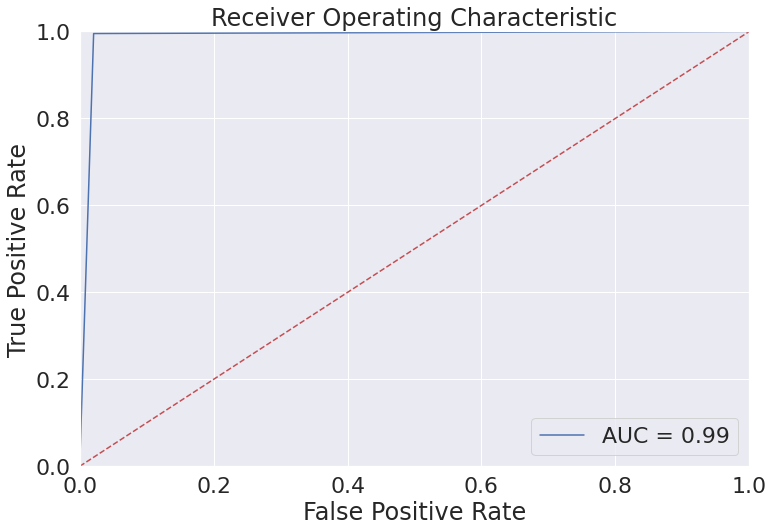

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)


### 1) Algo tpe

### Train

In [74]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.68284797e-03  5.87496218e-01  0.00000000e+00 ...  1.77037474e-16
   7.49819992e-33  5.79818262e-18]
 [ 1.54865282e-01  1.83306656e-01  6.96827378e-02 ...  1.02941033e-05
   2.36484901e-06  2.96523918e-02]
 [ 2.41871435e-03  1.74420438e-01  1.60402605e-05 ...  1.36792206e-17
  -1.49311272e-33 -1.46555291e-17]
 ...
 [ 4.68276671e-03  5.87496218e-01  0.00000000e+00 ...  0.00000000e+00
  -2.84752097e-33  0.00000000e+00]
 [ 2.45694021e-03  1.74468574e-01  3.79634190e-14 ...  1.07181698e-17
   2.22743044e-33  2.67143261e-17]
 [ 2.52469433e-03  1.29933305e-01  2.06043598e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.27377597 0.06389882 0.01606858 ... 1.05167954 1.13346958 1.05654585]
Visualize quantization error


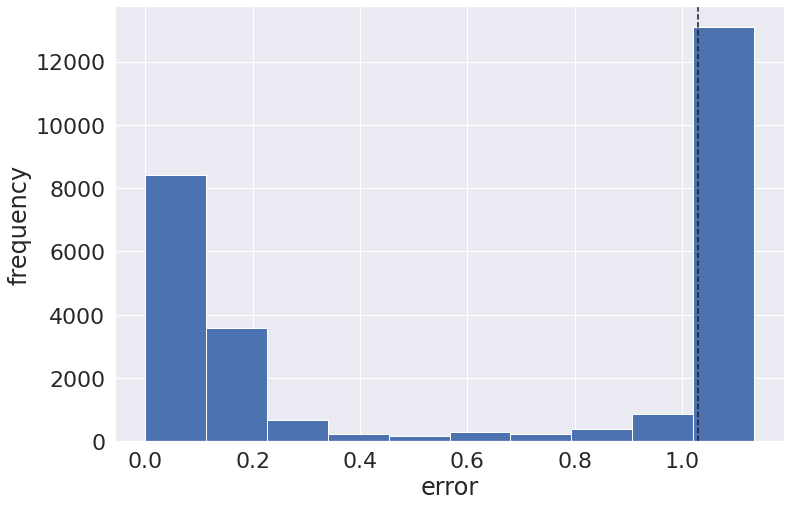

Outliers visualization


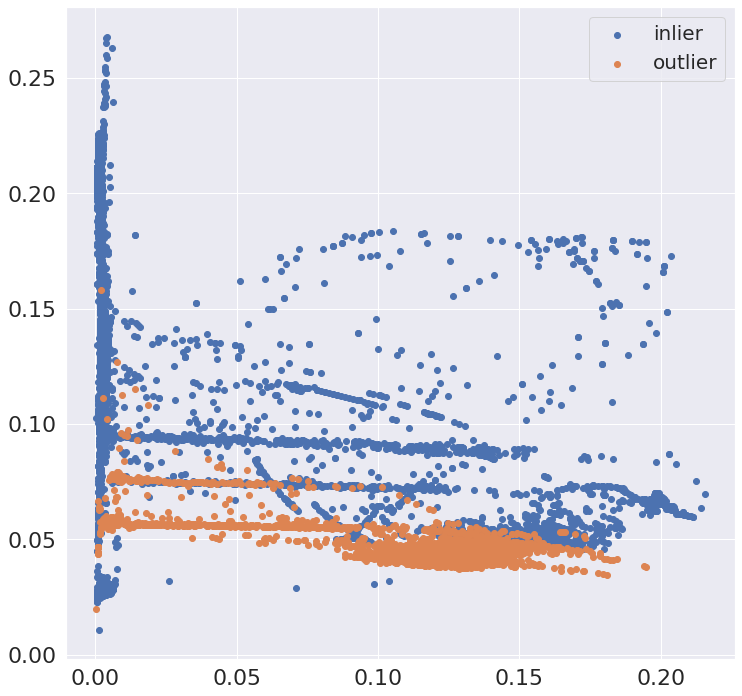

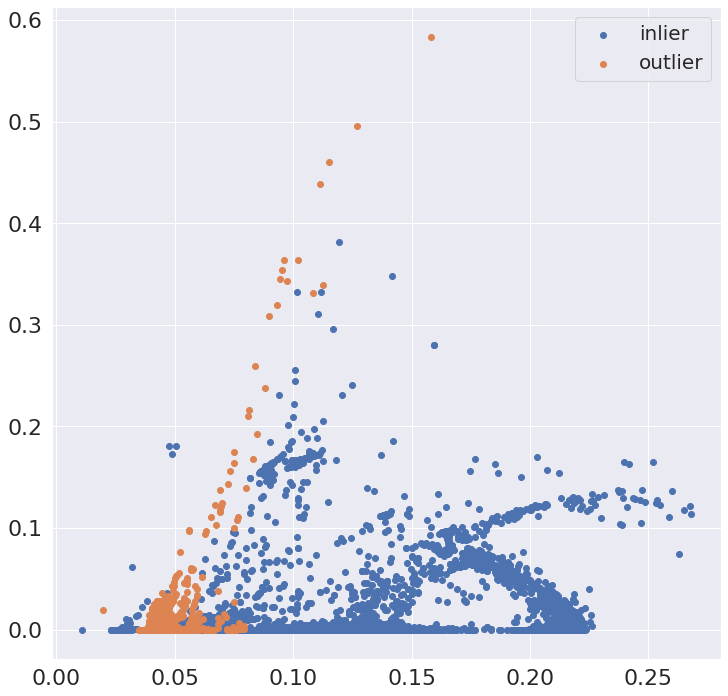

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.592     0.981     0.738     13976
           2      0.945     0.322     0.481     13976

    accuracy                          0.652     27952
   macro avg      0.768     0.652     0.610     27952
weighted avg      0.768     0.652     0.610     27952



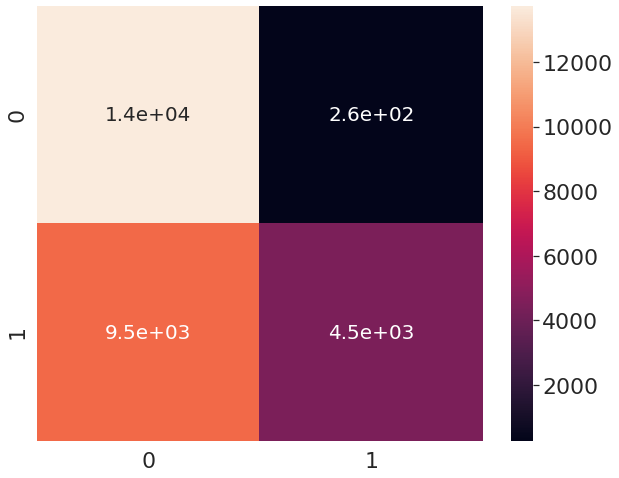

AUC score:  0.651903262736119


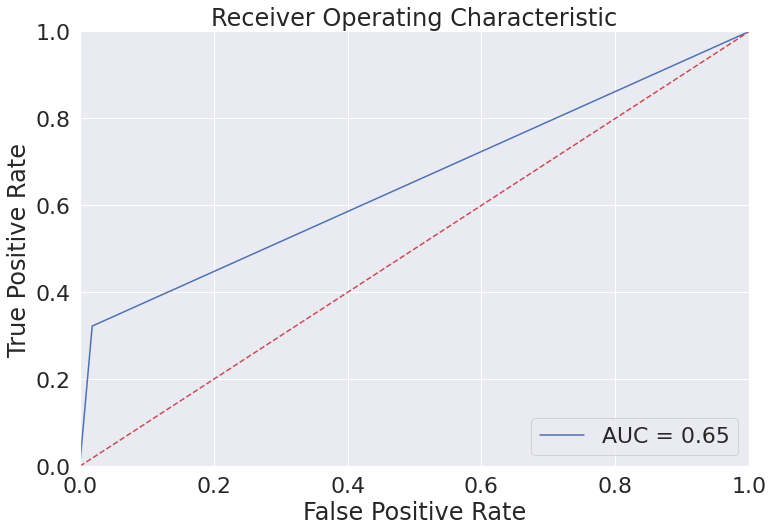

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [75]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.27377597 0.06389882 0.01606858 ... 0.53713687 0.52882716 1.00839149]
Visualize quantization error


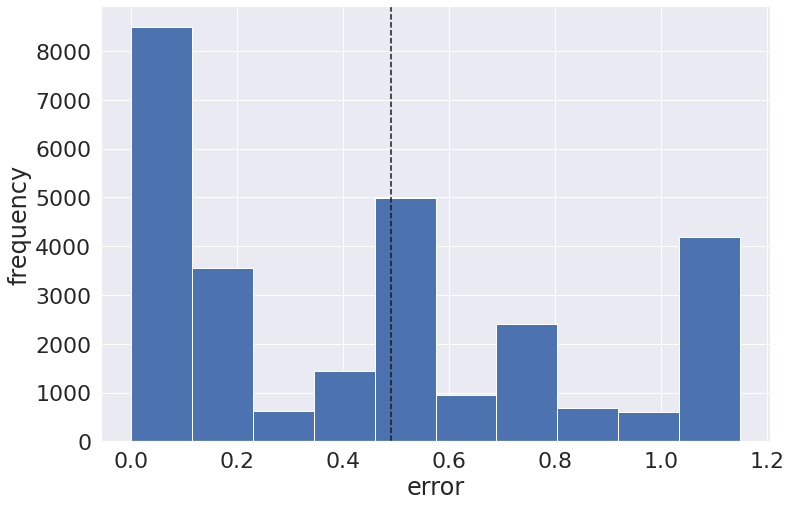

Outliers visualization


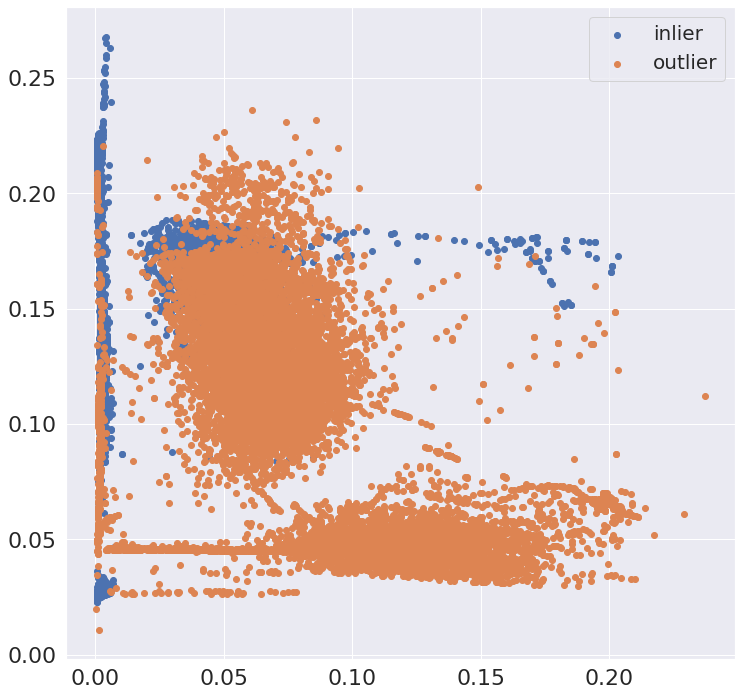

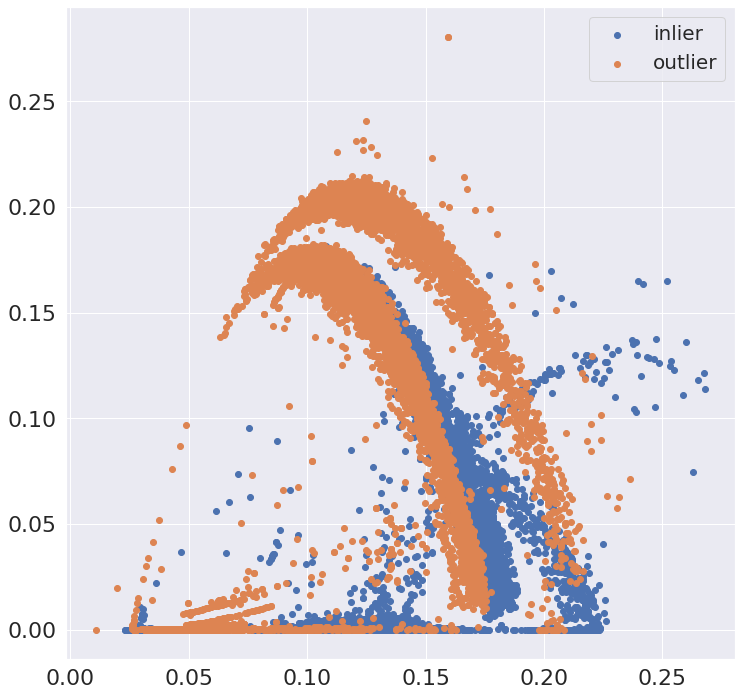

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.981     0.989     13976
           2      0.982     0.996     0.989     13976

    accuracy                          0.989     27952
   macro avg      0.989     0.989     0.989     27952
weighted avg      0.989     0.989     0.989     27952



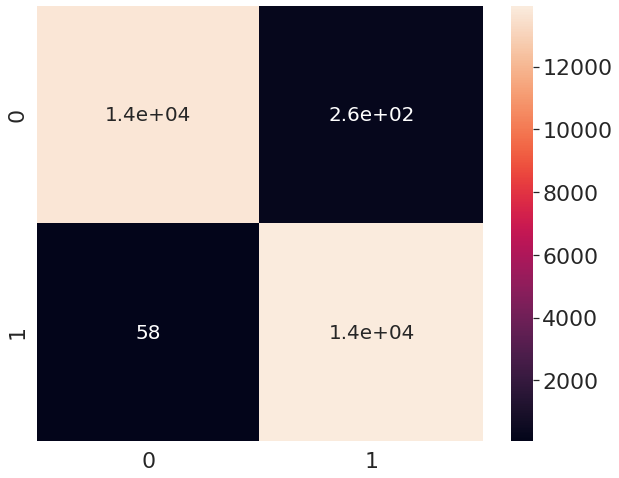

AUC score:  0.9885875787063537


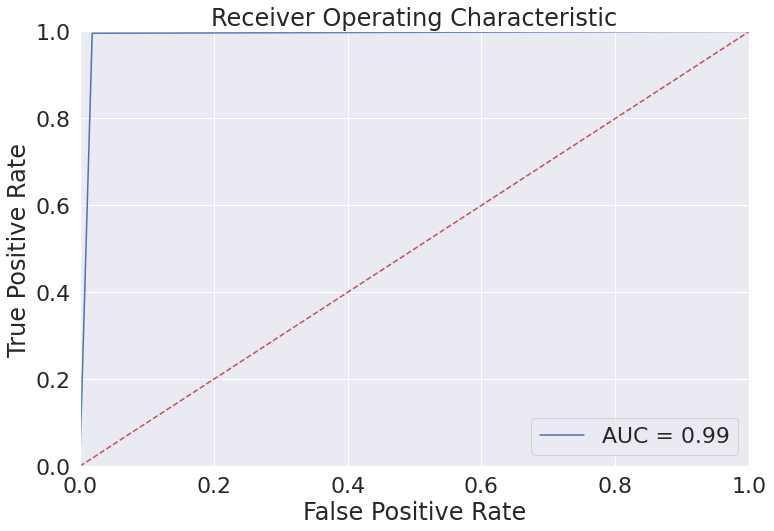

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Algo rand

### Train

In [77]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.68284797e-03  5.87496218e-01  0.00000000e+00 ...  1.77037474e-16
   7.49819992e-33  5.79818262e-18]
 [ 1.54865282e-01  1.83306656e-01  6.96827378e-02 ...  1.02941033e-05
   2.36484901e-06  2.96523918e-02]
 [ 2.41871435e-03  1.74420438e-01  1.60402605e-05 ...  1.36792206e-17
  -1.49311272e-33 -1.46555291e-17]
 ...
 [ 4.68276671e-03  5.87496218e-01  0.00000000e+00 ...  0.00000000e+00
  -2.84752097e-33  0.00000000e+00]
 [ 2.45694021e-03  1.74468574e-01  3.79634190e-14 ...  1.07181698e-17
   2.22743044e-33  2.67143261e-17]
 [ 2.52469433e-03  1.29933305e-01  2.06043598e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test Gafgyt

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14148263 0.10800676 0.03438897 ... 0.85099581 1.13300615 0.85507454]
Visualize quantization error


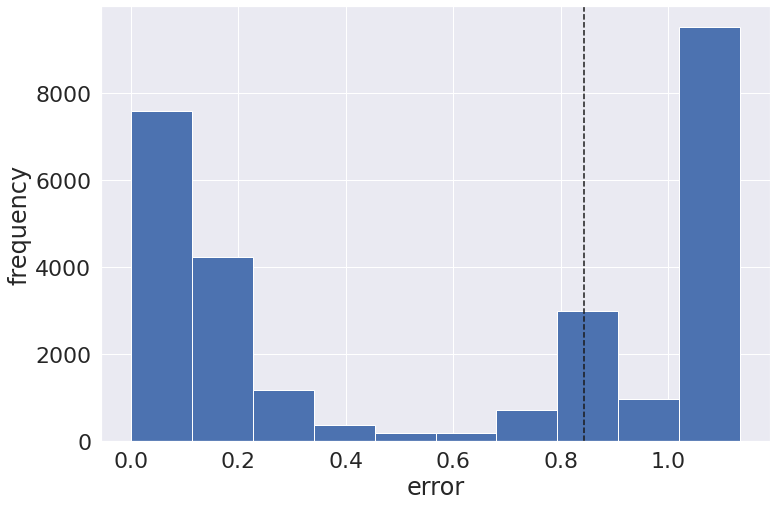

Outliers visualization


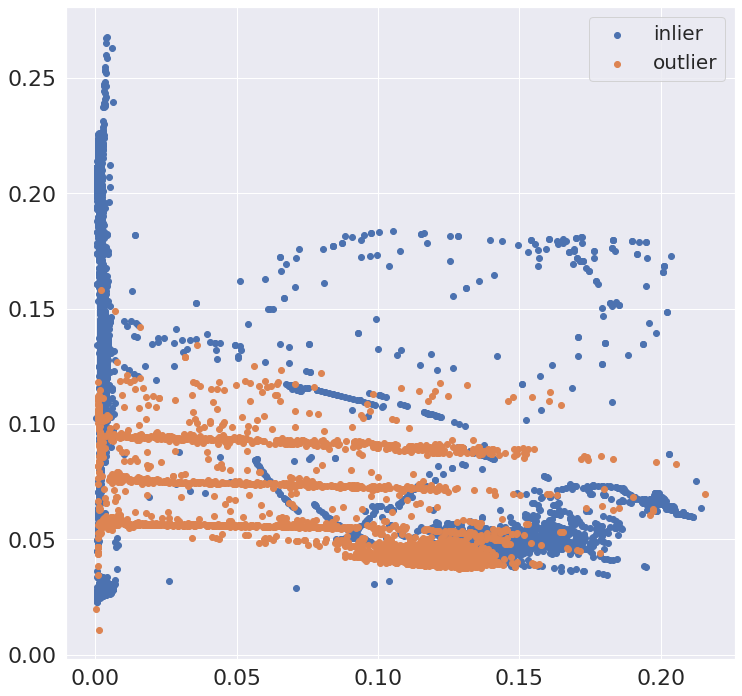

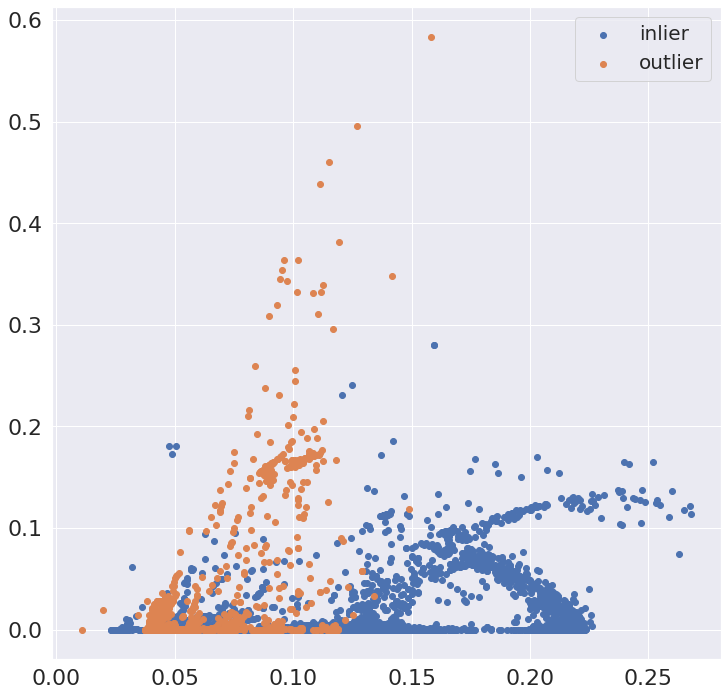

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.930     0.991     0.959     13976
           2      0.990     0.925     0.957     13976

    accuracy                          0.958     27952
   macro avg      0.960     0.958     0.958     27952
weighted avg      0.960     0.958     0.958     27952



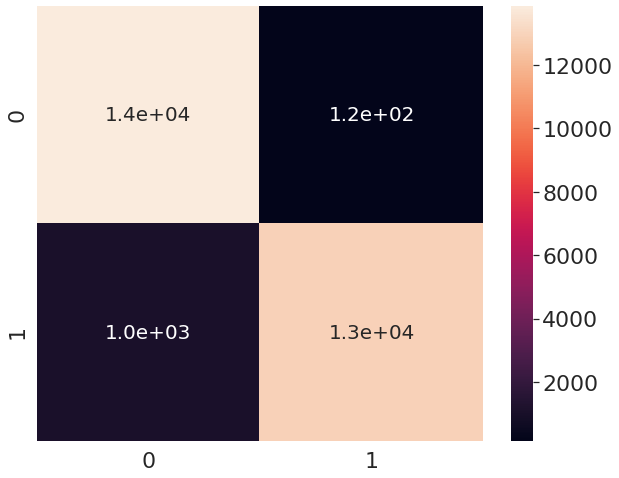

AUC score:  0.9579636519748139


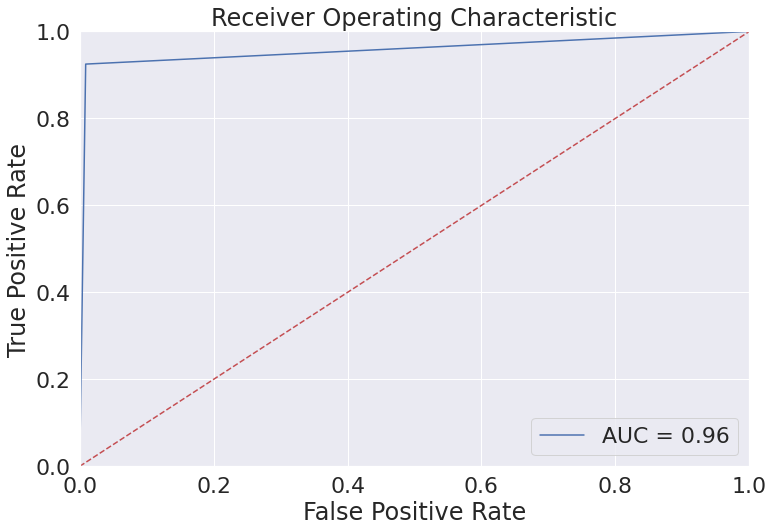

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [78]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### Test Mirai

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14148263 0.10800676 0.03438897 ... 0.50570376 0.50364287 0.81280213]
Visualize quantization error


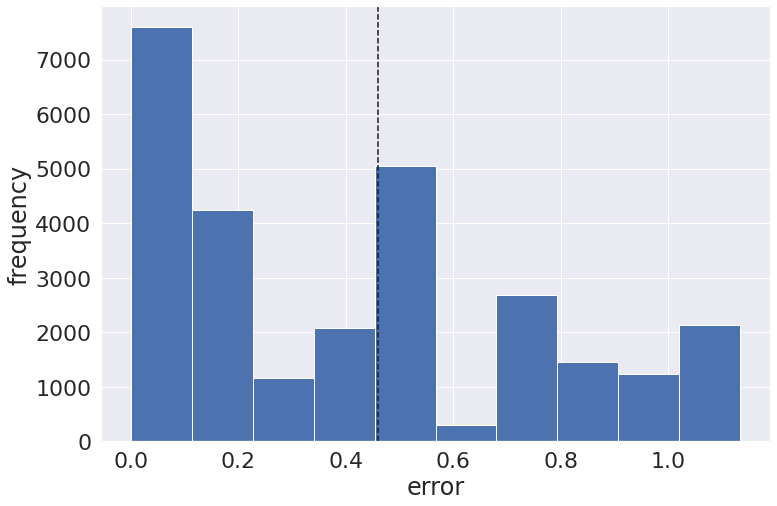

Outliers visualization


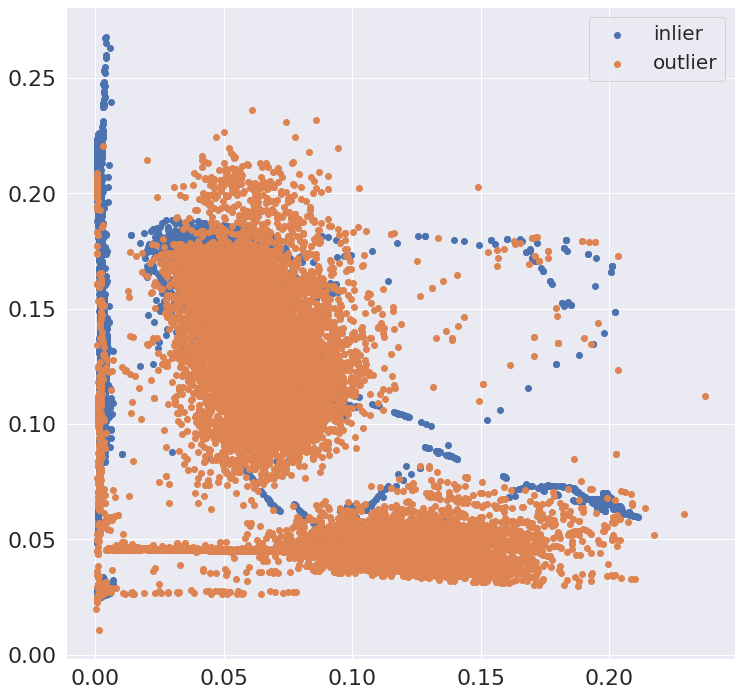

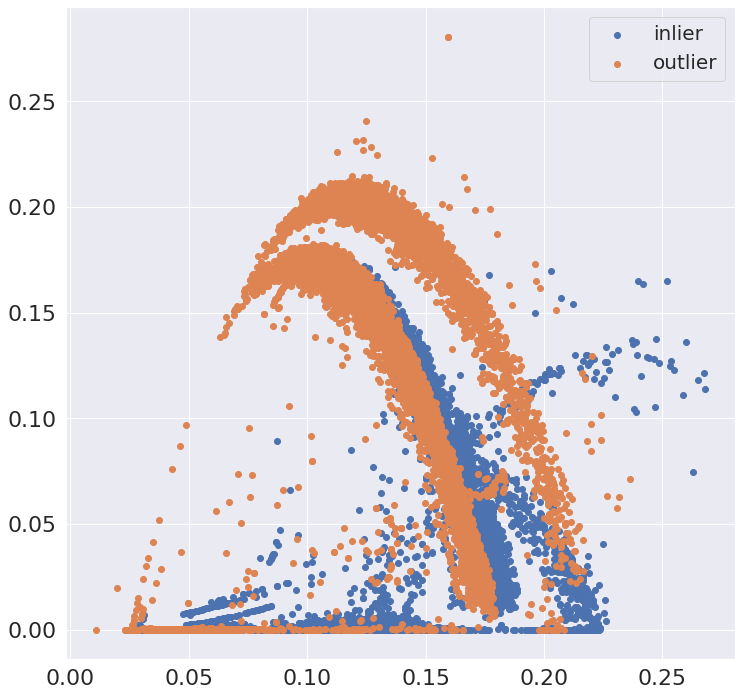

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.991     0.995     13976
           2      0.991     0.998     0.995     13976

    accuracy                          0.995     27952
   macro avg      0.995     0.995     0.995     27952
weighted avg      0.995     0.995     0.995     27952



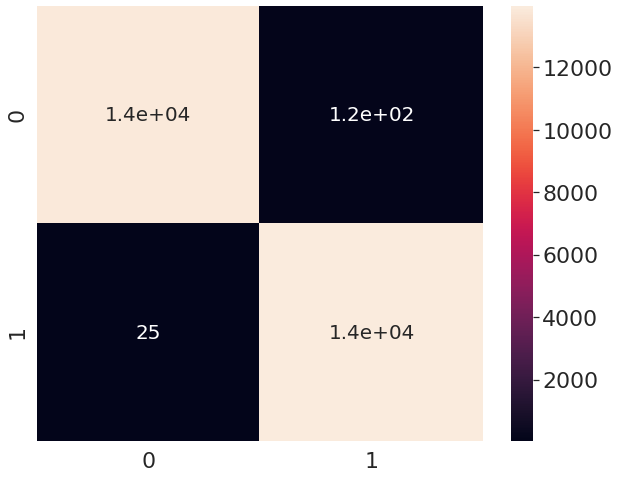

AUC score:  0.9946336576989124


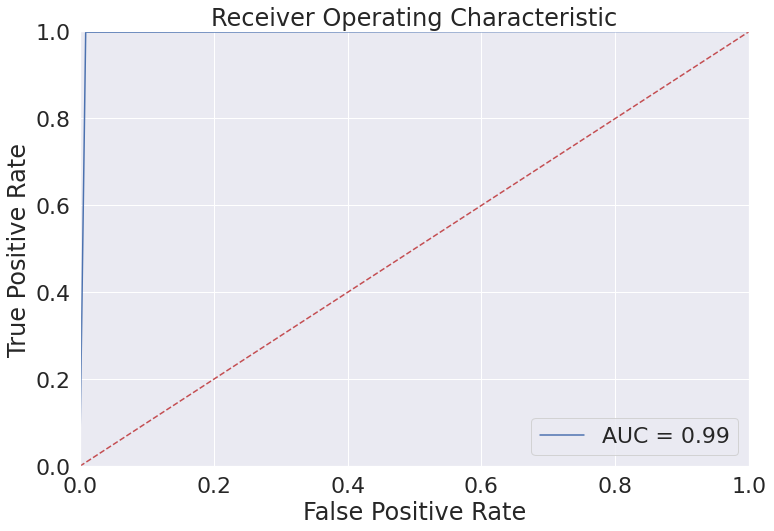

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [79]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Algo atpe

In [80]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.68284797e-03  5.87496218e-01  0.00000000e+00 ...  1.77037474e-16
   7.49819992e-33  5.79818262e-18]
 [ 1.54865282e-01  1.83306656e-01  6.96827378e-02 ...  1.02941033e-05
   2.36484901e-06  2.96523918e-02]
 [ 2.41871435e-03  1.74420438e-01  1.60402605e-05 ...  1.36792206e-17
  -1.49311272e-33 -1.46555291e-17]
 ...
 [ 4.68276671e-03  5.87496218e-01  0.00000000e+00 ...  0.00000000e+00
  -2.84752097e-33  0.00000000e+00]
 [ 2.45694021e-03  1.74468574e-01  3.79634190e-14 ...  1.07181698e-17
   2.22743044e-33  2.67143261e-17]
 [ 2.52469433e-03  1.29933305e-01  2.06043598e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.16619353 0.09567678 0.00874655 ... 0.7930608  1.1556368  0.80140449]
Visualize quantization error


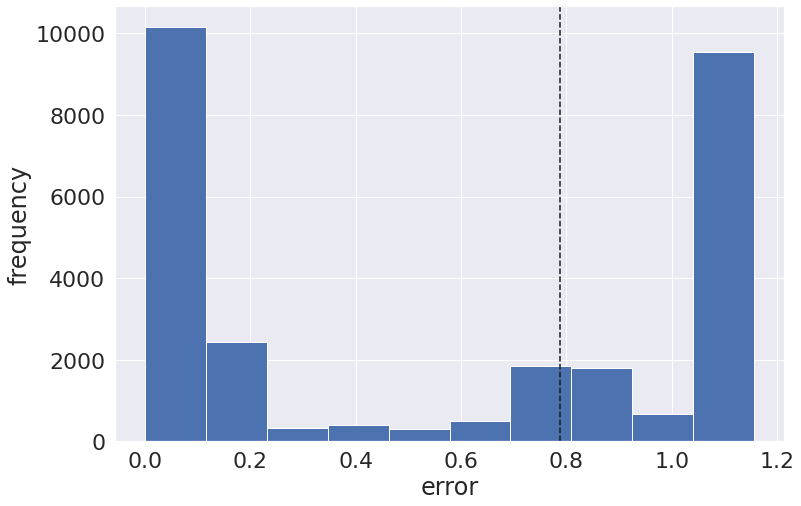

Outliers visualization


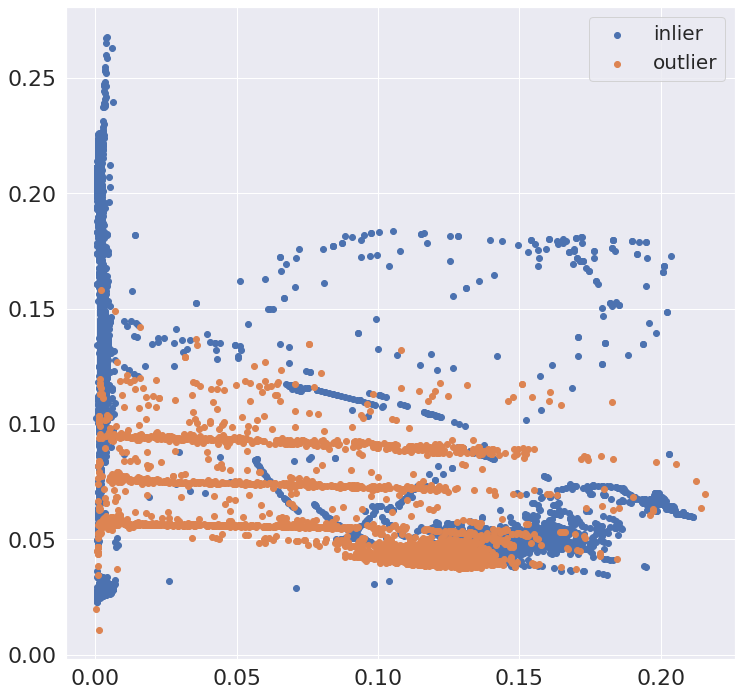

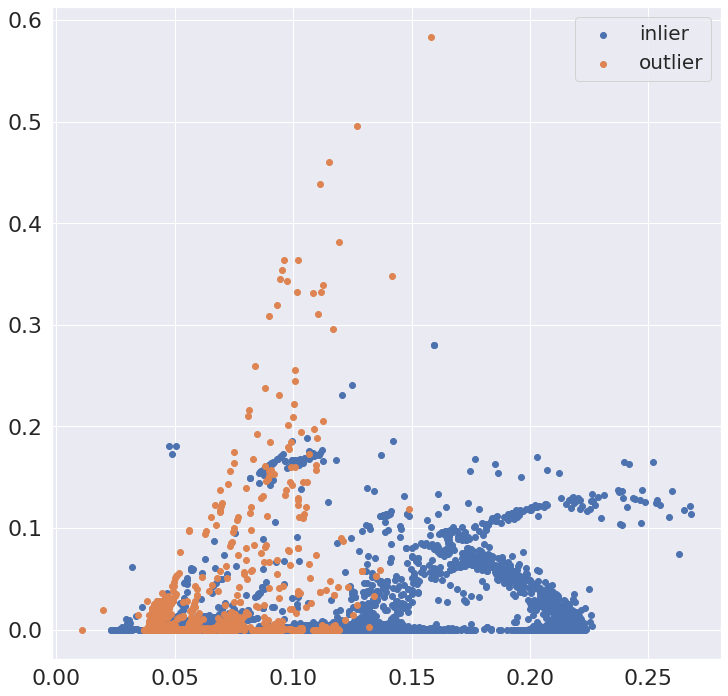

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.968     0.994     0.981     13976
           2      0.994     0.968     0.981     13976

    accuracy                          0.981     27952
   macro avg      0.981     0.981     0.981     27952
weighted avg      0.981     0.981     0.981     27952



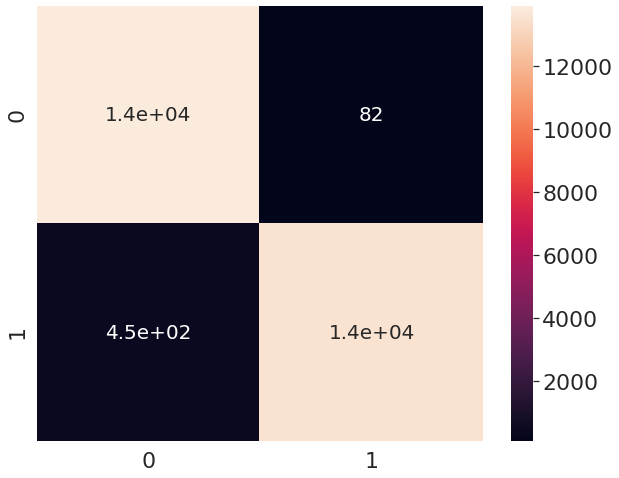

AUC score:  0.9808958214081281


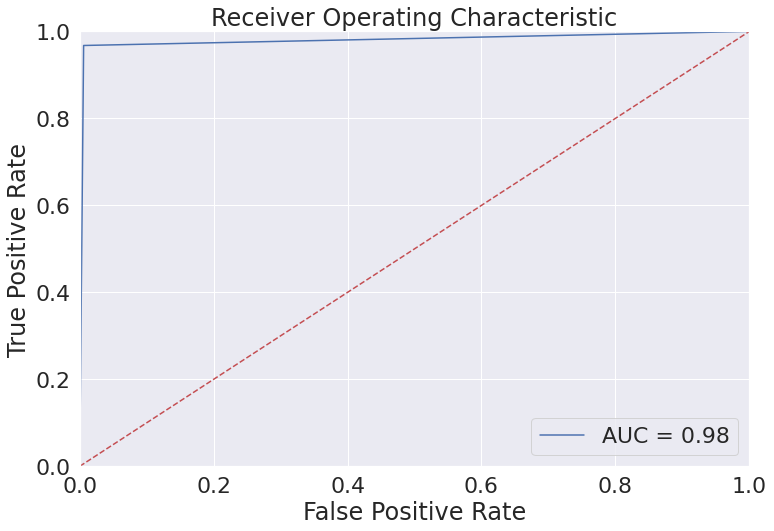

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [81]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.16619353 0.09567678 0.00874655 ... 0.54106096 0.53752427 0.75660785]
Visualize quantization error


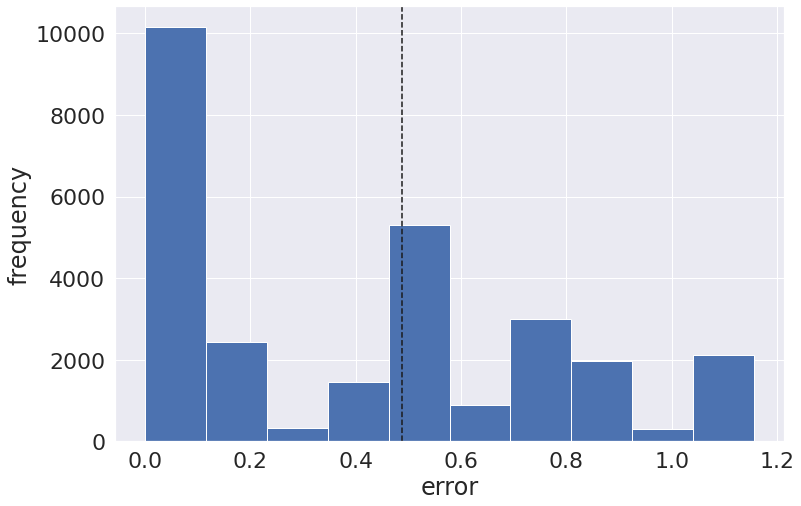

Outliers visualization


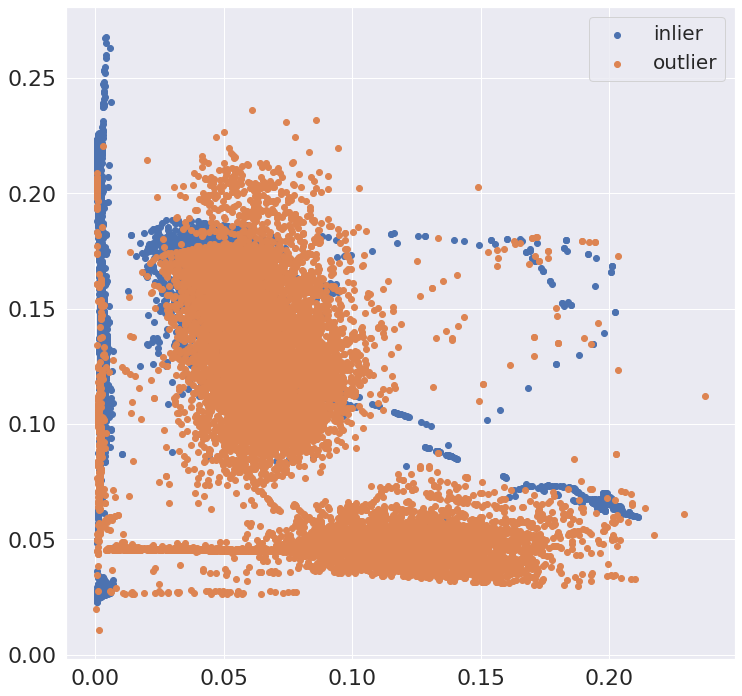

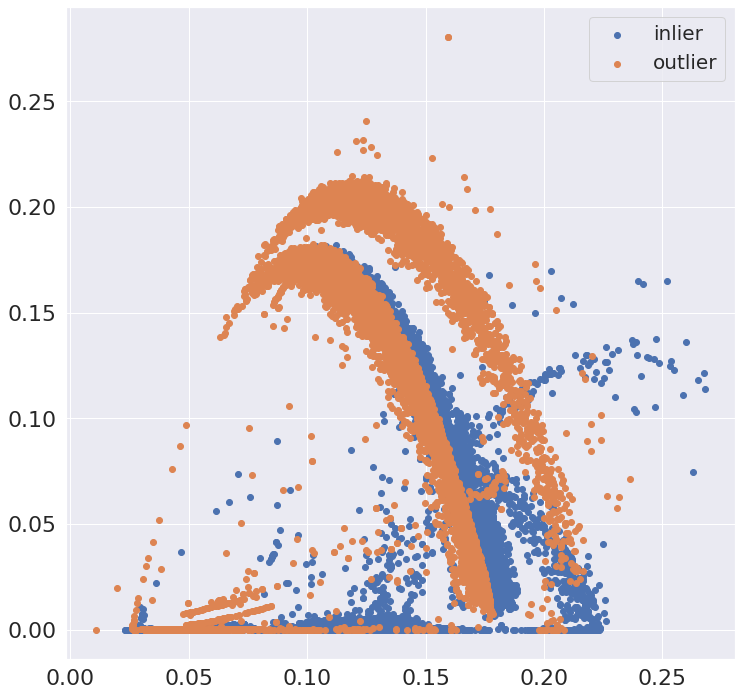

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.994     0.995     13976
           2      0.994     0.996     0.995     13976

    accuracy                          0.995     27952
   macro avg      0.995     0.995     0.995     27952
weighted avg      0.995     0.995     0.995     27952



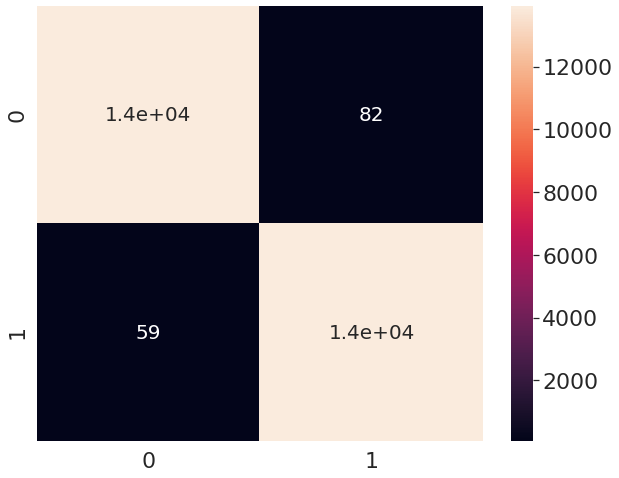

AUC score:  0.9949556382369776


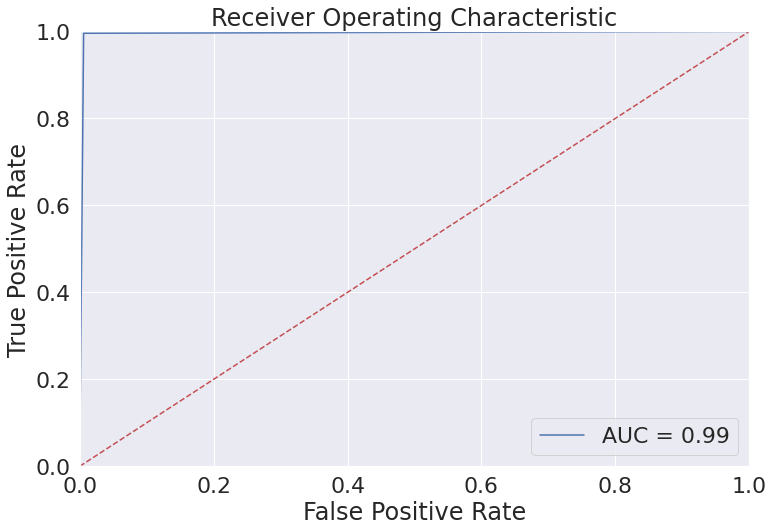

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [82]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Algo anneal

In [83]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.68284797e-03  5.87496218e-01  0.00000000e+00 ...  1.77037474e-16
   7.49819992e-33  5.79818262e-18]
 [ 1.54865282e-01  1.83306656e-01  6.96827378e-02 ...  1.02941033e-05
   2.36484901e-06  2.96523918e-02]
 [ 2.41871435e-03  1.74420438e-01  1.60402605e-05 ...  1.36792206e-17
  -1.49311272e-33 -1.46555291e-17]
 ...
 [ 4.68276671e-03  5.87496218e-01  0.00000000e+00 ...  0.00000000e+00
  -2.84752097e-33  0.00000000e+00]
 [ 2.45694021e-03  1.74468574e-01  3.79634190e-14 ...  1.07181698e-17
   2.22743044e-33  2.67143261e-17]
 [ 2.52469433e-03  1.29933305e-01  2.06043598e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.17373967 0.0929335  0.00834494 ... 0.85097536 0.80679777 0.85505274]
Visualize quantization error


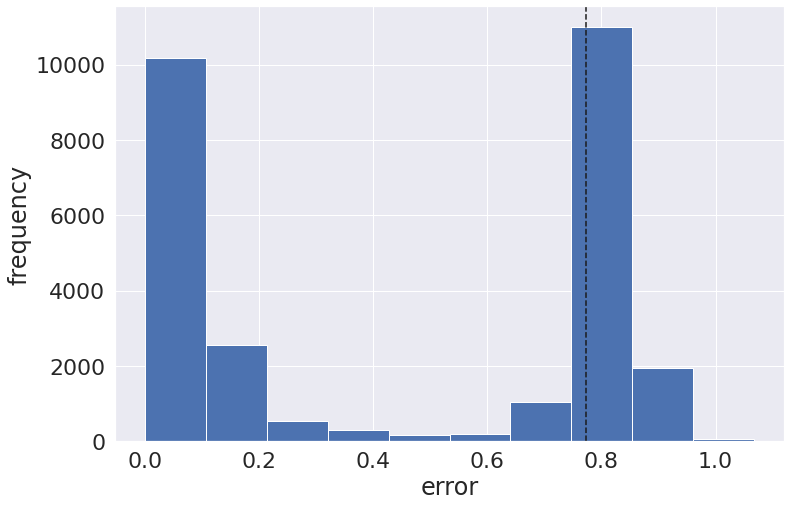

Outliers visualization


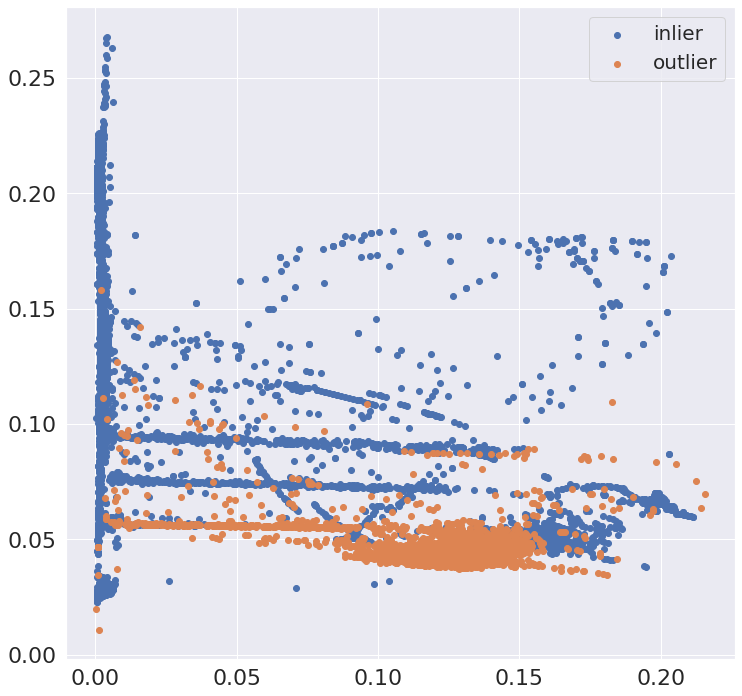

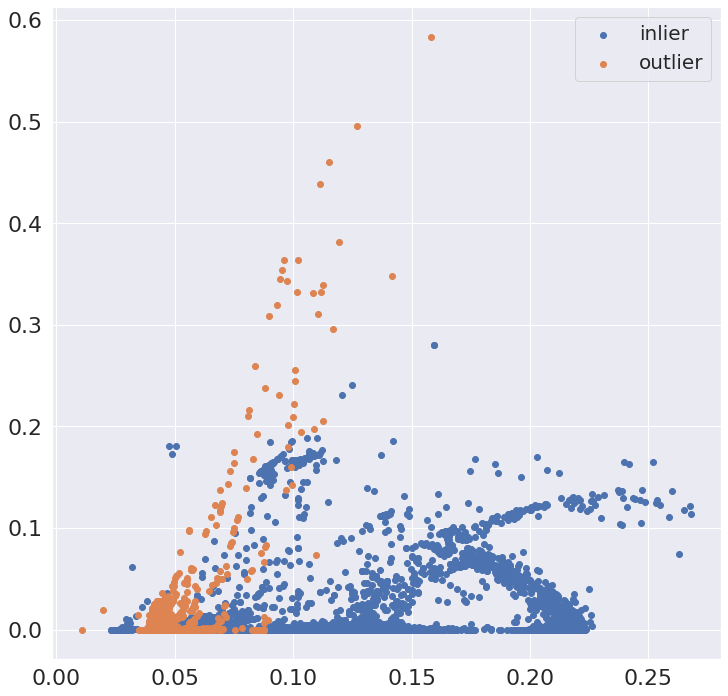

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.939     0.984     0.961     13976
           2      0.984     0.936     0.959     13976

    accuracy                          0.960     27952
   macro avg      0.961     0.960     0.960     27952
weighted avg      0.961     0.960     0.960     27952



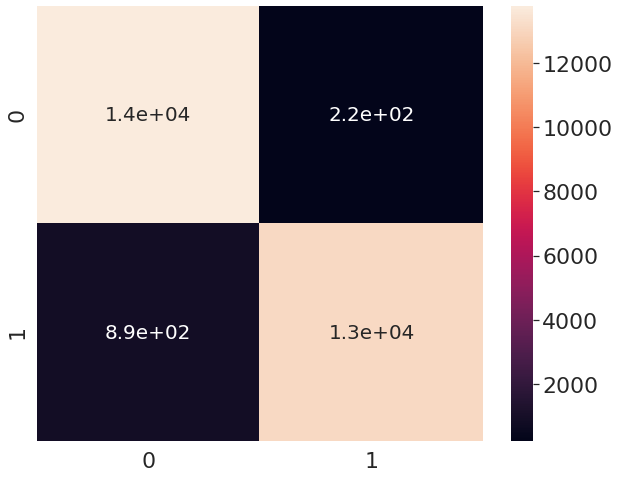

AUC score:  0.9602175157412707


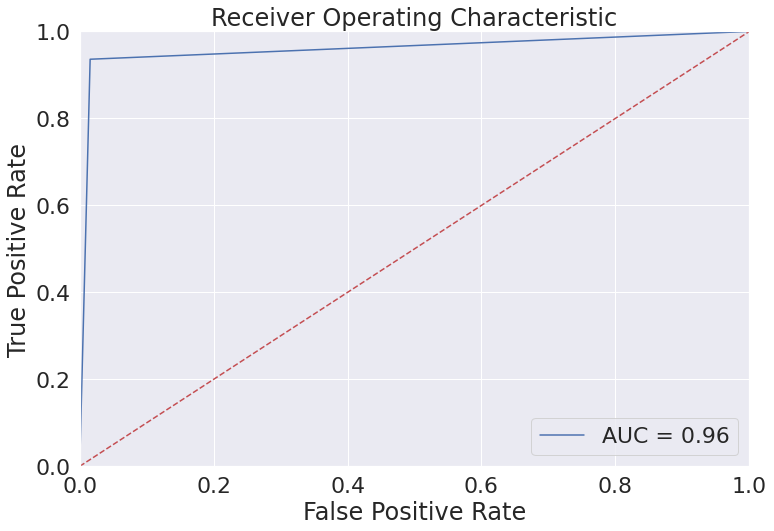

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [84]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (27952, 115) (27952,)
----------------------Test is starting----------------------
Scale data
Shape:  (27952, 115) (27952,)
Shape:  (27952, 115) (27952,)
Normalize data
Shape:  (27952, 115) (27952,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.17373967 0.0929335  0.00834494 ... 0.56719978 0.55166184 0.81482771]
Visualize quantization error


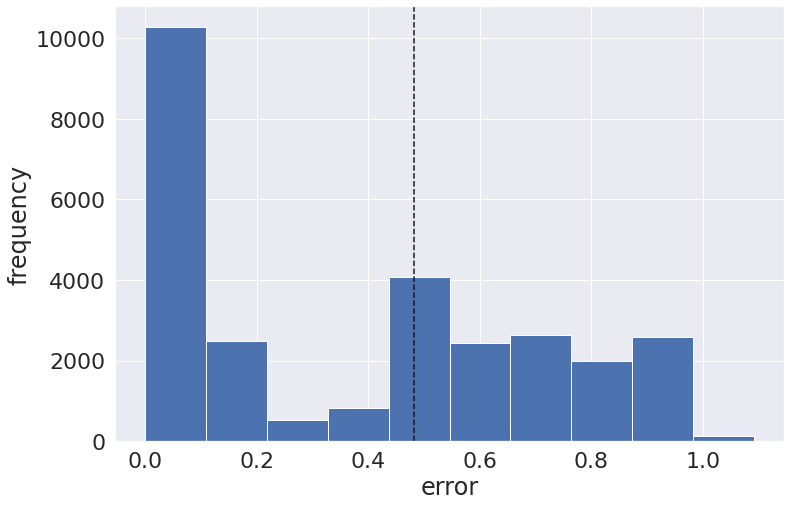

Outliers visualization


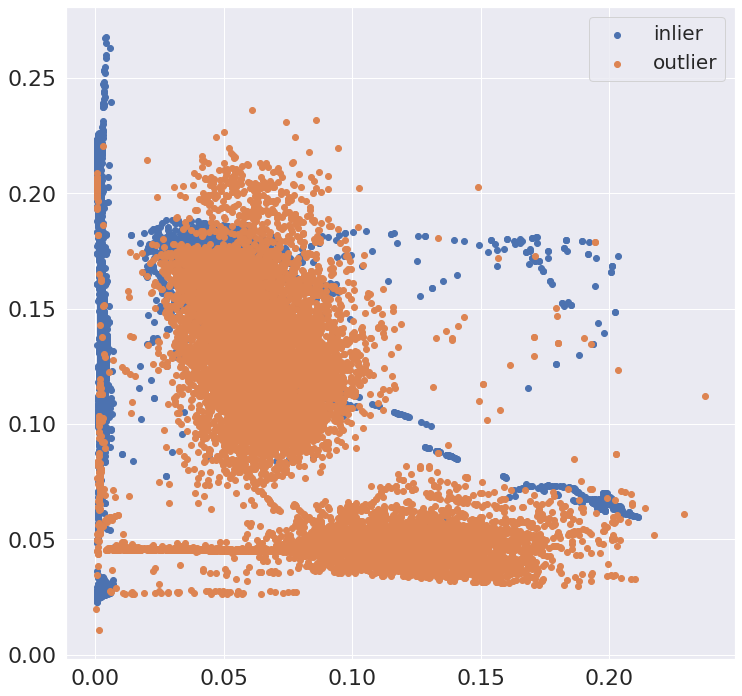

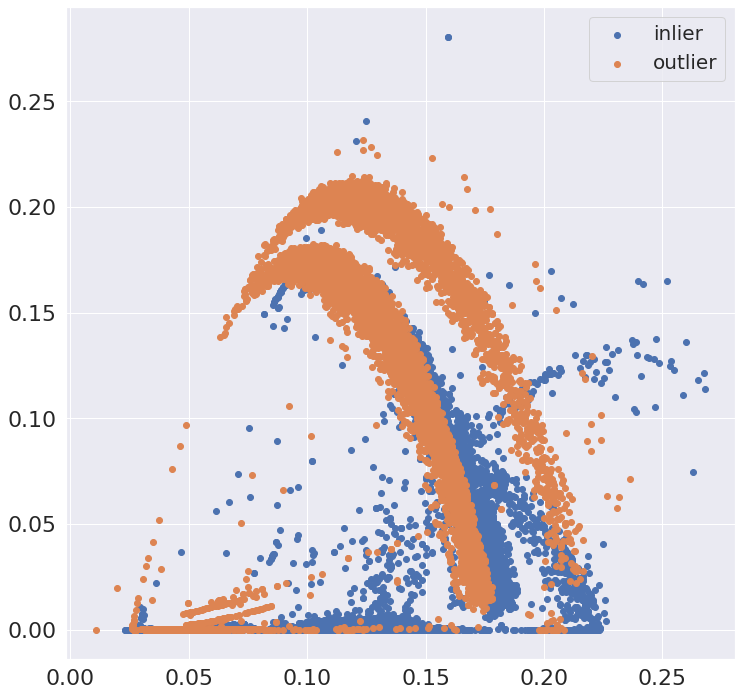

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.984     0.992     13976
           2      0.985     0.999     0.992     13976

    accuracy                          0.992     27952
   macro avg      0.992     0.992     0.992     27952
weighted avg      0.992     0.992     0.992     27952



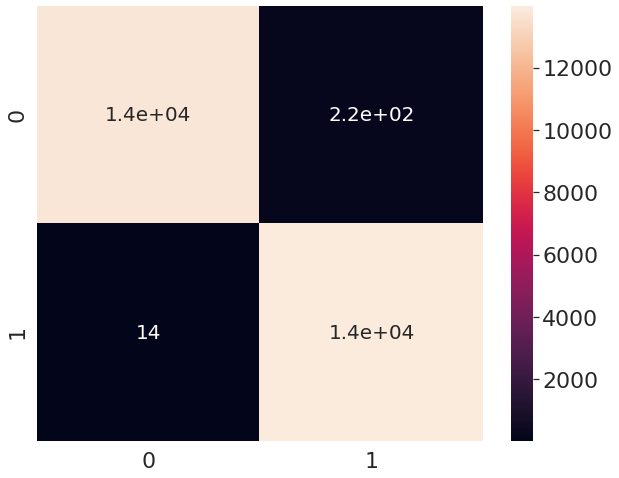

AUC score:  0.9917000572409846


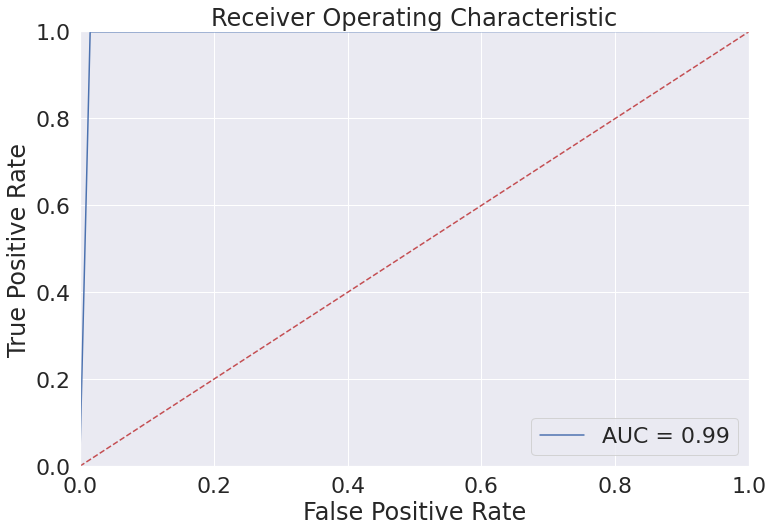

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [85]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

